In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
I_Cronicas_1 = "Adam, Sheth, Enosh,Kenan, Mahalaleel, Jered,Henoch, Methuselah, Lamech,Noah, Shem, Ham, and Japheth.The sons of Japheth; Gomer, and Magog, and Madai, and Javan, and Tubal, and Meshech, and Tiras.And the sons of Gomer; Ashchenaz, and Riphath, and Togarmah.And the sons of Javan; Elishah, and Tarshish, Kittim, and Dodanim.The sons of Ham; Cush, and Mizraim, Put, and Canaan.And the sons of Cush; Seba, and Havilah, and Sabta, and Raamah, and Sabtecha. And the sons of Raamah; Sheba, and Dedan.And Cush begat Nimrod: he began to be mighty on the earth.And Mizraim begat Ludim, and Anamim, and Lehabim, and Naphtuhim,And Pathrusim, and Casluhim, (of whom came the Philistines,) and Caphthorim.And Canaan begat Zidon his firstborn, and Heth,The Jebusite also, and the Amorite, and the Girgashite,And the Hivite, and the Arkite, and the Sinite,And the Arvadite, and the Zemarite, and the Hamathite.The sons of Shem; Elam, and Asshur, and Arphaxad, and Lud, and Aram, and Uz, and Hul, and Gether, and Meshech.And Arphaxad begat Shelah, and Shelah begat Eber.And to Eber were born two sons: the name of the one was Peleg; because in his days the earth was divided: and his brother' name was Joktan.And Joktan begat Almodad, and Sheleph, and Hazarmaveth, and Jerah,Hadoram also, and Uzal, and Diklah,And Ebal, and Abimael, and Sheba,And Ophir, and Havilah, and Jobab. All these were the sons of Joktan.Shem, Arphaxad, Shelah,Eber, Peleg, Reu,Serug, Nahor, Terah,Abram; the same is Abraham.The sons of Abraham; Isaac, and Ishmael.These are their generations: The firstborn of Ishmael, Nebaioth; then Kedar, and Adbeel, and Mibsam,Mishma, and Dumah, Massa, Hadad, and Tema,Jetur, Naphish, and Kedemah. These are the sons of Ishmael.Now the sons of Keturah, Abraham' concubine: she bore Zimran, and Jokshan, and Medan, and Midian, and Ishbak, and Shuah. And the sons of Jokshan; Sheba, and Dedan.And the sons of Midian; Ephah, and Epher, and Henoch, and Abida, and Eldaah. All these are the sons of Keturah.And Abraham begat Isaac. The sons of Isaac; Esau and Israel.The sons of Esau; Eliphaz, Reuel, and Jeush, and Jaalam, and Korah.The sons of Eliphaz; Teman, and Omar, Zephi, and Gatam, Kenaz, and Timna, and Amalek.The sons of Reuel; Nahath, Zerah, Shammah, and Mizzah.And the sons of Seir; Lotan, and Shobal, and Zibeon, and Anah, and Dishon, and Ezar, and Dishan.And the sons of Lotan; Hori, and Homam: and Timna was Lotan' sister.The sons of Shobal; Alian, and Manahath, and Ebal, Shephi, and Onam. and the sons of Zibeon; Aiah, and Anah.The sons of Anah; Dishon. And the sons of Dishon; Amram, and Eshban, and Ithran, and Cheran.The sons of Ezer; Bilhan, and Zavan, and Jakan. The sons of Dishan; Uz, and Aran.Now these are the kings that reigned in the land of Edom before any king reigned over the children of Israel; Bela the son of Beor: and the name of his city was Dinhabah.And when Bela was dead, Jobab the son of Zerah of Bozrah reigned in his stead.And when Jobab was dead, Husham of the land of the Temanites reigned in his stead.And when Husham was dead, Hadad the son of Bedad, which smote Midian in the field of Moab, reigned in his stead: and the name of his city was Avith.And when Hadad was dead, Samlah of Masrekah reigned in his stead.And when Samlah was dead, Shaul of Rehoboth by the river reigned in his stead.And when Shaul was dead, Baalhanan the son of Achbor reigned in his stead.And when Baalhanan was dead, Hadad reigned in his stead: and the name of his city was Pai; and his wife' name was Mehetabel, the daughter of Matred, the daughter of Mezahab.Hadad died also. And the dukes of Edom were; duke Timnah, duke Aliah, duke Jetheth,Duke Aholibamah, duke Elah, duke Pinon,Duke Kenaz, duke Teman, duke Mibzar,Duke Magdiel, duke Iram. These are the dukes of Edom.".lower()

In [6]:
I_Cronicas_2 = "These are the sons of Israel; Reuben, Simeon, Levi, and Judah, Issachar, and Zebulun,Dan, Joseph, and Benjamin, Naphtali, Gad, and Asher.The sons of Judah; Er, and Onan, and Shelah: which three were born to him of the daughter of Shua the Canaanitess. And Er, the firstborn of Judah, was evil in the sight of the LORD; and he slew him.And Tamar his daughter in law bore him Pharez and Zerah. All the sons of Judah were five.The sons of Pharez; Hezron, and Hamul.And the sons of Zerah; Zimri, and Ethan, and Heman, and Calcol, and Dara: five of them in all.And the sons of Carmi; Achar, the troubler of Israel, who transgressed in the thing accursed.And the sons of Ethan; Azariah.The sons also of Hezron, that were born to him; Jerahmeel, and Ram, and Chelubai.And Ram begat Amminadab; and Amminadab begat Nahshon, prince of the children of Judah;And Nahshon begat Salma, and Salma begat Boaz,And Boaz begat Obed, and Obed begat Jesse,And Jesse begat his firstborn Eliab, and Abinadab the second, and Shimma the third,Nethaneel the fourth, Raddai the fifth,Ozem the sixth, David the seventh:Whose sisters were Zeruiah, and Abigail. And the sons of Zeruiah; Abishai, and Joab, and Asahel, three.And Abigail bore Amasa: and the father of Amasa was Jether the Ishmeelite.And Caleb the son of Hezron begat children of Azubah his wife, and of Jerioth: her sons are these; Jesher, and Shobab, and Ardon.And when Azubah was dead, Caleb took to him Ephrath, which bore him Hur.And Hur begat Uri, and Uri begat Bezaleel.And afterward Hezron went in to the daughter of Machir the father of Gilead, whom he married when he was three score years old; and she bore him Segub.And Segub begat Jair, who had three and twenty cities in the land of Gilead.And he took Geshur, and Aram, with the towns of Jair, from them, with Kenath, and the towns thereof, even three score cities. All these belonged to the sons of Machir the father of Gilead.And after that Hezron was dead in Calebephratah, then Abiah Hezron' wife bore him Ashur the father of Tekoa.And the sons of Jerahmeel the firstborn of Hezron were, Ram the firstborn, and Bunah, and Oren, and Ozem, and Ahijah.Jerahmeel had also another wife, whose name was Atarah; she was the mother of Onam.And the sons of Ram the firstborn of Jerahmeel were, Maaz, and Jamin, and Eker.And the sons of Onam were, Shammai, and Jada. And the sons of Shammai; Nadab and Abishur.And the name of the wife of Abishur was Abihail, and she bore him Ahban, and Molid.And the sons of Nadab; Seled, and Appaim: but Seled died without children.And the sons of Appaim; Ishi. And the sons of Ishi; Sheshan. And the children of Sheshan; Ahlai.And the sons of Jada the brother of Shammai; Jether, and Jonathan: and Jether died without children.And the sons of Jonathan; Peleth, and Zaza. These were the sons of Jerahmeel.Now Sheshan had no sons, but daughters. And Sheshan had a servant, an Egyptian, whose name was Jarha.And Sheshan gave his daughter to Jarha his servant to wife; and she bore him Attai.And Attai begat Nathan, and Nathan begat Zabad,And Zabad begat Ephlal, and Ephlal begat Obed,And Obed begat Jehu, and Jehu begat Azariah,And Azariah begat Helez, and Helez begat Eleasah,And Eleasah begat Sisamai, and Sisamai begat Shallum,And Shallum begat Jekamiah, and Jekamiah begat Elishama.Now the sons of Caleb the brother of Jerahmeel were, Mesha his firstborn, which was the father of Ziph; and the sons of Mareshah the father of Hebron.And the sons of Hebron; Korah, and Tappuah, and Rekem, and Shema.And Shema begat Raham, the father of Jorkoam: and Rekem begat Shammai.And the son of Shammai was Maon: and Maon was the father of Bethzur.And Ephah, Caleb' concubine, bore Haran, and Moza, and Gazez: and Haran begat Gazez.And the sons of Jahdai; Regem, and Jotham, and Gesham, and Pelet, and Ephah, and Shaaph.Maachah, Caleb' concubine, bore Sheber, and Tirhanah.She bore also Shaaph the father of Madmannah, Sheva the father of Machbenah, and the father of Gibea: and the daughter of Caleb was Achsa.These were the sons of Caleb the son of Hur, the firstborn of Ephratah; Shobal the father of Kirjathjearim.Salma the father of Bethlehem, Hareph the father of Bethgader.And Shobal the father of Kirjathjearim had sons; Haroeh, and half of the Manahethites.And the families of Kirjathjearim; the Ithrites, and the Puhites, and the Shumathites, and the Mishraites; of them came the Zareathites, and the Eshtaulites,The sons of Salma; Bethlehem, and the Netophathites, Ataroth, the house of Joab, and half of the Manahethites, the Zorites.And the families of the scribes which dwelled at Jabez; the Tirathites, the Shimeathites, and Suchathites. These are the Kenites that came of Hemath, the father of the house of Rechab.".lower()

In [7]:
I_Cronicas_3 = "Now these were the sons of David, which were born to him in Hebron; the firstborn Amnon, of Ahinoam the Jezreelitess; the second Daniel, of Abigail the Carmelitess:The third, Absalom the son of Maachah the daughter of Talmai king of Geshur: the fourth, Adonijah the son of Haggith:The fifth, Shephatiah of Abital: the sixth, Ithream by Eglah his wife.These six were born to him in Hebron; and there he reigned seven years and six months: and in Jerusalem he reigned thirty and three years.And these were born to him in Jerusalem; Shimea, and Shobab, and Nathan, and Solomon, four, of Bathshua the daughter of Ammiel:Ibhar also, and Elishama, and Eliphelet,And Nogah, and Nepheg, and Japhia,And Elishama, and Eliada, and Eliphelet, nine.These were all the sons of David, beside the sons of the concubines, and Tamar their sister.And Solomon' son was Rehoboam, Abia his son, Asa his son, Jehoshaphat his son,Joram his son, Ahaziah his son, Joash his son,Amaziah his son, Azariah his son, Jotham his son,Ahaz his son, Hezekiah his son, Manasseh his son,Amon his son, Josiah his son.And the sons of Josiah were, the firstborn Johanan, the second Jehoiakim, the third Zedekiah, the fourth Shallum.And the sons of Jehoiakim: Jeconiah his son, Zedekiah his son.And the sons of Jeconiah; Assir, Salathiel his son,Malchiram also, and Pedaiah, and Shenazar, Jecamiah, Hoshama, and Nedabiah.And the sons of Pedaiah were, Zerubbabel, and Shimei: and the sons of Zerubbabel; Meshullam, and Hananiah, and Shelomith their sister:And Hashubah, and Ohel, and Berechiah, and Hasadiah, Jushabhesed, five.And the sons of Hananiah; Pelatiah, and Jesaiah: the sons of Rephaiah, the sons of Arnan, the sons of Obadiah, the sons of Shechaniah.And the sons of Shechaniah; Shemaiah: and the sons of Shemaiah; Hattush, and Igeal, and Bariah, and Neariah, and Shaphat, six.And the sons of Neariah; Elioenai, and Hezekiah, and Azrikam, three.And the sons of Elioenai were, Hodaiah, and Eliashib, and Pelaiah, and Akkub, and Johanan, and Dalaiah, and Anani, seven.".lower()

In [8]:
I_Cronicas_4 = "The sons of Judah; Pharez, Hezron, and Carmi, and Hur, and Shobal.And Reaiah the son of Shobal begat Jahath; and Jahath begat Ahumai, and Lahad. These are the families of the Zorathites.And these were of the father of Etam; Jezreel, and Ishma, and Idbash: and the name of their sister was Hazelelponi:And Penuel the father of Gedor, and Ezer the father of Hushah. These are the sons of Hur, the firstborn of Ephratah, the father of Bethlehem.And Ashur the father of Tekoa had two wives, Helah and Naarah.And Naarah bore him Ahuzam, and Hepher, and Temeni, and Haahashtari. These were the sons of Naarah.And the sons of Helah were, Zereth, and Jezoar, and Ethnan.And Coz begat Anub, and Zobebah, and the families of Aharhel the son of Harum.And Jabez was more honorable than his brothers: and his mother called his name Jabez, saying, Because I bore him with sorrow.And Jabez called on the God of Israel, saying, Oh that you would bless me indeed, and enlarge my coast, and that your hand might be with me, and that you would keep me from evil, that it may not grieve me! And God granted him that which he requested.And Chelub the brother of Shuah begat Mehir, which was the father of Eshton.And Eshton begat Bethrapha, and Paseah, and Tehinnah the father of Irnahash. These are the men of Rechah.And the sons of Kenaz; Othniel, and Seraiah: and the sons of Othniel; Hathath.And Meonothai begat Ophrah: and Seraiah begat Joab, the father of the valley of Charashim; for they were craftsmen.And the sons of Caleb the son of Jephunneh; Iru, Elah, and Naam: and the sons of Elah, even Kenaz.And the sons of Jehaleleel; Ziph, and Ziphah, Tiria, and Asareel.And the sons of Ezra were, Jether, and Mered, and Epher, and Jalon: and she bore Miriam, and Shammai, and Ishbah the father of Eshtemoa.And his wife Jehudijah bore Jered the father of Gedor, and Heber the father of Socho, and Jekuthiel the father of Zanoah. And these are the sons of Bithiah the daughter of Pharaoh, which Mered took.And the sons of his wife Hodiah the sister of Naham, the father of Keilah the Garmite, and Eshtemoa the Maachathite.And the sons of Shimon were, Amnon, and Rinnah, Benhanan, and Tilon. And the sons of Ishi were, Zoheth, and Benzoheth.The sons of Shelah the son of Judah were, Er the father of Lecah, and Laadah the father of Mareshah, and the families of the house of them that worked fine linen, of the house of Ashbea,And Jokim, and the men of Chozeba, and Joash, and Saraph, who had the dominion in Moab, and Jashubilehem. And these are ancient things.These were the potters, and those that dwelled among plants and hedges: there they dwelled with the king for his work.The sons of Simeon were, Nemuel, and Jamin, Jarib, Zerah, and Shaul:Shallum his son, Mibsam his son, Mishma his son.And the sons of Mishma; Hamuel his son, Zacchur his son, Shimei his son.And Shimei had sixteen sons and six daughters: but his brothers had not many children, neither did all their family multiply, like to the children of Judah.And they dwelled at Beersheba, and Moladah, and Hazarshual,And at Bilhah, and at Ezem, and at Tolad,And at Bethuel, and at Hormah, and at Ziklag,And at Bethmarcaboth, and Hazarsusim, and at Bethbirei, and at Shaaraim. These were their cities to the reign of David.And their villages were, Etam, and Ain, Rimmon, and Tochen, and Ashan, five cities:And all their villages that were round about the same cities, to Baal. These were their habitations, and their genealogy.And Meshobab, and Jamlech, and Joshah, the son of Amaziah,And Joel, and Jehu the son of Josibiah, the son of Seraiah, the son of Asiel,And Elioenai, and Jaakobah, and Jeshohaiah, and Asaiah, and Adiel, and Jesimiel, and Benaiah,And Ziza the son of Shiphi, the son of Allon, the son of Jedaiah, the son of Shimri, the son of Shemaiah;These mentioned by their names were princes in their families: and the house of their fathers increased greatly.And they went to the entrance of Gedor, even to the east side of the valley, to seek pasture for their flocks.And they found fat pasture and good, and the land was wide, and quiet, and peaceable; for they of Ham had dwelled there of old.And these written by name came in the days of Hezekiah king of Judah, and smote their tents, and the habitations that were found there, and destroyed them utterly to this day, and dwelled in their rooms: because there was pasture there for their flocks.And some of them, even of the sons of Simeon, five hundred men, went to mount Seir, having for their captains Pelatiah, and Neariah, and Rephaiah, and Uzziel, the sons of Ishi.And they smote the rest of the Amalekites that were escaped, and dwelled there to this day.".lower()

In [9]:
I_Cronicas_5 = "Now the sons of Reuben the firstborn of Israel, (for he was the firstborn; but for as much as he defiled his father' bed, his birthright was given to the sons of Joseph the son of Israel: and the genealogy is not to be reckoned after the birthright.For Judah prevailed above his brothers, and of him came the chief ruler; but the birthright was Joseph':)The sons, I say, of Reuben the firstborn of Israel were, Hanoch, and Pallu, Hezron, and Carmi.The sons of Joel; Shemaiah his son, Gog his son, Shimei his son,Micah his son, Reaia his son, Baal his son,Beerah his son, whom Tilgathpilneser king of Assyria carried away captive: he was prince of the Reubenites.And his brothers by their families, when the genealogy of their generations was reckoned, were the chief, Jeiel, and Zechariah,And Bela the son of Azaz, the son of Shema, the son of Joel, who dwelled in Aroer, even to Nebo and Baalmeon:And eastward he inhabited to the entering in of the wilderness from the river Euphrates: because their cattle were multiplied in the land of Gilead.And in the days of Saul they made war with the Hagarites, who fell by their hand: and they dwelled in their tents throughout all the east land of Gilead.And the children of Gad dwelled over against them, in the land of Bashan to Salcah:Joel the chief, and Shapham the next, and Jaanai, and Shaphat in Bashan.And their brothers of the house of their fathers were, Michael, and Meshullam, and Sheba, and Jorai, and Jachan, and Zia, and Heber, seven.These are the children of Abihail the son of Huri, the son of Jaroah, the son of Gilead, the son of Michael, the son of Jeshishai, the son of Jahdo, the son of Buz;Ahi the son of Abdiel, the son of Guni, chief of the house of their fathers.And they dwelled in Gilead in Bashan, and in her towns, and in all the suburbs of Sharon, on their borders.All these were reckoned by genealogies in the days of Jotham king of Judah, and in the days of Jeroboam king of Israel.The sons of Reuben, and the Gadites, and half the tribe of Manasseh, of valiant men, men able to bear buckler and sword, and to shoot with bow, and skillful in war, were four and forty thousand seven hundred and three score, that went out to the war.And they made war with the Hagarites, with Jetur, and Nephish, and Nodab.And they were helped against them, and the Hagarites were delivered into their hand, and all that were with them: for they cried to God in the battle, and he was entreated of them; because they put their trust in him.And they took away their cattle; of their camels fifty thousand, and of sheep two hundred and fifty thousand, and of asses two thousand, and of men an hundred thousand.For there fell down many slain, because the war was of God. And they dwelled in their steads until the captivity.And the children of the half tribe of Manasseh dwelled in the land: they increased from Bashan to Baalhermon and Senir, and to mount Hermon.And these were the heads of the house of their fathers, even Epher, and Ishi, and Eliel, and Azriel, and Jeremiah, and Hodaviah, and Jahdiel, mighty men of valor, famous men, and heads of the house of their fathers.And they transgressed against the God of their fathers, and went a whoring after the gods of the people of the land, whom God destroyed before them.And the God of Israel stirred up the spirit of Pul king of Assyria, and the spirit of Tilgathpilneser king of Assyria, and he carried them away, even the Reubenites, and the Gadites, and the half tribe of Manasseh, and brought them to Halah, and Habor, and Hara, and to the river Gozan, to this day.".lower()

In [11]:
I_Cronicas_6 = "The sons of Levi; Gershon, Kohath, and Merari.And the sons of Kohath; Amram, Izhar, and Hebron, and Uzziel.And the children of Amram; Aaron, and Moses, and Miriam. The sons also of Aaron; Nadab, and Abihu, Eleazar, and Ithamar.Eleazar begat Phinehas, Phinehas begat Abishua,And Abishua begat Bukki, and Bukki begat Uzzi,And Uzzi begat Zerahiah, and Zerahiah begat Meraioth,Meraioth begat Amariah, and Amariah begat Ahitub,And Ahitub begat Zadok, and Zadok begat Ahimaaz,And Ahimaaz begat Azariah, and Azariah begat Johanan,And Johanan begat Azariah, (he it is that executed the priest' office in the temple that Solomon built in Jerusalem:)And Azariah begat Amariah, and Amariah begat Ahitub,And Ahitub begat Zadok, and Zadok begat Shallum,And Shallum begat Hilkiah, and Hilkiah begat Azariah,And Azariah begat Seraiah, and Seraiah begat Jehozadak,And Jehozadak went into captivity, when the LORD carried away Judah and Jerusalem by the hand of Nebuchadnezzar.The sons of Levi; Gershom, Kohath, and Merari.And these be the names of the sons of Gershom; Libni, and Shimei.And the sons of Kohath were, Amram, and Izhar, and Hebron, and Uzziel.The sons of Merari; Mahli, and Mushi. And these are the families of the Levites according to their fathers.Of Gershom; Libni his son, Jahath his son, Zimmah his son,Joah his son, Iddo his son, Zerah his son, Jeaterai his son.The sons of Kohath; Amminadab his son, Korah his son, Assir his son,Elkanah his son, and Ebiasaph his son, and Assir his son,Tahath his son, Uriel his son, Uzziah his son, and Shaul his son.And the sons of Elkanah; Amasai, and Ahimoth.As for Elkanah: the sons of Elkanah; Zophai his son, and Nahath his son,Eliab his son, Jeroham his son, Elkanah his son.And the sons of Samuel; the firstborn Vashni, and Abiah.The sons of Merari; Mahli, Libni his son, Shimei his son, Uzza his son,Shimea his son, Haggiah his son, Asaiah his son.And these are they whom David set over the service of song in the house of the LORD, after that the ark had rest.And they ministered before the dwelling place of the tabernacle of the congregation with singing, until Solomon had built the house of the LORD in Jerusalem: and then they waited on their office according to their order.And these are they that waited with their children. Of the sons of the Kohathites: Heman a singer, the son of Joel, the son of Shemuel,The son of Elkanah, the son of Jeroham, the son of Eliel, the son of Toah,The son of Zuph, the son of Elkanah, the son of Mahath, the son of Amasai,The son of Elkanah, the son of Joel, the son of Azariah, the son of Zephaniah,The son of Tahath, the son of Assir, the son of Ebiasaph, the son of Korah,The son of Izhar, the son of Kohath, the son of Levi, the son of Israel.And his brother Asaph, who stood on his right hand, even Asaph the son of Berachiah, the son of Shimea,The son of Michael, the son of Baaseiah, the son of Malchiah,The son of Ethni, the son of Zerah, the son of Adaiah,The son of Ethan, the son of Zimmah, the son of Shimei,The son of Jahath, the son of Gershom, the son of Levi.And their brothers the sons of Merari stood on the left hand: Ethan the son of Kishi, the son of Abdi, the son of Malluch,The son of Hashabiah, the son of Amaziah, the son of Hilkiah,The son of Amzi, the son of Bani, the son of Shamer,The son of Mahli, the son of Mushi, the son of Merari, the son of Levi.Their brothers also the Levites were appointed to all manner of service of the tabernacle of the house of God.But Aaron and his sons offered on the altar of the burnt offering, and on the altar of incense, and were appointed for all the work of the place most holy, and to make an atonement for Israel, according to all that Moses the servant of God had commanded.And these are the sons of Aaron; Eleazar his son, Phinehas his son, Abishua his son,Bukki his son, Uzzi his son, Zerahiah his son,Meraioth his son, Amariah his son, Ahitub his son,Zadok his son, Ahimaaz his son.Now these are their dwelling places throughout their castles in their coasts, of the sons of Aaron, of the families of the Kohathites: for theirs was the lot.And they gave them Hebron in the land of Judah, and the suburbs thereof round about it.But the fields of the city, and the villages thereof, they gave to Caleb the son of Jephunneh.And to the sons of Aaron they gave the cities of Judah, namely, Hebron, the city of refuge, and Libnah with her suburbs, and Jattir, and Eshtemoa, with their suburbs,And Hilen with her suburbs, Debir with her suburbs,And Ashan with her suburbs, and Bethshemesh with her suburbs:And out of the tribe of Benjamin; Geba with her suburbs, and Alemeth with her suburbs, and Anathoth with her suburbs. All their cities throughout their families were thirteen cities.And to the sons of Kohath, which were left of the family of that tribe, were cities given out of the half tribe, namely, out of the half tribe of Manasseh, by lot, ten cities.And to the sons of Gershom throughout their families out of the tribe of Issachar, and out of the tribe of Asher, and out of the tribe of Naphtali, and out of the tribe of Manasseh in Bashan, thirteen cities.To the sons of Merari were given by lot, throughout their families, out of the tribe of Reuben, and out of the tribe of Gad, and out of the tribe of Zebulun, twelve cities.And the children of Israel gave to the Levites these cities with their suburbs.And they gave by lot out of the tribe of the children of Judah, and out of the tribe of the children of Simeon, and out of the tribe of the children of Benjamin, these cities, which are called by their names.And the residue of the families of the sons of Kohath had cities of their coasts out of the tribe of Ephraim.And they gave to them, of the cities of refuge, Shechem in mount Ephraim with her suburbs; they gave also Gezer with her suburbs,And Jokmeam with her suburbs, and Bethhoron with her suburbs,And Aijalon with her suburbs, and Gathrimmon with her suburbs:And out of the half tribe of Manasseh; Aner with her suburbs, and Bileam with her suburbs, for the family of the remnant of the sons of Kohath.To the sons of Gershom were given out of the family of the half tribe of Manasseh, Golan in Bashan with her suburbs, and Ashtaroth with her suburbs:And out of the tribe of Issachar; Kedesh with her suburbs, Daberath with her suburbs,And Ramoth with her suburbs, and Anem with her suburbs:And out of the tribe of Asher; Mashal with her suburbs, and Abdon with her suburbs,And Hukok with her suburbs, and Rehob with her suburbs:And out of the tribe of Naphtali; Kedesh in Galilee with her suburbs, and Hammon with her suburbs, and Kirjathaim with her suburbs.To the rest of the children of Merari were given out of the tribe of Zebulun, Rimmon with her suburbs, Tabor with her suburbs:And on the other side Jordan by Jericho, on the east side of Jordan, were given them out of the tribe of Reuben, Bezer in the wilderness with her suburbs, and Jahzah with her suburbs,Kedemoth also with her suburbs, and Mephaath with her suburbs:And out of the tribe of Gad; Ramoth in Gilead with her suburbs, and Mahanaim with her suburbs,And Heshbon with her suburbs, and Jazer with her suburbs.".lower()

In [12]:
I_Cronicas_7 = "Now the sons of Issachar were, Tola, and Puah, Jashub, and Shimrom, four.And the sons of Tola; Uzzi, and Rephaiah, and Jeriel, and Jahmai, and Jibsam, and Shemuel, heads of their father' house, to wit, of Tola: they were valiant men of might in their generations; whose number was in the days of David two and twenty thousand and six hundred.And the sons of Uzzi; Izrahiah: and the sons of Izrahiah; Michael, and Obadiah, and Joel, Ishiah, five: all of them chief men.And with them, by their generations, after the house of their fathers, were bands of soldiers for war, six and thirty thousand men: for they had many wives and sons.And their brothers among all the families of Issachar were valiant men of might, reckoned in all by their genealogies fourscore and seven thousand.The sons of Benjamin; Bela, and Becher, and Jediael, three.And the sons of Bela; Ezbon, and Uzzi, and Uzziel, and Jerimoth, and Iri, five; heads of the house of their fathers, mighty men of valor; and were reckoned by their genealogies twenty and two thousand and thirty and four.And the sons of Becher; Zemira, and Joash, and Eliezer, and Elioenai, and Omri, and Jerimoth, and Abiah, and Anathoth, and Alameth. All these are the sons of Becher.And the number of them, after their genealogy by their generations, heads of the house of their fathers, mighty men of valor, was twenty thousand and two hundred.The sons also of Jediael; Bilhan: and the sons of Bilhan; Jeush, and Benjamin, and Ehud, and Chenaanah, and Zethan, and Tharshish, and Ahishahar.All these the sons of Jediael, by the heads of their fathers, mighty men of valor, were seventeen thousand and two hundred soldiers, fit to go out for war and battle.Shuppim also, and Huppim, the children of Ir, and Hushim, the sons of Aher.The sons of Naphtali; Jahziel, and Guni, and Jezer, and Shallum, the sons of Bilhah.The sons of Manasseh; Ashriel, whom she bore: (but his concubine the Aramitess bore Machir the father of Gilead:And Machir took to wife the sister of Huppim and Shuppim, whose sister' name was Maachah;) and the name of the second was Zelophehad: and Zelophehad had daughters.And Maachah the wife of Machir bore a son, and she called his name Peresh; and the name of his brother was Sheresh; and his sons were Ulam and Rakem.And the sons of Ulam; Bedan. These were the sons of Gilead, the son of Machir, the son of Manasseh.And his sister Hammoleketh bore Ishod, and Abiezer, and Mahalah.And the sons of Shemidah were, Ahian, and Shechem, and Likhi, and Aniam.And the sons of Ephraim; Shuthelah, and Bered his son, and Tahath his son, and Eladah his son, and Tahath his son,And Zabad his son, and Shuthelah his son, and Ezer, and Elead, whom the men of Gath that were born in that land slew, because they came down to take away their cattle.And Ephraim their father mourned many days, and his brothers came to comfort him.And when he went in to his wife, she conceived, and bore a son, and he called his name Beriah, because it went evil with his house.(And his daughter was Sherah, who built Bethhoron the nether, and the upper, and Uzzensherah.)And Rephah was his son, also Resheph, and Telah his son, and Tahan his son.Laadan his son, Ammihud his son, Elishama his son.Non his son, Jehoshuah his son.And their possessions and habitations were, Bethel and the towns thereof, and eastward Naaran, and westward Gezer, with the towns thereof; Shechem also and the towns thereof, to Gaza and the towns thereof:And by the borders of the children of Manasseh, Bethshean and her towns, Taanach and her towns, Megiddo and her towns, Dor and her towns. In these dwelled the children of Joseph the son of Israel.The sons of Asher; Imnah, and Isuah, and Ishuai, and Beriah, and Serah their sister.And the sons of Beriah; Heber, and Malchiel, who is the father of Birzavith.And Heber begat Japhlet, and Shomer, and Hotham, and Shua their sister.And the sons of Japhlet; Pasach, and Bimhal, and Ashvath. These are the children of Japhlet.And the sons of Shamer; Ahi, and Rohgah, Jehubbah, and Aram.And the sons of his brother Helem; Zophah, and Imna, and Shelesh, and Amal.The sons of Zophah; Suah, and Harnepher, and Shual, and Beri, and Imrah,Bezer, and Hod, and Shamma, and Shilshah, and Ithran, and Beera.And the sons of Jether; Jephunneh, and Pispah, and Ara.And the sons of Ulla; Arah, and Haniel, and Rezia.All these were the children of Asher, heads of their father' house, choice and mighty men of valor, chief of the princes. And the number throughout the genealogy of them that were apt to the war and to battle was twenty and six thousand men.".lower()

In [13]:
I_Cronicas_8 = "Now Benjamin begat Bela his firstborn, Ashbel the second, and Aharah the third,Nohah the fourth, and Rapha the fifth.And the sons of Bela were, Addar, and Gera, and Abihud,And Abishua, and Naaman, and Ahoah,And Gera, and Shephuphan, and Huram.And these are the sons of Ehud: these are the heads of the fathers of the inhabitants of Geba, and they removed them to Manahath:And Naaman, and Ahiah, and Gera, he removed them, and begat Uzza, and Ahihud.And Shaharaim begat children in the country of Moab, after he had sent them away; Hushim and Baara were his wives.And he begat of Hodesh his wife, Jobab, and Zibia, and Mesha, and Malcham,And Jeuz, and Shachia, and Mirma. These were his sons, heads of the fathers.And of Hushim he begat Abitub, and Elpaal.The sons of Elpaal; Eber, and Misham, and Shamed, who built Ono, and Lod, with the towns thereof:Beriah also, and Shema, who were heads of the fathers of the inhabitants of Aijalon, who drove away the inhabitants of Gath:And Ahio, Shashak, and Jeremoth,And Zebadiah, and Arad, and Ader,And Michael, and Ispah, and Joha, the sons of Beriah;And Zebadiah, and Meshullam, and Hezeki, and Heber,Ishmerai also, and Jezliah, and Jobab, the sons of Elpaal;And Jakim, and Zichri, and Zabdi,And Elienai, and Zilthai, and Eliel,And Adaiah, and Beraiah, and Shimrath, the sons of Shimhi;And Ishpan, and Heber, and Eliel,And Abdon, and Zichri, and Hanan,And Hananiah, and Elam, and Antothijah,And Iphedeiah, and Penuel, the sons of Shashak;And Shamsherai, and Shehariah, and Athaliah,And Jaresiah, and Eliah, and Zichri, the sons of Jeroham.These were heads of the fathers, by their generations, chief men. These dwelled in Jerusalem.And at Gibeon dwelled the father of Gibeon; whose wife' name was Maachah:And his firstborn son Abdon, and Zur, and Kish, and Baal, and Nadab,And Gedor, and Ahio, and Zacher.And Mikloth begat Shimeah. And these also dwelled with their brothers in Jerusalem, over against them.And Ner begat Kish, and Kish begat Saul, and Saul begat Jonathan, and Malchishua, and Abinadab, and Eshbaal.And the son of Jonathan was Meribbaal; and Meribbaal begat Micah.And the sons of Micah were, Pithon, and Melech, and Tarea, and Ahaz.And Ahaz begat Jehoadah; and Jehoadah begat Alemeth, and Azmaveth, and Zimri; and Zimri begat Moza,And Moza begat Binea: Rapha was his son, Eleasah his son, Azel his son:And Azel had six sons, whose names are these, Azrikam, Bocheru, and Ishmael, and Sheariah, and Obadiah, and Hanan. All these were the sons of Azel.And the sons of Eshek his brother were, Ulam his firstborn, Jehush the second, and Eliphelet the third.And the sons of Ulam were mighty men of valor, archers, and had many sons, and sons'sons, an hundred and fifty. All these are of the sons of Benjamin.".lower()

In [14]:
I_Cronicas_9 = "So all Israel were reckoned by genealogies; and, behold, they were written in the book of the kings of Israel and Judah, who were carried away to Babylon for their transgression.Now the first inhabitants that dwelled in their possessions in their cities were, the Israelites, the priests, Levites, and the Nethinims.And in Jerusalem dwelled of the children of Judah, and of the children of Benjamin, and of the children of Ephraim, and Manasseh;Uthai the son of Ammihud, the son of Omri, the son of Imri, the son of Bani, of the children of Pharez the son of Judah.And of the Shilonites; Asaiah the firstborn, and his sons.And of the sons of Zerah; Jeuel, and their brothers, six hundred and ninety.And of the sons of Benjamin; Sallu the son of Meshullam, the son of Hodaviah, the son of Hasenuah,And Ibneiah the son of Jeroham, and Elah the son of Uzzi, the son of Michri, and Meshullam the son of Shephathiah, the son of Reuel, the son of Ibnijah;And their brothers, according to their generations, nine hundred and fifty and six. All these men were chief of the fathers in the house of their fathers.And of the priests; Jedaiah, and Jehoiarib, and Jachin,And Azariah the son of Hilkiah, the son of Meshullam, the son of Zadok, the son of Meraioth, the son of Ahitub, the ruler of the house of God;And Adaiah the son of Jeroham, the son of Pashur, the son of Malchijah, and Maasiai the son of Adiel, the son of Jahzerah, the son of Meshullam, the son of Meshillemith, the son of Immer;And their brothers, heads of the house of their fathers, a thousand and seven hundred and three score; very able men for the work of the service of the house of God.And of the Levites; Shemaiah the son of Hasshub, the son of Azrikam, the son of Hashabiah, of the sons of Merari;And Bakbakkar, Heresh, and Galal, and Mattaniah the son of Micah, the son of Zichri, the son of Asaph;And Obadiah the son of Shemaiah, the son of Galal, the son of Jeduthun, and Berechiah the son of Asa, the son of Elkanah, that dwelled in the villages of the Netophathites.And the porters were, Shallum, and Akkub, and Talmon, and Ahiman, and their brothers: Shallum was the chief;Who till now waited in the king' gate eastward: they were porters in the companies of the children of Levi.And Shallum the son of Kore, the son of Ebiasaph, the son of Korah, and his brothers, of the house of his father, the Korahites, were over the work of the service, keepers of the gates of the tabernacle: and their fathers, being over the host of the LORD, were keepers of the entry.And Phinehas the son of Eleazar was the ruler over them in time past, and the LORD was with him.And Zechariah the son of Meshelemiah was porter of the door of the tabernacle of the congregation.All these which were chosen to be porters in the gates were two hundred and twelve. These were reckoned by their genealogy in their villages, whom David and Samuel the seer did ordain in their set office.So they and their children had the oversight of the gates of the house of the LORD, namely, the house of the tabernacle, by wards.In four quarters were the porters, toward the east, west, north, and south.And their brothers, which were in their villages, were to come after seven days from time to time with them.For these Levites, the four chief porters, were in their set office, and were over the chambers and treasuries of the house of God.And they lodged round about the house of God, because the charge was on them, and the opening thereof every morning pertained to them.And certain of them had the charge of the ministering vessels, that they should bring them in and out by tale.Some of them also were appointed to oversee the vessels, and all the instruments of the sanctuary, and the fine flour, and the wine, and the oil, and the frankincense, and the spices.And some of the sons of the priests made the ointment of the spices.And Mattithiah, one of the Levites, who was the firstborn of Shallum the Korahite, had the set office over the things that were made in the pans.And other of their brothers, of the sons of the Kohathites, were over the show bread, to prepare it every sabbath.And these are the singers, chief of the fathers of the Levites, who remaining in the chambers were free: for they were employed in that work day and night.These chief fathers of the Levites were chief throughout their generations; these dwelled at Jerusalem.And in Gibeon dwelled the father of Gibeon, Jehiel, whose wife' name was Maachah:And his firstborn son Abdon, then Zur, and Kish, and Baal, and Ner, and Nadab.And Gedor, and Ahio, and Zechariah, and Mikloth.And Mikloth begat Shimeam. And they also dwelled with their brothers at Jerusalem, over against their brothers.And Ner begat Kish; and Kish begat Saul; and Saul begat Jonathan, and Malchishua, and Abinadab, and Eshbaal.And the son of Jonathan was Meribbaal: and Meribbaal begat Micah.And the sons of Micah were, Pithon, and Melech, and Tahrea, and Ahaz.And Ahaz begat Jarah; and Jarah begat Alemeth, and Azmaveth, and Zimri; and Zimri begat Moza;And Moza begat Binea; and Rephaiah his son, Eleasah his son, Azel his son.And Azel had six sons, whose names are these, Azrikam, Bocheru, and Ishmael, and Sheariah, and Obadiah, and Hanan: these were the sons of Azel.".lower()

In [15]:
I_Cronicas_10 = "Now the Philistines fought against Israel; and the men of Israel fled from before the Philistines, and fell down slain in mount Gilboa.And the Philistines followed hard after Saul, and after his sons; and the Philistines slew Jonathan, and Abinadab, and Malchishua, the sons of Saul.And the battle went sore against Saul, and the archers hit him, and he was wounded of the archers.Then said Saul to his armor bearer, Draw your sword, and thrust me through therewith; lest these uncircumcised come and abuse me. But his armor bearer would not; for he was sore afraid. So Saul took a sword, and fell on it.And when his armor bearer saw that Saul was dead, he fell likewise on the sword, and died.So Saul died, and his three sons, and all his house died together.And when all the men of Israel that were in the valley saw that they fled, and that Saul and his sons were dead, then they forsook their cities, and fled: and the Philistines came and dwelled in them.And it came to pass on the morrow, when the Philistines came to strip the slain, that they found Saul and his sons fallen in mount Gilboa.And when they had stripped him, they took his head, and his armor, and sent into the land of the Philistines round about, to carry tidings to their idols, and to the people.And they put his armor in the house of their gods, and fastened his head in the temple of Dagon.And when all Jabeshgilead heard all that the Philistines had done to Saul,They arose, all the valiant men, and took away the body of Saul, and the bodies of his sons, and brought them to Jabesh, and buried their bones under the oak in Jabesh, and fasted seven days.So Saul died for his transgression which he committed against the LORD, even against the word of the LORD, which he kept not, and also for asking counsel of one that had a familiar spirit, to inquire of it;And inquired not of the LORD: therefore he slew him, and turned the kingdom to David the son of Jesse.".lower()

In [16]:
I_Cronicas_11 = "Then all Israel gathered themselves to David to Hebron, saying, Behold, we are your bone and your flesh.And moreover in time past, even when Saul was king, you were he that led out and brought in Israel: and the LORD your God said to you, You shall feed my people Israel, and you shall be ruler over my people Israel.Therefore came all the elders of Israel to the king to Hebron; and David made a covenant with them in Hebron before the LORD; and they anointed David king over Israel, according to the word of the LORD by Samuel.And David and all Israel went to Jerusalem, which is Jebus; where the Jebusites were, the inhabitants of the land.And the inhabitants of Jebus said to David, You shall not come here. Nevertheless David took the castle of Zion, which is the city of David.And David said, Whoever smites the Jebusites first shall be chief and captain. So Joab the son of Zeruiah went first up, and was chief.And David dwelled in the castle; therefore they called it the city of David.And he built the city round about, even from Millo round about: and Joab repaired the rest of the city.So David waxed greater and greater: for the LORD of hosts was with him.These also are the chief of the mighty men whom David had, who strengthened themselves with him in his kingdom, and with all Israel, to make him king, according to the word of the LORD concerning Israel.And this is the number of the mighty men whom David had; Jashobeam, an Hachmonite, the chief of the captains: he lifted up his spear against three hundred slain by him at one time.And after him was Eleazar the son of Dodo, the Ahohite, who was one of the three mighty men.He was with David at Pasdammim, and there the Philistines were gathered together to battle, where was a parcel of ground full of barley; and the people fled from before the Philistines.And they set themselves in the middle of that parcel, and delivered it, and slew the Philistines; and the LORD saved them by a great deliverance.Now three of the thirty captains went down to the rock to David, into the cave of Adullam; and the host of the Philistines encamped in the valley of Rephaim.And David was then in the hold, and the Philistines'garrison was then at Bethlehem.And David longed, and said, Oh that one would give me drink of the water of the well of Bethlehem, that is at the gate!And the three broke through the host of the Philistines, and drew water out of the well of Bethlehem, that was by the gate, and took it, and brought it to David: but David would not drink of it, but poured it out to the LORD.And said, My God forbid it me, that I should do this thing: shall I drink the blood of these men that have put their lives in jeopardy? for with the jeopardy of their lives they brought it. Therefore he would not drink it. These things did these three mightiest.And Abishai the brother of Joab, he was chief of the three: for lifting up his spear against three hundred, he slew them, and had a name among the three.Of the three, he was more honorable than the two; for he was their captain: however, he attained not to the first three.Benaiah the son of Jehoiada, the son of a valiant man of Kabzeel, who had done many acts; he slew two lion like men of Moab: also he went down and slew a lion in a pit in a snowy day.And he slew an Egyptian, a man of great stature, five cubits high; and in the Egyptian' hand was a spear like a weaver' beam; and he went down to him with a staff, and plucked the spear out of the Egyptian' hand, and slew him with his own spear.These things did Benaiah the son of Jehoiada, and had the name among the three mighty men.Behold, he was honorable among the thirty, but attained not to the first three: and David set him over his guard.Also the valiant men of the armies were, Asahel the brother of Joab, Elhanan the son of Dodo of Bethlehem,Shammoth the Harorite, Helez the Pelonite,Ira the son of Ikkesh the Tekoite, Abiezer the Antothite,Sibbecai the Hushathite, Ilai the Ahohite,Maharai the Netophathite, Heled the son of Baanah the Netophathite,Ithai the son of Ribai of Gibeah, that pertained to the children of Benjamin, Benaiah the Pirathonite,Hurai of the brooks of Gaash, Abiel the Arbathite,Azmaveth the Baharumite, Eliahba the Shaalbonite,The sons of Hashem the Gizonite, Jonathan the son of Shage the Hararite,Ahiam the son of Sacar the Hararite, Eliphal the son of Ur,Hepher the Mecherathite, Ahijah the Pelonite,Hezro the Carmelite, Naarai the son of Ezbai,Joel the brother of Nathan, Mibhar the son of Haggeri,Zelek the Ammonite, Naharai the Berothite, the armor bearer of Joab the son of Zeruiah,Ira the Ithrite, Gareb the Ithrite,Uriah the Hittite, Zabad the son of Ahlai,Adina the son of Shiza the Reubenite, a captain of the Reubenites, and thirty with him,Hanan the son of Maachah, and Joshaphat the Mithnite,Uzzia the Ashterathite, Shama and Jehiel the sons of Hothan the Aroerite,Jediael the son of Shimri, and Joha his brother, the Tizite,Eliel the Mahavite, and Jeribai, and Joshaviah, the sons of Elnaam, and Ithmah the Moabite,Eliel, and Obed, and Jasiel the Mesobaite.".lower()

In [17]:
I_Cronicas_12 = "Now these are they that came to David to Ziklag, while he yet kept himself close because of Saul the son of Kish: and they were among the mighty men, helpers of the war.They were armed with bows, and could use both the right hand and the left in hurling stones and shooting arrows out of a bow, even of Saul' brothers of Benjamin.The chief was Ahiezer, then Joash, the sons of Shemaah the Gibeathite; and Jeziel, and Pelet, the sons of Azmaveth; and Berachah, and Jehu the Antothite.And Ismaiah the Gibeonite, a mighty man among the thirty, and over the thirty; and Jeremiah, and Jahaziel, and Johanan, and Josabad the Gederathite,Eluzai, and Jerimoth, and Bealiah, and Shemariah, and Shephatiah the Haruphite,Elkanah, and Jesiah, and Azareel, and Joezer, and Jashobeam, the Korhites,And Joelah, and Zebadiah, the sons of Jeroham of Gedor.And of the Gadites there separated themselves to David into the hold to the wilderness men of might, and men of war fit for the battle, that could handle shield and buckler, whose faces were like the faces of lions, and were as swift as the roes on the mountains;Ezer the first, Obadiah the second, Eliab the third,Mishmannah the fourth, Jeremiah the fifth,Attai the sixth, Eliel the seventh,Johanan the eighth, Elzabad the ninth,Jeremiah the tenth, Machbanai the eleventh.These were of the sons of Gad, captains of the host: one of the least was over an hundred, and the greatest over a thousand.These are they that went over Jordan in the first month, when it had overflowed all his banks; and they put to flight all them of the valleys, both toward the east, and toward the west.And there came of the children of Benjamin and Judah to the hold to David.And David went out to meet them, and answered and said to them, If you be come peaceably to me to help me, my heart shall be knit to you: but if you be come to betray me to my enemies, seeing there is no wrong in my hands, the God of our fathers look thereon, and rebuke it.Then the spirit came on Amasai, who was chief of the captains, and he said, Your are we, David, and on your side, you son of Jesse: peace, peace be to you, and peace be to your helpers; for your God helps you. Then David received them, and made them captains of the band.And there fell some of Manasseh to David, when he came with the Philistines against Saul to battle: but they helped them not: for the lords of the Philistines on advisement sent him away, saying, He will fall to his master Saul to the jeopardy of our heads.As he went to Ziklag, there fell to him of Manasseh, Adnah, and Jozabad, and Jediael, and Michael, and Jozabad, and Elihu, and Zilthai, captains of the thousands that were of Manasseh.And they helped David against the band of the rovers: for they were all mighty men of valor, and were captains in the host.For at that time day by day there came to David to help him, until it was a great host, like the host of God.And these are the numbers of the bands that were ready armed to the war, and came to David to Hebron, to turn the kingdom of Saul to him, according to the word of the LORD.The children of Judah that bore shield and spear were six thousand and eight hundred, ready armed to the war.Of the children of Simeon, mighty men of valor for the war, seven thousand and one hundred.Of the children of Levi four thousand and six hundred.And Jehoiada was the leader of the Aaronites, and with him were three thousand and seven hundred;And Zadok, a young man mighty of valor, and of his father' house twenty and two captains.And of the children of Benjamin, the kindred of Saul, three thousand: for till now the greatest part of them had kept the ward of the house of Saul.And of the children of Ephraim twenty thousand and eight hundred, mighty men of valor, famous throughout the house of their fathers.And of the half tribe of Manasseh eighteen thousand, which were expressed by name, to come and make David king.And of the children of Issachar, which were men that had understanding of the times, to know what Israel ought to do; the heads of them were two hundred; and all their brothers were at their commandment.Of Zebulun, such as went forth to battle, expert in war, with all instruments of war, fifty thousand, which could keep rank: they were not of double heart.And of Naphtali a thousand captains, and with them with shield and spear thirty and seven thousand.And of the Danites expert in war twenty and eight thousand and six hundred.And of Asher, such as went forth to battle, expert in war, forty thousand.And on the other side of Jordan, of the Reubenites, and the Gadites, and of the half tribe of Manasseh, with all manner of instruments of war for the battle, an hundred and twenty thousand.All these men of war, that could keep rank, came with a perfect heart to Hebron, to make David king over all Israel: and all the rest also of Israel were of one heart to make David king.And there they were with David three days, eating and drinking: for their brothers had prepared for them.Moreover they that were near them, even to Issachar and Zebulun and Naphtali, brought bread on asses, and on camels, and on mules, and on oxen, and meat, meal, cakes of figs, and bunches of raisins, and wine, and oil, and oxen, and sheep abundantly: for there was joy in Israel.".lower()

In [18]:
I_Cronicas_13 = "And David consulted with the captains of thousands and hundreds, and with every leader.And David said to all the congregation of Israel, If it seem good to you, and that it be of the LORD our God, let us send abroad to our brothers every where, that are left in all the land of Israel, and with them also to the priests and Levites which are in their cities and suburbs, that they may gather themselves to us:And let us bring again the ark of our God to us: for we inquired not at it in the days of Saul.And all the congregation said that they would do so: for the thing was right in the eyes of all the people.So David gathered all Israel together, from Shihor of Egypt even to the entering of Hemath, to bring the ark of God from Kirjathjearim.And David went up, and all Israel, to Baalah, that is, to Kirjathjearim, which belonged to Judah, to bring up there the ark of God the LORD, that dwells between the cherubim, whose name is called on it.And they carried the ark of God in a new cart out of the house of Abinadab: and Uzza and Ahio drove the cart.And David and all Israel played before God with all their might, and with singing, and with harps, and with psalteries, and with tambourines, and with cymbals, and with trumpets.And when they came to the threshing floor of Chidon, Uzza put forth his hand to hold the ark; for the oxen stumbled.And the anger of the LORD was kindled against Uzza, and he smote him, because he put his hand to the ark: and there he died before God.And David was displeased, because the LORD had made a breach on Uzza: why that place is called Perezuzza to this day.And David was afraid of God that day, saying, How shall I bring the ark of God home to me?So David brought not the ark home to himself to the city of David, but carried it aside into the house of Obededom the Gittite.And the ark of God remained with the family of Obededom in his house three months. And the LORD blessed the house of Obededom, and all that he had.".lower()

In [19]:
I_Cronicas_14 = "Now Hiram king of Tyre sent messengers to David, and timber of cedars, with masons and carpenters, to build him an house.And David perceived that the LORD had confirmed him king over Israel, for his kingdom was lifted up on high, because of his people Israel.And David took more wives at Jerusalem: and David begat more sons and daughters.Now these are the names of his children which he had in Jerusalem; Shammua, and Shobab, Nathan, and Solomon,And Ibhar, and Elishua, and Elpalet,And Nogah, and Nepheg, and Japhia,And Elishama, and Beeliada, and Eliphalet.And when the Philistines heard that David was anointed king over all Israel, all the Philistines went up to seek David. And David heard of it, and went out against them.And the Philistines came and spread themselves in the valley of Rephaim.And David inquired of God, saying, Shall I go up against the Philistines? And will you deliver them into my hand? And the LORD said to him, Go up; for I will deliver them into your hand.So they came up to Baalperazim; and David smote them there. Then David said, God has broken in on my enemies by my hand like the breaking forth of waters: therefore they called the name of that place Baalperazim.And when they had left their gods there, David gave a commandment, and they were burned with fire.And the Philistines yet again spread themselves abroad in the valley.Therefore David inquired again of God; and God said to him, Go not up after them; turn away from them, and come on them over against the mulberry trees.And it shall be, when you shall hear a sound of going in the tops of the mulberry trees, that then you shall go out to battle: for God is gone forth before you to smite the host of the Philistines.David therefore did as God commanded him: and they smote the host of the Philistines from Gibeon even to Gazer.And the fame of David went out into all lands; and the LORD brought the fear of him on all nations.".lower()

In [20]:
I_Cronicas_15 = "And David made him houses in the city of David, and prepared a place for the ark of God, and pitched for it a tent.Then David said, None ought to carry the ark of God but the Levites: for them has the LORD chosen to carry the ark of God, and to minister to him for ever.And David gathered all Israel together to Jerusalem, to bring up the ark of the LORD to his place, which he had prepared for it.And David assembled the children of Aaron, and the Levites:Of the sons of Kohath; Uriel the chief, and his brothers an hundred and twenty:Of the sons of Merari; Asaiah the chief, and his brothers two hundred and twenty:Of the sons of Gershom; Joel the chief and his brothers an hundred and thirty:Of the sons of Elizaphan; Shemaiah the chief, and his brothers two hundred:Of the sons of Hebron; Eliel the chief, and his brothers fourscore:Of the sons of Uzziel; Amminadab the chief, and his brothers an hundred and twelve.And David called for Zadok and Abiathar the priests, and for the Levites, for Uriel, Asaiah, and Joel, Shemaiah, and Eliel, and Amminadab,And said to them, You are the chief of the fathers of the Levites: sanctify yourselves, both you and your brothers, that you may bring up the ark of the LORD God of Israel to the place that I have prepared for it.For because you did it not at the first, the LORD our God made a breach on us, for that we sought him not after the due order.So the priests and the Levites sanctified themselves to bring up the ark of the LORD God of Israel.And the children of the Levites bore the ark of God on their shoulders with the staves thereon, as Moses commanded according to the word of the LORD.And David spoke to the chief of the Levites to appoint their brothers to be the singers with instruments of music, psalteries and harps and cymbals, sounding, by lifting up the voice with joy.So the Levites appointed Heman the son of Joel; and of his brothers, Asaph the son of Berechiah; and of the sons of Merari their brothers, Ethan the son of Kushaiah;And with them their brothers of the second degree, Zechariah, Ben, and Jaaziel, and Shemiramoth, and Jehiel, and Unni, Eliab, and Benaiah, and Maaseiah, and Mattithiah, and Elipheleh, and Mikneiah, and Obededom, and Jeiel, the porters.So the singers, Heman, Asaph, and Ethan, were appointed to sound with cymbals of brass;And Zechariah, and Aziel, and Shemiramoth, and Jehiel, and Unni, and Eliab, and Maaseiah, and Benaiah, with psalteries on Alamoth;And Mattithiah, and Elipheleh, and Mikneiah, and Obededom, and Jeiel, and Azaziah, with harps on the Sheminith to excel.And Chenaniah, chief of the Levites, was for song: he instructed about the song, because he was skillful.And Berechiah and Elkanah were doorkeepers for the ark.And Shebaniah, and Jehoshaphat, and Nethaneel, and Amasai, and Zechariah, and Benaiah, and Eliezer, the priests, did blow with the trumpets before the ark of God: and Obededom and Jehiah were doorkeepers for the ark.So David, and the elders of Israel, and the captains over thousands, went to bring up the ark of the covenant of the LORD out of the house of Obededom with joy.And it came to pass, when God helped the Levites that bore the ark of the covenant of the LORD, that they offered seven bullocks and seven rams.And David was clothed with a robe of fine linen, and all the Levites that bore the ark, and the singers, and Chenaniah the master of the song with the singers: David also had on him an ephod of linen.Thus all Israel brought up the ark of the covenant of the LORD with shouting, and with sound of the cornet, and with trumpets, and with cymbals, making a noise with psalteries and harps.And it came to pass, as the ark of the covenant of the LORD came to the city of David, that Michal, the daughter of Saul looking out at a window saw king David dancing and playing: and she despised him in her heart.".lower()

In [21]:
I_Cronicas_16 = "So they brought the ark of God, and set it in the middle of the tent that David had pitched for it: and they offered burnt sacrifices and peace offerings before God.And when David had made an end of offering the burnt offerings and the peace offerings, he blessed the people in the name of the LORD.And he dealt to every one of Israel, both man and woman, to every one a loaf of bread, and a good piece of flesh, and a flagon of wine.And he appointed certain of the Levites to minister before the ark of the LORD, and to record, and to thank and praise the LORD God of Israel:Asaph the chief, and next to him Zechariah, Jeiel, and Shemiramoth, and Jehiel, and Mattithiah, and Eliab, and Benaiah, and Obededom: and Jeiel with psalteries and with harps; but Asaph made a sound with cymbals;Benaiah also and Jahaziel the priests with trumpets continually before the ark of the covenant of God.Then on that day David delivered first this psalm to thank the LORD into the hand of Asaph and his brothers.Give thanks to the LORD, call on his name, make known his deeds among the people.Sing to him, sing psalms to him, talk you of all his wondrous works.Glory you in his holy name: let the heart of them rejoice that seek the LORD.Seek the LORD and his strength, seek his face continually.Remember his marvelous works that he has done, his wonders, and the judgments of his mouth;O you seed of Israel his servant, you children of Jacob, his chosen ones.He is the LORD our God; his judgments are in all the earth.Be you mindful always of his covenant; the word which he commanded to a thousand generations;Even of the covenant which he made with Abraham, and of his oath to Isaac;And has confirmed the same to Jacob for a law, and to Israel for an everlasting covenant,Saying, To you will I give the land of Canaan, the lot of your inheritance;When you were but few, even a few, and strangers in it.And when they went from nation to nation, and from one kingdom to another people;He suffered no man to do them wrong: yes, he reproved kings for their sakes,Saying, Touch not my anointed, and do my prophets no harm.Sing to the LORD, all the earth; show forth from day to day his salvation.Declare his glory among the heathen; his marvelous works among all nations.For great is the LORD, and greatly to be praised: he also is to be feared above all gods.For all the gods of the people are idols: but the LORD made the heavens.Glory and honor are in his presence; strength and gladness are in his place.Give to the LORD, you kindreds of the people, give to the LORD glory and strength.Give to the LORD the glory due to his name: bring an offering, and come before him: worship the LORD in the beauty of holiness.Fear before him, all the earth: the world also shall be stable, that it be not moved.Let the heavens be glad, and let the earth rejoice: and let men say among the nations, The LORD reigns.Let the sea roar, and the fullness thereof: let the fields rejoice, and all that is therein.Then shall the trees of the wood sing out at the presence of the LORD, because he comes to judge the earth.O give thanks to the LORD; for he is good; for his mercy endures for ever.And say you, Save us, O God of our salvation, and gather us together, and deliver us from the heathen, that we may give thanks to your holy name, and glory in your praise.Blessed be the LORD God of Israel for ever and ever. And all the people said, Amen, and praised the LORD.So he left there before the ark of the covenant of the LORD Asaph and his brothers, to minister before the ark continually, as every day' work required:And Obededom with their brothers, three score and eight; Obededom also the son of Jeduthun and Hosah to be porters:And Zadok the priest, and his brothers the priests, before the tabernacle of the LORD in the high place that was at Gibeon,To offer burnt offerings to the LORD on the altar of the burnt offering continually morning and evening, and to do according to all that is written in the law of the LORD, which he commanded Israel;And with them Heman and Jeduthun, and the rest that were chosen, who were expressed by name, to give thanks to the LORD, because his mercy endures for ever;And with them Heman and Jeduthun with trumpets and cymbals for those that should make a sound, and with musical instruments of God. And the sons of Jeduthun were porters.And all the people departed every man to his house: and David returned to bless his house.".lower()

In [22]:
I_Cronicas_17 = "Now it came to pass, as David sat in his house, that David said to Nathan the prophet, See, I dwell in an house of cedars, but the ark of the covenant of the LORD remains under curtains.Then Nathan said to David, Do all that is in your heart; for God is with you.And it came to pass the same night, that the word of God came to Nathan, saying,Go and tell David my servant, Thus said the LORD, You shall not build me an house to dwell in:For I have not dwelled in an house since the day that I brought up Israel to this day; but have gone from tent to tent, and from one tabernacle to another.Wherever I have walked with all Israel, spoke I a word to any of the judges of Israel, whom I commanded to feed my people, saying, Why have you not built me an house of cedars?Now therefore thus shall you say to my servant David, Thus said the LORD of hosts, I took you from the sheepcote, even from following the sheep, that you should be ruler over my people Israel:And I have been with you wherever you have walked, and have cut off all your enemies from before you, and have made you a name like the name of the great men that are in the earth.Also I will ordain a place for my people Israel, and will plant them, and they shall dwell in their place, and shall be moved no more; neither shall the children of wickedness waste them any more, as at the beginning,And since the time that I commanded judges to be over my people Israel. Moreover I will subdue all your enemies. Furthermore I tell you that the LORD will build you an house.And it shall come to pass, when your days be expired that you must go to be with your fathers, that I will raise up your seed after you, which shall be of your sons; and I will establish his kingdom.He shall build me an house, and I will establish his throne for ever.I will be his father, and he shall be my son: and I will not take my mercy away from him, as I took it from him that was before you:But I will settle him in my house and in my kingdom for ever: and his throne shall be established for ever more.According to all these words, and according to all this vision, so did Nathan speak to David.And David the king came and sat before the LORD, and said, Who am I, O LORD God, and what is my house, that you have brought me till now?And yet this was a small thing in your eyes, O God; for you have also spoken of your servant' house for a great while to come, and have regarded me according to the estate of a man of high degree, O LORD God.What can David speak more to you for the honor of your servant? for you know your servant.O LORD, for your servant' sake, and according to your own heart, have you done all this greatness, in making known all these great things.O LORD, there is none like you, neither is there any God beside you, according to all that we have heard with our ears.And what one nation in the earth is like your people Israel, whom God went to redeem to be his own people, to make you a name of greatness and terribleness, by driving out nations from before your people whom you have redeemed out of Egypt?For your people Israel did you make your own people for ever; and you, LORD, became their God.Therefore now, LORD, let the thing that you have spoken concerning your servant and concerning his house be established for ever, and do as you have said.Let it even be established, that your name may be magnified for ever, saying, The LORD of hosts is the God of Israel, even a God to Israel: and let the house of David your servant be established before you.For you, O my God, have told your servant that you will build him an house: therefore your servant has found in his heart to pray before you.And now, LORD, you are God, and have promised this goodness to your servant:Now therefore let it please you to bless the house of your servant, that it may be before you for ever: for you bless, O LORD, and it shall be blessed for ever.".lower()

In [23]:
I_Cronicas_18 = "Now after this it came to pass, that David smote the Philistines, and subdued them, and took Gath and her towns out of the hand of the Philistines.And he smote Moab; and the Moabites became David' servants, and brought gifts.And David smote Hadarezer king of Zobah to Hamath, as he went to establish his dominion by the river Euphrates.And David took from him a thousand chariots, and seven thousand horsemen, and twenty thousand footmen: David also hamstrung all the chariot horses, but reserved of them an hundred chariots.And when the Syrians of Damascus came to help Hadarezer king of Zobah, David slew of the Syrians two and twenty thousand men.Then David put garrisons in Syriadamascus; and the Syrians became David' servants, and brought gifts. Thus the LORD preserved David wherever he went.And David took the shields of gold that were on the servants of Hadarezer, and brought them to Jerusalem.Likewise from Tibhath, and from Chun, cities of Hadarezer, brought David very much brass, with which Solomon made the brazen sea, and the pillars, and the vessels of brass.Now when Tou king of Hamath heard how David had smitten all the host of Hadarezer king of Zobah;He sent Hadoram his son to king David, to inquire of his welfare, and to congratulate him, because he had fought against Hadarezer, and smitten him; (for Hadarezer had war with Tou;) and with him all manner of vessels of gold and silver and brass.Them also king David dedicated to the LORD, with the silver and the gold that he brought from all these nations; from Edom, and from Moab, and from the children of Ammon, and from the Philistines, and from Amalek.Moreover Abishai the son of Zeruiah slew of the Edomites in the valley of salt eighteen thousand.And he put garrisons in Edom; and all the Edomites became David' servants. Thus the LORD preserved David wherever he went.So David reigned over all Israel, and executed judgment and justice among all his people.And Joab the son of Zeruiah was over the host; and Jehoshaphat the son of Ahilud, recorder.And Zadok the son of Ahitub, and Abimelech the son of Abiathar, were the priests; and Shavsha was scribe;And Benaiah the son of Jehoiada was over the Cherethites and the Pelethites; and the sons of David were chief about the king.".lower()

In [24]:
I_Cronicas_19 = "Now it came to pass after this, that Nahash the king of the children of Ammon died, and his son reigned in his stead.And David said, I will show kindness to Hanun the son of Nahash, because his father showed kindness to me. And David sent messengers to comfort him concerning his father. So the servants of David came into the land of the children of Ammon to Hanun, to comfort him.But the princes of the children of Ammon said to Hanun, Think you that David does honor your father, that he has sent comforters to you? are not his servants come to you for to search, and to overthrow, and to spy out the land?Why Hanun took David' servants, and shaved them, and cut off their garments in the middle hard by their buttocks, and sent them away.Then there went certain, and told David how the men were served. And he sent to meet them: for the men were greatly ashamed. And the king said, Tarry at Jericho until your beards be grown, and then return.And when the children of Ammon saw that they had made themselves odious to David, Hanun and the children of Ammon sent a thousand talents of silver to hire them chariots and horsemen out of Mesopotamia, and out of Syriamaachah, and out of Zobah.So they hired thirty and two thousand chariots, and the king of Maachah and his people; who came and pitched before Medeba. And the children of Ammon gathered themselves together from their cities, and came to battle.And when David heard of it, he sent Joab, and all the host of the mighty men.And the children of Ammon came out, and put the battle in array before the gate of the city: and the kings that were come were by themselves in the field.Now when Joab saw that the battle was set against him before and behind, he chose out of all the choice of Israel, and put them in array against the Syrians.And the rest of the people he delivered to the hand of Abishai his brother, and they set themselves in array against the children of Ammon.And he said, If the Syrians be too strong for me, then you shall help me: but if the children of Ammon be too strong for you, then I will help you.Be of good courage, and let us behave ourselves valiantly for our people, and for the cities of our God: and let the LORD do that which is good in his sight.So Joab and the people that were with him drew near before the Syrians to the battle; and they fled before him.And when the children of Ammon saw that the Syrians were fled, they likewise fled before Abishai his brother, and entered into the city. Then Joab came to Jerusalem.And when the Syrians saw that they were put to the worse before Israel, they sent messengers, and drew forth the Syrians that were beyond the river: and Shophach the captain of the host of Hadarezer went before them.And it was told David; and he gathered all Israel, and passed over Jordan, and came on them, and set the battle in array against them. So when David had put the battle in array against the Syrians, they fought with him.But the Syrians fled before Israel; and David slew of the Syrians seven thousand men which fought in chariots, and forty thousand footmen, and killed Shophach the captain of the host.And when the servants of Hadarezer saw that they were put to the worse before Israel, they made peace with David, and became his servants: neither would the Syrians help the children of Ammon any more.".lower()

In [25]:
I_Cronicas_20 = "And it came to pass, that after the year was expired, at the time that kings go out to battle, Joab led forth the power of the army, and wasted the country of the children of Ammon, and came and besieged Rabbah. But David tarried at Jerusalem. And Joab smote Rabbah, and destroyed it.And David took the crown of their king from off his head, and found it to weigh a talent of gold, and there were precious stones in it; and it was set on David' head: and he brought also exceeding much spoil out of the city.And he brought out the people that were in it, and cut them with saws, and with harrows of iron, and with axes. Even so dealt David with all the cities of the children of Ammon. And David and all the people returned to Jerusalem.And it came to pass after this, that there arose war at Gezer with the Philistines; at which time Sibbechai the Hushathite slew Sippai, that was of the children of the giant: and they were subdued.And there was war again with the Philistines; and Elhanan the son of Jair slew Lahmi the brother of Goliath the Gittite, whose spear staff was like a weaver' beam.And yet again there was war at Gath, where was a man of great stature, whose fingers and toes were four and twenty, six on each hand, and six on each foot and he also was the son of the giant.But when he defied Israel, Jonathan the son of Shimea David' brother slew him.These were born to the giant in Gath; and they fell by the hand of David, and by the hand of his servants.".lower()

In [26]:
I_Cronicas_21 = "And Satan stood up against Israel, and provoked David to number Israel.And David said to Joab and to the rulers of the people, Go, number Israel from Beersheba even to Dan; and bring the number of them to me, that I may know it.And Joab answered, The LORD make his people an hundred times so many more as they be: but, my lord the king, are they not all my lord' servants? why then does my lord require this thing? why will he be a cause of trespass to Israel?Nevertheless the king' word prevailed against Joab. Why Joab departed, and went throughout all Israel, and came to Jerusalem.And Joab gave the sum of the number of the people to David. And all they of Israel were a thousand thousand and an hundred thousand men that drew sword: and Judah was four hundred three score and ten thousand men that drew sword.But Levi and Benjamin counted he not among them: for the king' word was abominable to Joab.And God was displeased with this thing; therefore he smote Israel.And David said to God, I have sinned greatly, because I have done this thing: but now, I beseech you, do away the iniquity of your servant; for I have done very foolishly.And the LORD spoke to Gad, David' seer, saying,Go and tell David, saying, Thus said the LORD, I offer you three things: choose you one of them, that I may do it to you.So Gad came to David, and said to him, Thus said the LORD, Choose youEither three years'famine; or three months to be destroyed before your foes, while that the sword of your enemies overtakes you; or else three days the sword of the LORD, even the pestilence, in the land, and the angel of the LORD destroying throughout all the coasts of Israel. Now therefore advise yourself what word I shall bring again to him that sent me.And David said to Gad, I am in a great strait: let me fall now into the hand of the LORD; for very great are his mercies: but let me not fall into the hand of man.So the LORD sent pestilence on Israel: and there fell of Israel seventy thousand men.And God sent an angel to Jerusalem to destroy it: and as he was destroying, the LORD beheld, and he repented him of the evil, and said to the angel that destroyed, It is enough, stay now your hand. And the angel of the LORD stood by the threshing floor of Ornan the Jebusite.And David lifted up his eyes, and saw the angel of the LORD stand between the earth and the heaven, having a drawn sword in his hand stretched out over Jerusalem. Then David and the elders of Israel, who were clothed in sackcloth, fell on their faces.And David said to God, Is it not I that commanded the people to be numbered? even I it is that have sinned and done evil indeed; but as for these sheep, what have they done? let your hand, I pray you, O LORD my God, be on me, and on my father' house; but not on your people, that they should be plagued.Then the angel of the LORD commanded Gad to say to David, that David should go up, and set up an altar to the LORD in the threshing floor of Ornan the Jebusite.And David went up at the saying of Gad, which he spoke in the name of the LORD.And Ornan turned back, and saw the angel; and his four sons with him hid themselves. Now Ornan was threshing wheat.And as David came to Ornan, Ornan looked and saw David, and went out of the threshing floor, and bowed himself to David with his face to the ground.Then David said to Ornan, Grant me the place of this threshing floor, that I may build an altar therein to the LORD: you shall grant it me for the full price: that the plague may be stayed from the people.And Ornan said to David, Take it to you, and let my lord the king do that which is good in his eyes: see, I give you the oxen also for burnt offerings, and the threshing instruments for wood, and the wheat for the meat offering; I give it all.And king David said to Ornan, No; but I will truly buy it for the full price: for I will not take that which is your for the LORD, nor offer burnt offerings without cost.So David gave to Ornan for the place six hundred shekels of gold by weight.And David built there an altar to the LORD, and offered burnt offerings and peace offerings, and called on the LORD; and he answered him from heaven by fire on the altar of burnt offering.And the LORD commanded the angel; and he put up his sword again into the sheath thereof.At that time when David saw that the LORD had answered him in the threshing floor of Ornan the Jebusite, then he sacrificed there.For the tabernacle of the LORD, which Moses made in the wilderness, and the altar of the burnt offering, were at that season in the high place at Gibeon.But David could not go before it to inquire of God: for he was afraid because of the sword of the angel of the LORD.".lower()

In [27]:
I_Cronicas_22 = "Then David said, This is the house of the LORD God, and this is the altar of the burnt offering for Israel.And David commanded to gather together the strangers that were in the land of Israel; and he set masons to hew worked stones to build the house of God.And David prepared iron in abundance for the nails for the doors of the gates, and for the joinings; and brass in abundance without weight;Also cedar trees in abundance: for the Zidonians and they of Tyre brought much cedar wood to David.And David said, Solomon my son is young and tender, and the house that is to be built for the LORD must be exceeding magnificent, of fame and of glory throughout all countries: I will therefore now make preparation for it. So David prepared abundantly before his death.Then he called for Solomon his son, and charged him to build an house for the LORD God of Israel.And David said to Solomon, My son, as for me, it was in my mind to build an house to the name of the LORD my God:But the word of the LORD came to me, saying, You have shed blood abundantly, and have made great wars: you shall not build an house to my name, because you have shed much blood on the earth in my sight.Behold, a son shall be born to you, who shall be a man of rest; and I will give him rest from all his enemies round about: for his name shall be Solomon, and I will give peace and quietness to Israel in his days.He shall build an house for my name; and he shall be my son, and I will be his father; and I will establish the throne of his kingdom over Israel for ever.Now, my son, the LORD be with you; and prosper you, and build the house of the LORD your God, as he has said of you.Only the LORD give you wisdom and understanding, and give you charge concerning Israel, that you may keep the law of the LORD your God.Then shall you prosper, if you take heed to fulfill the statutes and judgments which the LORD charged Moses with concerning Israel: be strong, and of good courage; dread not, nor be dismayed.Now, behold, in my trouble I have prepared for the house of the LORD an hundred thousand talents of gold, and a thousand thousand talents of silver; and of brass and iron without weight; for it is in abundance: timber also and stone have I prepared; and you may add thereto.Moreover there are workmen with you in abundance, hewers and workers of stone and timber, and all manner of cunning men for every manner of work.Of the gold, the silver, and the brass, and the iron, there is no number. Arise therefore, and be doing, and the LORD be with you.David also commanded all the princes of Israel to help Solomon his son, saying,Is not the LORD your God with you? and has he not given you rest on every side? for he has given the inhabitants of the land into my hand; and the land is subdued before the LORD, and before his people.Now set your heart and your soul to seek the LORD your God; arise therefore, and build you the sanctuary of the LORD God, to bring the ark of the covenant of the LORD, and the holy vessels of God, into the house that is to be built to the name of the LORD.".lower()

In [28]:
I_Cronicas_23 = "So when David was old and full of days, he made Solomon his son king over Israel.And he gathered together all the princes of Israel, with the priests and the Levites.Now the Levites were numbered from the age of thirty years and upward: and their number by their polls, man by man, was thirty and eight thousand.Of which, twenty and four thousand were to set forward the work of the house of the LORD; and six thousand were officers and judges:Moreover four thousand were porters; and four thousand praised the LORD with the instruments which I made, said David, to praise therewith.And David divided them into courses among the sons of Levi, namely, Gershon, Kohath, and Merari.Of the Gershonites were, Laadan, and Shimei.The sons of Laadan; the chief was Jehiel, and Zetham, and Joel, three.The sons of Shimei; Shelomith, and Haziel, and Haran, three. These were the chief of the fathers of Laadan.And the sons of Shimei were, Jahath, Zina, and Jeush, and Beriah. These four were the sons of Shimei.And Jahath was the chief, and Zizah the second: but Jeush and Beriah had not many sons; therefore they were in one reckoning, according to their father' house.The sons of Kohath; Amram, Izhar, Hebron, and Uzziel, four.The sons of Amram; Aaron and Moses: and Aaron was separated, that he should sanctify the most holy things, he and his sons for ever, to burn incense before the LORD, to minister to him, and to bless in his name for ever.Now concerning Moses the man of God, his sons were named of the tribe of Levi.The sons of Moses were, Gershom, and Eliezer.Of the sons of Gershom, Shebuel was the chief.And the sons of Eliezer were, Rehabiah the chief. And Eliezer had none other sons; but the sons of Rehabiah were very many.Of the sons of Izhar; Shelomith the chief.Of the sons of Hebron; Jeriah the first, Amariah the second, Jahaziel the third, and Jekameam the fourth.Of the sons of Uzziel; Micah the first and Jesiah the second.The sons of Merari; Mahli, and Mushi. The sons of Mahli; Eleazar, and Kish.And Eleazar died, and had no sons, but daughters: and their brothers the sons of Kish took them.The sons of Mushi; Mahli, and Eder, and Jeremoth, three.These were the sons of Levi after the house of their fathers; even the chief of the fathers, as they were counted by number of names by their polls, that did the work for the service of the house of the LORD, from the age of twenty years and upward.For David said, The LORD God of Israel has given rest to his people, that they may dwell in Jerusalem for ever:And also to the Levites; they shall no more carry the tabernacle, nor any vessels of it for the service thereof.For by the last words of David the Levites were numbered from twenty years old and above:Because their office was to wait on the sons of Aaron for the service of the house of the LORD, in the courts, and in the chambers, and in the purifying of all holy things, and the work of the service of the house of God;Both for the show bread, and for the fine flour for meat offering, and for the unleavened cakes, and for that which is baked in the pan, and for that which is fried, and for all manner of measure and size;And to stand every morning to thank and praise the LORD, and likewise at even:And to offer all burnt sacrifices to the LORD in the sabbaths, in the new moons, and on the set feasts, by number, according to the order commanded to them, continually before the LORD:And that they should keep the charge of the tabernacle of the congregation, and the charge of the holy place, and the charge of the sons of Aaron their brothers, in the service of the house of the LORD.".lower()

In [29]:
I_Cronicas_24 = "Now these are the divisions of the sons of Aaron. The sons of Aaron; Nadab, and Abihu, Eleazar, and Ithamar.But Nadab and Abihu died before their father, and had no children: therefore Eleazar and Ithamar executed the priest' office.And David distributed them, both Zadok of the sons of Eleazar, and Ahimelech of the sons of Ithamar, according to their offices in their service.And there were more chief men found of the sons of Eleazar than of the sons of Ithamar, and thus were they divided. Among the sons of Eleazar there were sixteen chief men of the house of their fathers, and eight among the sons of Ithamar according to the house of their fathers.Thus were they divided by lot, one sort with another; for the governors of the sanctuary, and governors of the house of God, were of the sons of Eleazar, and of the sons of Ithamar.And Shemaiah the son of Nethaneel the scribe, one of the Levites, wrote them before the king, and the princes, and Zadok the priest, and Ahimelech the son of Abiathar, and before the chief of the fathers of the priests and Levites: one principal household being taken for Eleazar, and one taken for Ithamar.Now the first lot came forth to Jehoiarib, the second to Jedaiah,The third to Harim, the fourth to Seorim,The fifth to Malchijah, the sixth to Mijamin,The seventh to Hakkoz, the eighth to Abijah,The ninth to Jeshuah, the tenth to Shecaniah,The eleventh to Eliashib, the twelfth to Jakim,The thirteenth to Huppah, the fourteenth to Jeshebeab,The fifteenth to Bilgah, the sixteenth to Immer,The seventeenth to Hezir, the eighteenth to Aphses,The nineteenth to Pethahiah, the twentieth to Jehezekel,The one and twentieth to Jachin, the two and twentieth to Gamul,The three and twentieth to Delaiah, the four and twentieth to Maaziah.These were the orderings of them in their service to come into the house of the LORD, according to their manner, under Aaron their father, as the LORD God of Israel had commanded him.And the rest of the sons of Levi were these: Of the sons of Amram; Shubael: of the sons of Shubael; Jehdeiah.Concerning Rehabiah: of the sons of Rehabiah, the first was Isshiah.Of the Izharites; Shelomoth: of the sons of Shelomoth; Jahath.And the sons of Hebron; Jeriah the first, Amariah the second, Jahaziel the third, Jekameam the fourth.Of the sons of Uzziel; Michah: of the sons of Michah; Shamir.The brother of Michah was Isshiah: of the sons of Isshiah; Zechariah.The sons of Merari were Mahli and Mushi: the sons of Jaaziah; Beno.The sons of Merari by Jaaziah; Beno, and Shoham, and Zaccur, and Ibri.Of Mahli came Eleazar, who had no sons.Concerning Kish: the son of Kish was Jerahmeel.The sons also of Mushi; Mahli, and Eder, and Jerimoth. These were the sons of the Levites after the house of their fathers.These likewise cast lots over against their brothers the sons of Aaron in the presence of David the king, and Zadok, and Ahimelech, and the chief of the fathers of the priests and Levites, even the principal fathers over against their younger brothers.".lower()

In [30]:
I_Cronicas_25 = "Moreover David and the captains of the host separated to the service of the sons of Asaph, and of Heman, and of Jeduthun, who should prophesy with harps, with psalteries, and with cymbals: and the number of the workmen according to their service was:Of the sons of Asaph; Zaccur, and Joseph, and Nethaniah, and Asarelah, the sons of Asaph under the hands of Asaph, which prophesied according to the order of the king.Of Jeduthun: the sons of Jeduthun; Gedaliah, and Zeri, and Jeshaiah, Hashabiah, and Mattithiah, six, under the hands of their father Jeduthun, who prophesied with a harp, to give thanks and to praise the LORD.Of Heman: the sons of Heman: Bukkiah, Mattaniah, Uzziel, Shebuel, and Jerimoth, Hananiah, Hanani, Eliathah, Giddalti, and Romamtiezer, Joshbekashah, Mallothi, Hothir, and Mahazioth:All these were the sons of Heman the king' seer in the words of God, to lift up the horn. And God gave to Heman fourteen sons and three daughters.All these were under the hands of their father for song in the house of the LORD, with cymbals, psalteries, and harps, for the service of the house of God, according to the king' order to Asaph, Jeduthun, and Heman.So the number of them, with their brothers that were instructed in the songs of the LORD, even all that were cunning, was two hundred fourscore and eight.And they cast lots, ward against ward, as well the small as the great, the teacher as the scholar.Now the first lot came forth for Asaph to Joseph: the second to Gedaliah, who with his brothers and sons were twelve:The third to Zaccur, he, his sons, and his brothers, were twelve:The fourth to Izri, he, his sons, and his brothers, were twelve:The fifth to Nethaniah, he, his sons, and his brothers, were twelve:The sixth to Bukkiah, he, his sons, and his brothers, were twelve:The seventh to Jesharelah, he, his sons, and his brothers, were twelve:The eighth to Jeshaiah, he, his sons, and his brothers, were twelve:The ninth to Mattaniah, he, his sons, and his brothers, were twelve:The tenth to Shimei, he, his sons, and his brothers, were twelve:The eleventh to Azareel, he, his sons, and his brothers, were twelve:The twelfth to Hashabiah, he, his sons, and his brothers, were twelve:The thirteenth to Shubael, he, his sons, and his brothers, were twelve:The fourteenth to Mattithiah, he, his sons, and his brothers, were twelve:The fifteenth to Jeremoth, he, his sons, and his brothers, were twelve:The sixteenth to Hananiah, he, his sons, and his brothers, were twelve:The seventeenth to Joshbekashah, he, his sons, and his brothers, were twelve:The eighteenth to Hanani, he, his sons, and his brothers, were twelve:The nineteenth to Mallothi, he, his sons, and his brothers, were twelve:The twentieth to Eliathah, he, his sons, and his brothers, were twelve:The one and twentieth to Hothir, he, his sons, and his brothers, were twelve:The two and twentieth to Giddalti, he, his sons, and his brothers, were twelve:The three and twentieth to Mahazioth, he, his sons, and his brothers, were twelve:The four and twentieth to Romamtiezer, he, his sons, and his brothers, were twelve.".lower()

In [31]:
I_Cronicas_26 = "Concerning the divisions of the porters: Of the Korhites was Meshelemiah the son of Kore, of the sons of Asaph.And the sons of Meshelemiah were, Zechariah the firstborn, Jediael the second, Zebadiah the third, Jathniel the fourth,Elam the fifth, Jehohanan the sixth, Elioenai the seventh.Moreover the sons of Obededom were, Shemaiah the firstborn, Jehozabad the second, Joah the third, and Sacar the fourth, and Nethaneel the fifth.Ammiel the sixth, Issachar the seventh, Peulthai the eighth: for God blessed him.Also to Shemaiah his son were sons born, that ruled throughout the house of their father: for they were mighty men of valor.The sons of Shemaiah; Othni, and Rephael, and Obed, Elzabad, whose brothers were strong men, Elihu, and Semachiah.All these of the sons of Obededom: they and their sons and their brothers, able men for strength for the service, were three score and two of Obededom.And Meshelemiah had sons and brothers, strong men, eighteen.Also Hosah, of the children of Merari, had sons; Simri the chief, (for though he was not the firstborn, yet his father made him the chief;)Hilkiah the second, Tebaliah the third, Zechariah the fourth: all the sons and brothers of Hosah were thirteen.Among these were the divisions of the porters, even among the chief men, having wards one against another, to minister in the house of the LORD.And they cast lots, as well the small as the great, according to the house of their fathers, for every gate.And the lot eastward fell to Shelemiah. Then for Zechariah his son, a wise counselor, they cast lots; and his lot came out northward.To Obededom southward; and to his sons the house of Asuppim.To Shuppim and Hosah the lot came forth westward, with the gate Shallecheth, by the causeway of the going up, ward against ward.Eastward were six Levites, northward four a day, southward four a day, and toward Asuppim two and two.At Parbar westward, four at the causeway, and two at Parbar.These are the divisions of the porters among the sons of Kore, and among the sons of Merari.And of the Levites, Ahijah was over the treasures of the house of God, and over the treasures of the dedicated things.As concerning the sons of Laadan; the sons of the Gershonite Laadan, chief fathers, even of Laadan the Gershonite, were Jehieli.The sons of Jehieli; Zetham, and Joel his brother, which were over the treasures of the house of the LORD.Of the Amramites, and the Izharites, the Hebronites, and the Uzzielites:And Shebuel the son of Gershom, the son of Moses, was ruler of the treasures.And his brothers by Eliezer; Rehabiah his son, and Jeshaiah his son, and Joram his son, and Zichri his son, and Shelomith his son.Which Shelomith and his brothers were over all the treasures of the dedicated things, which David the king, and the chief fathers, the captains over thousands and hundreds, and the captains of the host, had dedicated.Out of the spoils won in battles did they dedicate to maintain the house of the LORD.And all that Samuel the seer, and Saul the son of Kish, and Abner the son of Ner, and Joab the son of Zeruiah, had dedicated; and whoever had dedicated any thing, it was under the hand of Shelomith, and of his brothers.Of the Izharites, Chenaniah and his sons were for the outward business over Israel, for officers and judges.And of the Hebronites, Hashabiah and his brothers, men of valor, a thousand and seven hundred, were officers among them of Israel on this side Jordan westward in all the business of the LORD, and in the service of the king.Among the Hebronites was Jerijah the chief, even among the Hebronites, according to the generations of his fathers. In the fortieth year of the reign of David they were sought for, and there were found among them mighty men of valor at Jazer of Gilead.And his brothers, men of valor, were two thousand and seven hundred chief fathers, whom king David made rulers over the Reubenites, the Gadites, and the half tribe of Manasseh, for every matter pertaining to God, and affairs of the king.".lower()

In [32]:
I_Cronicas_27 = "Now the children of Israel after their number, to wit, the chief fathers and captains of thousands and hundreds, and their officers that served the king in any matter of the courses, which came in and went out month by month throughout all the months of the year, of every course were twenty and four thousand.Over the first course for the first month was Jashobeam the son of Zabdiel: and in his course were twenty and four thousand.Of the children of Perez was the chief of all the captains of the host for the first month.And over the course of the second month was Dodai an Ahohite, and of his course was Mikloth also the ruler: in his course likewise were twenty and four thousand.The third captain of the host for the third month was Benaiah the son of Jehoiada, a chief priest: and in his course were twenty and four thousand.This is that Benaiah, who was mighty among the thirty, and above the thirty: and in his course was Ammizabad his son.The fourth captain for the fourth month was Asahel the brother of Joab, and Zebadiah his son after him: and in his course were twenty and four thousand.The fifth captain for the fifth month was Shamhuth the Izrahite: and in his course were twenty and four thousand.The sixth captain for the sixth month was Ira the son of Ikkesh the Tekoite: and in his course were twenty and four thousand.The seventh captain for the seventh month was Helez the Pelonite, of the children of Ephraim: and in his course were twenty and four thousand.The eighth captain for the eighth month was Sibbecai the Hushathite, of the Zarhites: and in his course were twenty and four thousand.The ninth captain for the ninth month was Abiezer the Anetothite, of the Benjamites: and in his course were twenty and four thousand.The tenth captain for the tenth month was Maharai the Netophathite, of the Zarhites: and in his course were twenty and four thousand.The eleventh captain for the eleventh month was Benaiah the Pirathonite, of the children of Ephraim: and in his course were twenty and four thousand.The twelfth captain for the twelfth month was Heldai the Netophathite, of Othniel: and in his course were twenty and four thousand.Furthermore over the tribes of Israel: the ruler of the Reubenites was Eliezer the son of Zichri: of the Simeonites, Shephatiah the son of Maachah:Of the Levites, Hashabiah the son of Kemuel: of the Aaronites, Zadok:Of Judah, Elihu, one of the brothers of David: of Issachar, Omri the son of Michael:Of Zebulun, Ishmaiah the son of Obadiah: of Naphtali, Jerimoth the son of Azriel:Of the children of Ephraim, Hoshea the son of Azaziah: of the half tribe of Manasseh, Joel the son of Pedaiah:Of the half tribe of Manasseh in Gilead, Iddo the son of Zechariah: of Benjamin, Jaasiel the son of Abner:Of Dan, Azareel the son of Jeroham. These were the princes of the tribes of Israel.But David took not the number of them from twenty years old and under: because the LORD had said he would increase Israel like to the stars of the heavens.Joab the son of Zeruiah began to number, but he finished not, because there fell wrath for it against Israel; neither was the number put in the account of the chronicles of king David.And over the king' treasures was Azmaveth the son of Adiel: and over the storehouses in the fields, in the cities, and in the villages, and in the castles, was Jehonathan the son of Uzziah:And over them that did the work of the field for tillage of the ground was Ezri the son of Chelub:And over the vineyards was Shimei the Ramathite: over the increase of the vineyards for the wine cellars was Zabdi the Shiphmite:And over the olive trees and the sycomore trees that were in the low plains was Baalhanan the Gederite: and over the cellars of oil was Joash:And over the herds that fed in Sharon was Shitrai the Sharonite: and over the herds that were in the valleys was Shaphat the son of Adlai:Over the camels also was Obil the Ishmaelite: and over the asses was Jehdeiah the Meronothite:And over the flocks was Jaziz the Hagerite. All these were the rulers of the substance which was king David'.Also Jonathan David' uncle was a counselor, a wise man, and a scribe: and Jehiel the son of Hachmoni was with the king' sons:And Ahithophel was the king' counselor: and Hushai the Archite was the king' companion:And after Ahithophel was Jehoiada the son of Benaiah, and Abiathar: and the general of the king' army was Joab.".lower()

In [33]:
I_Cronicas_28 = "And David assembled all the princes of Israel, the princes of the tribes, and the captains of the companies that ministered to the king by course, and the captains over the thousands, and captains over the hundreds, and the stewards over all the substance and possession of the king, and of his sons, with the officers, and with the mighty men, and with all the valiant men, to Jerusalem.Then David the king stood up on his feet, and said, Hear me, my brothers, and my people: As for me, I had in my heart to build an house of rest for the ark of the covenant of the LORD, and for the footstool of our God, and had made ready for the building:But God said to me, You shall not build an house for my name, because you have been a man of war, and have shed blood.However, the LORD God of Israel chose me before all the house of my father to be king over Israel for ever: for he has chosen Judah to be the ruler; and of the house of Judah, the house of my father; and among the sons of my father he liked me to make me king over all Israel:And of all my sons, (for the LORD has given me many sons,) he has chosen Solomon my son to sit on the throne of the kingdom of the LORD over Israel.And he said to me, Solomon your son, he shall build my house and my courts: for I have chosen him to be my son, and I will be his father.Moreover I will establish his kingdom for ever, if he be constant to do my commandments and my judgments, as at this day.Now therefore in the sight of all Israel the congregation of the LORD, and in the audience of our God, keep and seek for all the commandments of the LORD your God: that you may possess this good land, and leave it for an inheritance for your children after you for ever.And you, Solomon my son, know you the God of your father, and serve him with a perfect heart and with a willing mind: for the LORD searches all hearts, and understands all the imaginations of the thoughts: if you seek him, he will be found of you; but if you forsake him, he will cast you off for ever.Take heed now; for the LORD has chosen you to build an house for the sanctuary: be strong, and do it.Then David gave to Solomon his son the pattern of the porch, and of the houses thereof, and of the treasuries thereof, and of the upper chambers thereof, and of the inner parlors thereof, and of the place of the mercy seat,And the pattern of all that he had by the spirit, of the courts of the house of the LORD, and of all the chambers round about, of the treasuries of the house of God, and of the treasuries of the dedicated things:Also for the courses of the priests and the Levites, and for all the work of the service of the house of the LORD, and for all the vessels of service in the house of the LORD.He gave of gold by weight for things of gold, for all instruments of all manner of service; silver also for all instruments of silver by weight, for all instruments of every kind of service:Even the weight for the candlesticks of gold, and for their lamps of gold, by weight for every candlestick, and for the lamps thereof: and for the candlesticks of silver by weight, both for the candlestick, and also for the lamps thereof, according to the use of every candlestick.And by weight he gave gold for the tables of show bread, for every table; and likewise silver for the tables of silver:Also pure gold for the meat hooks, and the bowls, and the cups: and for the golden basins he gave gold by weight for every basin; and likewise silver by weight for every basin of silver:And for the altar of incense refined gold by weight; and gold for the pattern of the chariot of the cherubim, that spread out their wings, and covered the ark of the covenant of the LORD.All this, said David, the LORD made me understand in writing by his hand on me, even all the works of this pattern.And David said to Solomon his son, Be strong and of good courage, and do it: fear not, nor be dismayed: for the LORD God, even my God, will be with you; he will not fail you, nor forsake you, until you have finished all the work for the service of the house of the LORD.And, behold, the courses of the priests and the Levites, even they shall be with you for all the service of the house of God: and there shall be with you for all manner of workmanship every willing skillful man, for any manner of service: also the princes and all the people will be wholly at your commandment.".lower()

In [34]:
I_Cronicas_29 = "Furthermore David the king said to all the congregation, Solomon my son, whom alone God has chosen, is yet young and tender, and the work is great: for the palace is not for man, but for the LORD God.Now I have prepared with all my might for the house of my God the gold for things to be made of gold, and the silver for things of silver, and the brass for things of brass, the iron for things of iron, and wood for things of wood; onyx stones, and stones to be set, glistering stones, and of divers colors, and all manner of precious stones, and marble stones in abundance.Moreover, because I have set my affection to the house of my God, I have of my own proper good, of gold and silver, which I have given to the house of my God, over and above all that I have prepared for the holy house.Even three thousand talents of gold, of the gold of Ophir, and seven thousand talents of refined silver, to overlay the walls of the houses with:The gold for things of gold, and the silver for things of silver, and for all manner of work to be made by the hands of artificers. And who then is willing to consecrate his service this day to the LORD?Then the chief of the fathers and princes of the tribes of Israel and the captains of thousands and of hundreds, with the rulers of the king' work, offered willingly,And gave for the service of the house of God of gold five thousand talents and ten thousand drams, and of silver ten thousand talents, and of brass eighteen thousand talents, and one hundred thousand talents of iron.And they with whom precious stones were found gave them to the treasure of the house of the LORD, by the hand of Jehiel the Gershonite.Then the people rejoiced, for that they offered willingly, because with perfect heart they offered willingly to the LORD: and David the king also rejoiced with great joy.Why David blessed the LORD before all the congregation: and David said, Blessed be you, LORD God of Israel our father, for ever and ever.Yours, O LORD is the greatness, and the power, and the glory, and the victory, and the majesty: for all that is in the heaven and in the earth is yours; your is the kingdom, O LORD, and you are exalted as head above all.Both riches and honor come of you, and you reign over all; and in your hand is power and might; and in your hand it is to make great, and to give strength to all.Now therefore, our God, we thank you, and praise your glorious name.But who am I, and what is my people, that we should be able to offer so willingly after this sort? for all things come of you, and of your own have we given you.For we are strangers before you, and sojourners, as were all our fathers: our days on the earth are as a shadow, and there is none abiding.O LORD our God, all this store that we have prepared to build you an house for your holy name comes of your hand, and is all your own.I know also, my God, that you try the heart, and have pleasure in uprightness. As for me, in the uprightness of my heart I have willingly offered all these things: and now have I seen with joy your people, which are present here, to offer willingly to you.O LORD God of Abraham, Isaac, and of Israel, our fathers, keep this for ever in the imagination of the thoughts of the heart of your people, and prepare their heart to you:And give to Solomon my son a perfect heart, to keep your commandments, your testimonies, and your statutes, and to do all these things, and to build the palace, for the which I have made provision.And David said to all the congregation, Now bless the LORD your God. And all the congregation blessed the LORD God of their fathers, and bowed down their heads, and worshipped the LORD, and the king.And they sacrificed sacrifices to the LORD, and offered burnt offerings to the LORD, on the morrow after that day, even a thousand bullocks, a thousand rams, and a thousand lambs, with their drink offerings, and sacrifices in abundance for all Israel:And did eat and drink before the LORD on that day with great gladness. And they made Solomon the son of David king the second time, and anointed him to the LORD to be the chief governor, and Zadok to be priest.Then Solomon sat on the throne of the LORD as king instead of David his father, and prospered; and all Israel obeyed him.And all the princes, and the mighty men, and all the sons likewise of king David, submitted themselves to Solomon the king.And the LORD magnified Solomon exceedingly in the sight of all Israel, and bestowed on him such royal majesty as had not been on any king before him in Israel.Thus David the son of Jesse reigned over all Israel.And the time that he reigned over Israel was forty years; seven years reigned he in Hebron, and thirty and three years reigned he in Jerusalem.And he died in a good old age, full of days, riches, and honor: and Solomon his son reigned in his stead.Now the acts of David the king, first and last, behold, they are written in the book of Samuel the seer, and in the book of Nathan the prophet, and in the book of Gad the seer,With all his reign and his might, and the times that went over him, and over Israel, and over all the kingdoms of the countries.".lower()

In [209]:
tokens = nltk.word_tokenize(I_Cronicas_29)

In [210]:
stop_words = set(stopwords.words('english'))

In [211]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [212]:
print(filtered_sentence1)

['furthermore', 'david', 'king', 'said', 'congregation', ',', 'solomon', 'son', ',', 'alone', 'god', 'chosen', ',', 'yet', 'young', 'tender', ',', 'work', 'great', ':', 'palace', 'man', ',', 'lord', 'god.now', 'prepared', 'might', 'house', 'god', 'gold', 'things', 'made', 'gold', ',', 'silver', 'things', 'silver', ',', 'brass', 'things', 'brass', ',', 'iron', 'things', 'iron', ',', 'wood', 'things', 'wood', ';', 'onyx', 'stones', ',', 'stones', 'set', ',', 'glistering', 'stones', ',', 'divers', 'colors', ',', 'manner', 'precious', 'stones', ',', 'marble', 'stones', 'abundance.moreover', ',', 'set', 'affection', 'house', 'god', ',', 'proper', 'good', ',', 'gold', 'silver', ',', 'given', 'house', 'god', ',', 'prepared', 'holy', 'house.even', 'three', 'thousand', 'talents', 'gold', ',', 'gold', 'ophir', ',', 'seven', 'thousand', 'talents', 'refined', 'silver', ',', 'overlay', 'walls', 'houses', ':', 'gold', 'things', 'gold', ',', 'silver', 'things', 'silver', ',', 'manner', 'work', 'made'

In [213]:
data =np.array([["I_Cronicas_1", "'adam', ',', 'sheth', ',', 'enosh', ',', 'kenan', ',', 'mahalaleel', ',', 'jered', ',', 'henoch', ',', 'methuselah', ',', 'lamech', ',', 'noah', ',', 'shem', ',', 'ham', ',', 'japheth.the', 'sons', 'japheth', ';', 'gomer', ',', 'magog', ',', 'madai', ',', 'javan', ',', 'tubal', ',', 'meshech', ',', 'tiras.and', 'sons', 'gomer', ';', 'ashchenaz', ',', 'riphath', ',', 'togarmah.and', 'sons', 'javan', ';', 'elishah', ',', 'tarshish', ',', 'kittim', ',', 'dodanim.the', 'sons', 'ham', ';', 'cush', ',', 'mizraim', ',', 'put', ',', 'canaan.and', 'sons', 'cush', ';', 'seba', ',', 'havilah', ',', 'sabta', ',', 'raamah', ',', 'sabtecha', '.', 'sons', 'raamah', ';', 'sheba', ',', 'dedan.and', 'cush', 'begat', 'nimrod', ':', 'began', 'mighty', 'earth.and', 'mizraim', 'begat', 'ludim', ',', 'anamim', ',', 'lehabim', ',', 'naphtuhim', ',', 'pathrusim', ',', 'casluhim', ',', '(', 'came', 'philistines', ',', ')', 'caphthorim.and', 'canaan', 'begat', 'zidon', 'firstborn', ',', 'heth', ',', 'jebusite', 'also', ',', 'amorite', ',', 'girgashite', ',', 'hivite', ',', 'arkite', ',', 'sinite', ',', 'arvadite', ',', 'zemarite', ',', 'hamathite.the', 'sons', 'shem', ';', 'elam', ',', 'asshur', ',', 'arphaxad', ',', 'lud', ',', 'aram', ',', 'uz', ',', 'hul', ',', 'gether', ',', 'meshech.and', 'arphaxad', 'begat', 'shelah', ',', 'shelah', 'begat', 'eber.and', 'eber', 'born', 'two', 'sons', ':', 'name', 'one', 'peleg', ';', 'days', 'earth', 'divided', ':', 'brother', ', 'name', 'joktan.and', 'joktan', 'begat', 'almodad', ',', 'sheleph', ',', 'hazarmaveth', ',', 'jerah', ',', 'hadoram', 'also', ',', 'uzal', ',', 'diklah', ',', 'ebal', ',', 'abimael', ',', 'sheba', ',', 'ophir', ',', 'havilah', ',', 'jobab', '.', 'sons', 'joktan.shem', ',', 'arphaxad', ',', 'shelah', ',', 'eber', ',', 'peleg', ',', 'reu', ',', 'serug', ',', 'nahor', ',', 'terah', ',', 'abram', ';', 'abraham.the', 'sons', 'abraham', ';', 'isaac', ',', 'ishmael.these', 'generations', ':', 'firstborn', 'ishmael', ',', 'nebaioth', ';', 'kedar', ',', 'adbeel', ',', 'mibsam', ',', 'mishma', ',', 'dumah', ',', 'massa', ',', 'hadad', ',', 'tema', ',', 'jetur', ',', 'naphish', ',', 'kedemah', '.', 'sons', 'ishmael.now', 'sons', 'keturah', ',', 'abraham', ', 'concubine', ':', 'bore', 'zimran', ',', 'jokshan', ',', 'medan', ',', 'midian', ',', 'ishbak', ',', 'shuah', '.', 'sons', 'jokshan', ';', 'sheba', ',', 'dedan.and', 'sons', 'midian', ';', 'ephah', ',', 'epher', ',', 'henoch', ',', 'abida', ',', 'eldaah', '.', 'sons', 'keturah.and', 'abraham', 'begat', 'isaac', '.', 'sons', 'isaac', ';', 'esau', 'israel.the', 'sons', 'esau', ';', 'eliphaz', ',', 'reuel', ',', 'jeush', ',', 'jaalam', ',', 'korah.the', 'sons', 'eliphaz', ';', 'teman', ',', 'omar', ',', 'zephi', ',', 'gatam', ',', 'kenaz', ',', 'timna', ',', 'amalek.the', 'sons', 'reuel', ';', 'nahath', ',', 'zerah', ',', 'shammah', ',', 'mizzah.and', 'sons', 'seir', ';', 'lotan', ',', 'shobal', ',', 'zibeon', ',', 'anah', ',', 'dishon', ',', 'ezar', ',', 'dishan.and', 'sons', 'lotan', ';', 'hori', ',', 'homam', ':', 'timna', 'lotan', ', 'sister.the', 'sons', 'shobal', ';', 'alian', ',', 'manahath', ',', 'ebal', ',', 'shephi', ',', 'onam', '.', 'sons', 'zibeon', ';', 'aiah', ',', 'anah.the', 'sons', 'anah', ';', 'dishon', '.', 'sons', 'dishon', ';', 'amram', ',', 'eshban', ',', 'ithran', ',', 'cheran.the', 'sons', 'ezer', ';', 'bilhan', ',', 'zavan', ',', 'jakan', '.', 'sons', 'dishan', ';', 'uz', ',', 'aran.now', 'kings', 'reigned', 'land', 'edom', 'king', 'reigned', 'children', 'israel', ';', 'bela', 'son', 'beor', ':', 'name', 'city', 'dinhabah.and', 'bela', 'dead', ',', 'jobab', 'son', 'zerah', 'bozrah', 'reigned', 'stead.and', 'jobab', 'dead', ',', 'husham', 'land', 'temanites', 'reigned', 'stead.and', 'husham', 'dead', ',', 'hadad', 'son', 'bedad', ',', 'smote', 'midian', 'field', 'moab', ',', 'reigned', 'stead', ':', 'name', 'city', 'avith.and', 'hadad', 'dead', ',', 'samlah', 'masrekah', 'reigned', 'stead.and', 'samlah', 'dead', ',', 'shaul', 'rehoboth', 'river', 'reigned', 'stead.and', 'shaul', 'dead', ',', 'baalhanan', 'son', 'achbor', 'reigned', 'stead.and', 'baalhanan', 'dead', ',', 'hadad', 'reigned', 'stead', ':', 'name', 'city', 'pai', ';', 'wife', ', 'name', 'mehetabel', ',', 'daughter', 'matred', ',', 'daughter', 'mezahab.hadad', 'died', 'also', '.', 'dukes', 'edom', ';', 'duke', 'timnah', ',', 'duke', 'aliah', ',', 'duke', 'jetheth', ',', 'duke', 'aholibamah', ',', 'duke', 'elah', ',', 'duke', 'pinon', ',', 'duke', 'kenaz', ',', 'duke', 'teman', ',', 'duke', 'mibzar', ',', 'duke', 'magdiel', ',', 'duke', 'iram', '.', 'dukes', 'edom', '.'"],
               ["I_Cronicas_2", "'sons', 'israel', ';', 'reuben', ',', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'zebulun', ',', 'dan', ',', 'joseph', ',', 'benjamin', ',', 'naphtali', ',', 'gad', ',', 'asher.the', 'sons', 'judah', ';', 'er', ',', 'onan', ',', 'shelah', ':', 'three', 'born', 'daughter', 'shua', 'canaanitess', '.', 'er', ',', 'firstborn', 'judah', ',', 'evil', 'sight', 'lord', ';', 'slew', 'him.and', 'tamar', 'daughter', 'law', 'bore', 'pharez', 'zerah', '.', 'sons', 'judah', 'five.the', 'sons', 'pharez', ';', 'hezron', ',', 'hamul.and', 'sons', 'zerah', ';', 'zimri', ',', 'ethan', ',', 'heman', ',', 'calcol', ',', 'dara', ':', 'five', 'all.and', 'sons', 'carmi', ';', 'achar', ',', 'troubler', 'israel', ',', 'transgressed', 'thing', 'accursed.and', 'sons', 'ethan', ';', 'azariah.the', 'sons', 'also', 'hezron', ',', 'born', ';', 'jerahmeel', ',', 'ram', ',', 'chelubai.and', 'ram', 'begat', 'amminadab', ';', 'amminadab', 'begat', 'nahshon', ',', 'prince', 'children', 'judah', ';', 'nahshon', 'begat', 'salma', ',', 'salma', 'begat', 'boaz', ',', 'boaz', 'begat', 'obed', ',', 'obed', 'begat', 'jesse', ',', 'jesse', 'begat', 'firstborn', 'eliab', ',', 'abinadab', 'second', ',', 'shimma', 'third', ',', 'nethaneel', 'fourth', ',', 'raddai', 'fifth', ',', 'ozem', 'sixth', ',', 'david', 'seventh', ':', 'whose', 'sisters', 'zeruiah', ',', 'abigail', '.', 'sons', 'zeruiah', ';', 'abishai', ',', 'joab', ',', 'asahel', ',', 'three.and', 'abigail', 'bore', 'amasa', ':', 'father', 'amasa', 'jether', 'ishmeelite.and', 'caleb', 'son', 'hezron', 'begat', 'children', 'azubah', 'wife', ',', 'jerioth', ':', 'sons', ';', 'jesher', ',', 'shobab', ',', 'ardon.and', 'azubah', 'dead', ',', 'caleb', 'took', 'ephrath', ',', 'bore', 'hur.and', 'hur', 'begat', 'uri', ',', 'uri', 'begat', 'bezaleel.and', 'afterward', 'hezron', 'went', 'daughter', 'machir', 'father', 'gilead', ',', 'married', 'three', 'score', 'years', 'old', ';', 'bore', 'segub.and', 'segub', 'begat', 'jair', ',', 'three', 'twenty', 'cities', 'land', 'gilead.and', 'took', 'geshur', ',', 'aram', ',', 'towns', 'jair', ',', ',', 'kenath', ',', 'towns', 'thereof', ',', 'even', 'three', 'score', 'cities', '.', 'belonged', 'sons', 'machir', 'father', 'gilead.and', 'hezron', 'dead', 'calebephratah', ',', 'abiah', 'hezron', ', 'wife', 'bore', 'ashur', 'father', 'tekoa.and', 'sons', 'jerahmeel', 'firstborn', 'hezron', ',', 'ram', 'firstborn', ',', 'bunah', ',', 'oren', ',', 'ozem', ',', 'ahijah.jerahmeel', 'also', 'another', 'wife', ',', 'whose', 'name', 'atarah', ';', 'mother', 'onam.and', 'sons', 'ram', 'firstborn', 'jerahmeel', ',', 'maaz', ',', 'jamin', ',', 'eker.and', 'sons', 'onam', ',', 'shammai', ',', 'jada', '.', 'sons', 'shammai', ';', 'nadab', 'abishur.and', 'name', 'wife', 'abishur', 'abihail', ',', 'bore', 'ahban', ',', 'molid.and', 'sons', 'nadab', ';', 'seled', ',', 'appaim', ':', 'seled', 'died', 'without', 'children.and', 'sons', 'appaim', ';', 'ishi', '.', 'sons', 'ishi', ';', 'sheshan', '.', 'children', 'sheshan', ';', 'ahlai.and', 'sons', 'jada', 'brother', 'shammai', ';', 'jether', ',', 'jonathan', ':', 'jether', 'died', 'without', 'children.and', 'sons', 'jonathan', ';', 'peleth', ',', 'zaza', '.', 'sons', 'jerahmeel.now', 'sheshan', 'sons', ',', 'daughters', '.', 'sheshan', 'servant', ',', 'egyptian', ',', 'whose', 'name', 'jarha.and', 'sheshan', 'gave', 'daughter', 'jarha', 'servant', 'wife', ';', 'bore', 'attai.and', 'attai', 'begat', 'nathan', ',', 'nathan', 'begat', 'zabad', ',', 'zabad', 'begat', 'ephlal', ',', 'ephlal', 'begat', 'obed', ',', 'obed', 'begat', 'jehu', ',', 'jehu', 'begat', 'azariah', ',', 'azariah', 'begat', 'helez', ',', 'helez', 'begat', 'eleasah', ',', 'eleasah', 'begat', 'sisamai', ',', 'sisamai', 'begat', 'shallum', ',', 'shallum', 'begat', 'jekamiah', ',', 'jekamiah', 'begat', 'elishama.now', 'sons', 'caleb', 'brother', 'jerahmeel', ',', 'mesha', 'firstborn', ',', 'father', 'ziph', ';', 'sons', 'mareshah', 'father', 'hebron.and', 'sons', 'hebron', ';', 'korah', ',', 'tappuah', ',', 'rekem', ',', 'shema.and', 'shema', 'begat', 'raham', ',', 'father', 'jorkoam', ':', 'rekem', 'begat', 'shammai.and', 'son', 'shammai', 'maon', ':', 'maon', 'father', 'bethzur.and', 'ephah', ',', 'caleb', ', 'concubine', ',', 'bore', 'haran', ',', 'moza', ',', 'gazez', ':', 'haran', 'begat', 'gazez.and', 'sons', 'jahdai', ';', 'regem', ',', 'jotham', ',', 'gesham', ',', 'pelet', ',', 'ephah', ',', 'shaaph.maachah', ',', 'caleb', ', 'concubine', ',', 'bore', 'sheber', ',', 'tirhanah.she', 'bore', 'also', 'shaaph', 'father', 'madmannah', ',', 'sheva', 'father', 'machbenah', ',', 'father', 'gibea', ':', 'daughter', 'caleb', 'achsa.these', 'sons', 'caleb', 'son', 'hur', ',', 'firstborn', 'ephratah', ';', 'shobal', 'father', 'kirjathjearim.salma', 'father', 'bethlehem', ',', 'hareph', 'father', 'bethgader.and', 'shobal', 'father', 'kirjathjearim', 'sons', ';', 'haroeh', ',', 'half', 'manahethites.and', 'families', 'kirjathjearim', ';', 'ithrites', ',', 'puhites', ',', 'shumathites', ',', 'mishraites', ';', 'came', 'zareathites', ',', 'eshtaulites', ',', 'sons', 'salma', ';', 'bethlehem', ',', 'netophathites', ',', 'ataroth', ',', 'house', 'joab', ',', 'half', 'manahethites', ',', 'zorites.and', 'families', 'scribes', 'dwelled', 'jabez', ';', 'tirathites', ',', 'shimeathites', ',', 'suchathites', '.', 'kenites', 'came', 'hemath', ',', 'father', 'house', 'rechab', '.'"],
               ["I_Cronicas_3", "'sons', 'david', ',', 'born', 'hebron', ';', 'firstborn', 'amnon', ',', 'ahinoam', 'jezreelitess', ';', 'second', 'daniel', ',', 'abigail', 'carmelitess', ':', 'third', ',', 'absalom', 'son', 'maachah', 'daughter', 'talmai', 'king', 'geshur', ':', 'fourth', ',', 'adonijah', 'son', 'haggith', ':', 'fifth', ',', 'shephatiah', 'abital', ':', 'sixth', ',', 'ithream', 'eglah', 'wife.these', 'six', 'born', 'hebron', ';', 'reigned', 'seven', 'years', 'six', 'months', ':', 'jerusalem', 'reigned', 'thirty', 'three', 'years.and', 'born', 'jerusalem', ';', 'shimea', ',', 'shobab', ',', 'nathan', ',', 'solomon', ',', 'four', ',', 'bathshua', 'daughter', 'ammiel', ':', 'ibhar', 'also', ',', 'elishama', ',', 'eliphelet', ',', 'nogah', ',', 'nepheg', ',', 'japhia', ',', 'elishama', ',', 'eliada', ',', 'eliphelet', ',', 'nine.these', 'sons', 'david', ',', 'beside', 'sons', 'concubines', ',', 'tamar', 'sister.and', 'solomon', ', 'son', 'rehoboam', ',', 'abia', 'son', ',', 'asa', 'son', ',', 'jehoshaphat', 'son', ',', 'joram', 'son', ',', 'ahaziah', 'son', ',', 'joash', 'son', ',', 'amaziah', 'son', ',', 'azariah', 'son', ',', 'jotham', 'son', ',', 'ahaz', 'son', ',', 'hezekiah', 'son', ',', 'manasseh', 'son', ',', 'amon', 'son', ',', 'josiah', 'son.and', 'sons', 'josiah', ',', 'firstborn', 'johanan', ',', 'second', 'jehoiakim', ',', 'third', 'zedekiah', ',', 'fourth', 'shallum.and', 'sons', 'jehoiakim', ':', 'jeconiah', 'son', ',', 'zedekiah', 'son.and', 'sons', 'jeconiah', ';', 'assir', ',', 'salathiel', 'son', ',', 'malchiram', 'also', ',', 'pedaiah', ',', 'shenazar', ',', 'jecamiah', ',', 'hoshama', ',', 'nedabiah.and', 'sons', 'pedaiah', ',', 'zerubbabel', ',', 'shimei', ':', 'sons', 'zerubbabel', ';', 'meshullam', ',', 'hananiah', ',', 'shelomith', 'sister', ':', 'hashubah', ',', 'ohel', ',', 'berechiah', ',', 'hasadiah', ',', 'jushabhesed', ',', 'five.and', 'sons', 'hananiah', ';', 'pelatiah', ',', 'jesaiah', ':', 'sons', 'rephaiah', ',', 'sons', 'arnan', ',', 'sons', 'obadiah', ',', 'sons', 'shechaniah.and', 'sons', 'shechaniah', ';', 'shemaiah', ':', 'sons', 'shemaiah', ';', 'hattush', ',', 'igeal', ',', 'bariah', ',', 'neariah', ',', 'shaphat', ',', 'six.and', 'sons', 'neariah', ';', 'elioenai', ',', 'hezekiah', ',', 'azrikam', ',', 'three.and', 'sons', 'elioenai', ',', 'hodaiah', ',', 'eliashib', ',', 'pelaiah', ',', 'akkub', ',', 'johanan', ',', 'dalaiah', ',', 'anani', ',', 'seven', '.'"],
               ["I_Cronicas_4", "'sons', 'judah', ';', 'pharez', ',', 'hezron', ',', 'carmi', ',', 'hur', ',', 'shobal.and', 'reaiah', 'son', 'shobal', 'begat', 'jahath', ';', 'jahath', 'begat', 'ahumai', ',', 'lahad', '.', 'families', 'zorathites.and', 'father', 'etam', ';', 'jezreel', ',', 'ishma', ',', 'idbash', ':', 'name', 'sister', 'hazelelponi', ':', 'penuel', 'father', 'gedor', ',', 'ezer', 'father', 'hushah', '.', 'sons', 'hur', ',', 'firstborn', 'ephratah', ',', 'father', 'bethlehem.and', 'ashur', 'father', 'tekoa', 'two', 'wives', ',', 'helah', 'naarah.and', 'naarah', 'bore', 'ahuzam', ',', 'hepher', ',', 'temeni', ',', 'haahashtari', '.', 'sons', 'naarah.and', 'sons', 'helah', ',', 'zereth', ',', 'jezoar', ',', 'ethnan.and', 'coz', 'begat', 'anub', ',', 'zobebah', ',', 'families', 'aharhel', 'son', 'harum.and', 'jabez', 'honorable', 'brothers', ':', 'mother', 'called', 'name', 'jabez', ',', 'saying', ',', 'bore', 'sorrow.and', 'jabez', 'called', 'god', 'israel', ',', 'saying', ',', 'oh', 'would', 'bless', 'indeed', ',', 'enlarge', 'coast', ',', 'hand', 'might', ',', 'would', 'keep', 'evil', ',', 'may', 'grieve', '!', 'god', 'granted', 'requested.and', 'chelub', 'brother', 'shuah', 'begat', 'mehir', ',', 'father', 'eshton.and', 'eshton', 'begat', 'bethrapha', ',', 'paseah', ',', 'tehinnah', 'father', 'irnahash', '.', 'men', 'rechah.and', 'sons', 'kenaz', ';', 'othniel', ',', 'seraiah', ':', 'sons', 'othniel', ';', 'hathath.and', 'meonothai', 'begat', 'ophrah', ':', 'seraiah', 'begat', 'joab', ',', 'father', 'valley', 'charashim', ';', 'craftsmen.and', 'sons', 'caleb', 'son', 'jephunneh', ';', 'iru', ',', 'elah', ',', 'naam', ':', 'sons', 'elah', ',', 'even', 'kenaz.and', 'sons', 'jehaleleel', ';', 'ziph', ',', 'ziphah', ',', 'tiria', ',', 'asareel.and', 'sons', 'ezra', ',', 'jether', ',', 'mered', ',', 'epher', ',', 'jalon', ':', 'bore', 'miriam', ',', 'shammai', ',', 'ishbah', 'father', 'eshtemoa.and', 'wife', 'jehudijah', 'bore', 'jered', 'father', 'gedor', ',', 'heber', 'father', 'socho', ',', 'jekuthiel', 'father', 'zanoah', '.', 'sons', 'bithiah', 'daughter', 'pharaoh', ',', 'mered', 'took.and', 'sons', 'wife', 'hodiah', 'sister', 'naham', ',', 'father', 'keilah', 'garmite', ',', 'eshtemoa', 'maachathite.and', 'sons', 'shimon', ',', 'amnon', ',', 'rinnah', ',', 'benhanan', ',', 'tilon', '.', 'sons', 'ishi', ',', 'zoheth', ',', 'benzoheth.the', 'sons', 'shelah', 'son', 'judah', ',', 'er', 'father', 'lecah', ',', 'laadah', 'father', 'mareshah', ',', 'families', 'house', 'worked', 'fine', 'linen', ',', 'house', 'ashbea', ',', 'jokim', ',', 'men', 'chozeba', ',', 'joash', ',', 'saraph', ',', 'dominion', 'moab', ',', 'jashubilehem', '.', 'ancient', 'things.these', 'potters', ',', 'dwelled', 'among', 'plants', 'hedges', ':', 'dwelled', 'king', 'work.the', 'sons', 'simeon', ',', 'nemuel', ',', 'jamin', ',', 'jarib', ',', 'zerah', ',', 'shaul', ':', 'shallum', 'son', ',', 'mibsam', 'son', ',', 'mishma', 'son.and', 'sons', 'mishma', ';', 'hamuel', 'son', ',', 'zacchur', 'son', ',', 'shimei', 'son.and', 'shimei', 'sixteen', 'sons', 'six', 'daughters', ':', 'brothers', 'many', 'children', ',', 'neither', 'family', 'multiply', ',', 'like', 'children', 'judah.and', 'dwelled', 'beersheba', ',', 'moladah', ',', 'hazarshual', ',', 'bilhah', ',', 'ezem', ',', 'tolad', ',', 'bethuel', ',', 'hormah', ',', 'ziklag', ',', 'bethmarcaboth', ',', 'hazarsusim', ',', 'bethbirei', ',', 'shaaraim', '.', 'cities', 'reign', 'david.and', 'villages', ',', 'etam', ',', ',', 'rimmon', ',', 'tochen', ',', 'ashan', ',', 'five', 'cities', ':', 'villages', 'round', 'cities', ',', 'baal', '.', 'habitations', ',', 'genealogy.and', 'meshobab', ',', 'jamlech', ',', 'joshah', ',', 'son', 'amaziah', ',', 'joel', ',', 'jehu', 'son', 'josibiah', ',', 'son', 'seraiah', ',', 'son', 'asiel', ',', 'elioenai', ',', 'jaakobah', ',', 'jeshohaiah', ',', 'asaiah', ',', 'adiel', ',', 'jesimiel', ',', 'benaiah', ',', 'ziza', 'son', 'shiphi', ',', 'son', 'allon', ',', 'son', 'jedaiah', ',', 'son', 'shimri', ',', 'son', 'shemaiah', ';', 'mentioned', 'names', 'princes', 'families', ':', 'house', 'fathers', 'increased', 'greatly.and', 'went', 'entrance', 'gedor', ',', 'even', 'east', 'side', 'valley', ',', 'seek', 'pasture', 'flocks.and', 'found', 'fat', 'pasture', 'good', ',', 'land', 'wide', ',', 'quiet', ',', 'peaceable', ';', 'ham', 'dwelled', 'old.and', 'written', 'name', 'came', 'days', 'hezekiah', 'king', 'judah', ',', 'smote', 'tents', ',', 'habitations', 'found', ',', 'destroyed', 'utterly', 'day', ',', 'dwelled', 'rooms', ':', 'pasture', 'flocks.and', ',', 'even', 'sons', 'simeon', ',', 'five', 'hundred', 'men', ',', 'went', 'mount', 'seir', ',', 'captains', 'pelatiah', ',', 'neariah', ',', 'rephaiah', ',', 'uzziel', ',', 'sons', 'ishi.and', 'smote', 'rest', 'amalekites', 'escaped', ',', 'dwelled', 'day', '.'"],
               ["I_Cronicas_5", "'sons', 'reuben', 'firstborn', 'israel', ',', '(', 'firstborn', ';', 'much', 'defiled', 'father', ', 'bed', ',', 'birthright', 'given', 'sons', 'joseph', 'son', 'israel', ':', 'genealogy', 'reckoned', 'birthright.for', 'judah', 'prevailed', 'brothers', ',', 'came', 'chief', 'ruler', ';', 'birthright', 'joseph', ', ':', ')', 'sons', ',', 'say', ',', 'reuben', 'firstborn', 'israel', ',', 'hanoch', ',', 'pallu', ',', 'hezron', ',', 'carmi.the', 'sons', 'joel', ';', 'shemaiah', 'son', ',', 'gog', 'son', ',', 'shimei', 'son', ',', 'micah', 'son', ',', 'reaia', 'son', ',', 'baal', 'son', ',', 'beerah', 'son', ',', 'tilgathpilneser', 'king', 'assyria', 'carried', 'away', 'captive', ':', 'prince', 'reubenites.and', 'brothers', 'families', ',', 'genealogy', 'generations', 'reckoned', ',', 'chief', ',', 'jeiel', ',', 'zechariah', ',', 'bela', 'son', 'azaz', ',', 'son', 'shema', ',', 'son', 'joel', ',', 'dwelled', 'aroer', ',', 'even', 'nebo', 'baalmeon', ':', 'eastward', 'inhabited', 'entering', 'wilderness', 'river', 'euphrates', ':', 'cattle', 'multiplied', 'land', 'gilead.and', 'days', 'saul', 'made', 'war', 'hagarites', ',', 'fell', 'hand', ':', 'dwelled', 'tents', 'throughout', 'east', 'land', 'gilead.and', 'children', 'gad', 'dwelled', ',', 'land', 'bashan', 'salcah', ':', 'joel', 'chief', ',', 'shapham', 'next', ',', 'jaanai', ',', 'shaphat', 'bashan.and', 'brothers', 'house', 'fathers', ',', 'michael', ',', 'meshullam', ',', 'sheba', ',', 'jorai', ',', 'jachan', ',', 'zia', ',', 'heber', ',', 'seven.these', 'children', 'abihail', 'son', 'huri', ',', 'son', 'jaroah', ',', 'son', 'gilead', ',', 'son', 'michael', ',', 'son', 'jeshishai', ',', 'son', 'jahdo', ',', 'son', 'buz', ';', 'ahi', 'son', 'abdiel', ',', 'son', 'guni', ',', 'chief', 'house', 'fathers.and', 'dwelled', 'gilead', 'bashan', ',', 'towns', ',', 'suburbs', 'sharon', ',', 'borders.all', 'reckoned', 'genealogies', 'days', 'jotham', 'king', 'judah', ',', 'days', 'jeroboam', 'king', 'israel.the', 'sons', 'reuben', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'valiant', 'men', ',', 'men', 'able', 'bear', 'buckler', 'sword', ',', 'shoot', 'bow', ',', 'skillful', 'war', ',', 'four', 'forty', 'thousand', 'seven', 'hundred', 'three', 'score', ',', 'went', 'war.and', 'made', 'war', 'hagarites', ',', 'jetur', ',', 'nephish', ',', 'nodab.and', 'helped', ',', 'hagarites', 'delivered', 'hand', ',', ':', 'cried', 'god', 'battle', ',', 'entreated', ';', 'put', 'trust', 'him.and', 'took', 'away', 'cattle', ';', 'camels', 'fifty', 'thousand', ',', 'sheep', 'two', 'hundred', 'fifty', 'thousand', ',', 'asses', 'two', 'thousand', ',', 'men', 'hundred', 'thousand.for', 'fell', 'many', 'slain', ',', 'war', 'god', '.', 'dwelled', 'steads', 'captivity.and', 'children', 'half', 'tribe', 'manasseh', 'dwelled', 'land', ':', 'increased', 'bashan', 'baalhermon', 'senir', ',', 'mount', 'hermon.and', 'heads', 'house', 'fathers', ',', 'even', 'epher', ',', 'ishi', ',', 'eliel', ',', 'azriel', ',', 'jeremiah', ',', 'hodaviah', ',', 'jahdiel', ',', 'mighty', 'men', 'valor', ',', 'famous', 'men', ',', 'heads', 'house', 'fathers.and', 'transgressed', 'god', 'fathers', ',', 'went', 'whoring', 'gods', 'people', 'land', ',', 'god', 'destroyed', 'them.and', 'god', 'israel', 'stirred', 'spirit', 'pul', 'king', 'assyria', ',', 'spirit', 'tilgathpilneser', 'king', 'assyria', ',', 'carried', 'away', ',', 'even', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'brought', 'halah', ',', 'habor', ',', 'hara', ',', 'river', 'gozan', ',', 'day', '.'"],
               ["I_Cronicas_6", "'sons', 'levi', ';', 'gershon', ',', 'kohath', ',', 'merari.and', 'sons', 'kohath', ';', 'amram', ',', 'izhar', ',', 'hebron', ',', 'uzziel.and', 'children', 'amram', ';', 'aaron', ',', 'moses', ',', 'miriam', '.', 'sons', 'also', 'aaron', ';', 'nadab', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.eleazar', 'begat', 'phinehas', ',', 'phinehas', 'begat', 'abishua', ',', 'abishua', 'begat', 'bukki', ',', 'bukki', 'begat', 'uzzi', ',', 'uzzi', 'begat', 'zerahiah', ',', 'zerahiah', 'begat', 'meraioth', ',', 'meraioth', 'begat', 'amariah', ',', 'amariah', 'begat', 'ahitub', ',', 'ahitub', 'begat', 'zadok', ',', 'zadok', 'begat', 'ahimaaz', ',', 'ahimaaz', 'begat', 'azariah', ',', 'azariah', 'begat', 'johanan', ',', 'johanan', 'begat', 'azariah', ',', '(', 'executed', 'priest', ', 'office', 'temple', 'solomon', 'built', 'jerusalem', ':', ')', 'azariah', 'begat', 'amariah', ',', 'amariah', 'begat', 'ahitub', ',', 'ahitub', 'begat', 'zadok', ',', 'zadok', 'begat', 'shallum', ',', 'shallum', 'begat', 'hilkiah', ',', 'hilkiah', 'begat', 'azariah', ',', 'azariah', 'begat', 'seraiah', ',', 'seraiah', 'begat', 'jehozadak', ',', 'jehozadak', 'went', 'captivity', ',', 'lord', 'carried', 'away', 'judah', 'jerusalem', 'hand', 'nebuchadnezzar.the', 'sons', 'levi', ';', 'gershom', ',', 'kohath', ',', 'merari.and', 'names', 'sons', 'gershom', ';', 'libni', ',', 'shimei.and', 'sons', 'kohath', ',', 'amram', ',', 'izhar', ',', 'hebron', ',', 'uzziel.the', 'sons', 'merari', ';', 'mahli', ',', 'mushi', '.', 'families', 'levites', 'according', 'fathers.of', 'gershom', ';', 'libni', 'son', ',', 'jahath', 'son', ',', 'zimmah', 'son', ',', 'joah', 'son', ',', 'iddo', 'son', ',', 'zerah', 'son', ',', 'jeaterai', 'son.the', 'sons', 'kohath', ';', 'amminadab', 'son', ',', 'korah', 'son', ',', 'assir', 'son', ',', 'elkanah', 'son', ',', 'ebiasaph', 'son', ',', 'assir', 'son', ',', 'tahath', 'son', ',', 'uriel', 'son', ',', 'uzziah', 'son', ',', 'shaul', 'son.and', 'sons', 'elkanah', ';', 'amasai', ',', 'ahimoth.as', 'elkanah', ':', 'sons', 'elkanah', ';', 'zophai', 'son', ',', 'nahath', 'son', ',', 'eliab', 'son', ',', 'jeroham', 'son', ',', 'elkanah', 'son.and', 'sons', 'samuel', ';', 'firstborn', 'vashni', ',', 'abiah.the', 'sons', 'merari', ';', 'mahli', ',', 'libni', 'son', ',', 'shimei', 'son', ',', 'uzza', 'son', ',', 'shimea', 'son', ',', 'haggiah', 'son', ',', 'asaiah', 'son.and', 'david', 'set', 'service', 'song', 'house', 'lord', ',', 'ark', 'rest.and', 'ministered', 'dwelling', 'place', 'tabernacle', 'congregation', 'singing', ',', 'solomon', 'built', 'house', 'lord', 'jerusalem', ':', 'waited', 'office', 'according', 'order.and', 'waited', 'children', '.', 'sons', 'kohathites', ':', 'heman', 'singer', ',', 'son', 'joel', ',', 'son', 'shemuel', ',', 'son', 'elkanah', ',', 'son', 'jeroham', ',', 'son', 'eliel', ',', 'son', 'toah', ',', 'son', 'zuph', ',', 'son', 'elkanah', ',', 'son', 'mahath', ',', 'son', 'amasai', ',', 'son', 'elkanah', ',', 'son', 'joel', ',', 'son', 'azariah', ',', 'son', 'zephaniah', ',', 'son', 'tahath', ',', 'son', 'assir', ',', 'son', 'ebiasaph', ',', 'son', 'korah', ',', 'son', 'izhar', ',', 'son', 'kohath', ',', 'son', 'levi', ',', 'son', 'israel.and', 'brother', 'asaph', ',', 'stood', 'right', 'hand', ',', 'even', 'asaph', 'son', 'berachiah', ',', 'son', 'shimea', ',', 'son', 'michael', ',', 'son', 'baaseiah', ',', 'son', 'malchiah', ',', 'son', 'ethni', ',', 'son', 'zerah', ',', 'son', 'adaiah', ',', 'son', 'ethan', ',', 'son', 'zimmah', ',', 'son', 'shimei', ',', 'son', 'jahath', ',', 'son', 'gershom', ',', 'son', 'levi.and', 'brothers', 'sons', 'merari', 'stood', 'left', 'hand', ':', 'ethan', 'son', 'kishi', ',', 'son', 'abdi', ',', 'son', 'malluch', ',', 'son', 'hashabiah', ',', 'son', 'amaziah', ',', 'son', 'hilkiah', ',', 'son', 'amzi', ',', 'son', 'bani', ',', 'son', 'shamer', ',', 'son', 'mahli', ',', 'son', 'mushi', ',', 'son', 'merari', ',', 'son', 'levi.their', 'brothers', 'also', 'levites', 'appointed', 'manner', 'service', 'tabernacle', 'house', 'god.but', 'aaron', 'sons', 'offered', 'altar', 'burnt', 'offering', ',', 'altar', 'incense', ',', 'appointed', 'work', 'place', 'holy', ',', 'make', 'atonement', 'israel', ',', 'according', 'moses', 'servant', 'god', 'commanded.and', 'sons', 'aaron', ';', 'eleazar', 'son', ',', 'phinehas', 'son', ',', 'abishua', 'son', ',', 'bukki', 'son', ',', 'uzzi', 'son', ',', 'zerahiah', 'son', ',', 'meraioth', 'son', ',', 'amariah', 'son', ',', 'ahitub', 'son', ',', 'zadok', 'son', ',', 'ahimaaz', 'son.now', 'dwelling', 'places', 'throughout', 'castles', 'coasts', ',', 'sons', 'aaron', ',', 'families', 'kohathites', ':', 'lot.and', 'gave', 'hebron', 'land', 'judah', ',', 'suburbs', 'thereof', 'round', 'it.but', 'fields', 'city', ',', 'villages', 'thereof', ',', 'gave', 'caleb', 'son', 'jephunneh.and', 'sons', 'aaron', 'gave', 'cities', 'judah', ',', 'namely', ',', 'hebron', ',', 'city', 'refuge', ',', 'libnah', 'suburbs', ',', 'jattir', ',', 'eshtemoa', ',', 'suburbs', ',', 'hilen', 'suburbs', ',', 'debir', 'suburbs', ',', 'ashan', 'suburbs', ',', 'bethshemesh', 'suburbs', ':', 'tribe', 'benjamin', ';', 'geba', 'suburbs', ',', 'alemeth', 'suburbs', ',', 'anathoth', 'suburbs', '.', 'cities', 'throughout', 'families', 'thirteen', 'cities.and', 'sons', 'kohath', ',', 'left', 'family', 'tribe', ',', 'cities', 'given', 'half', 'tribe', ',', 'namely', ',', 'half', 'tribe', 'manasseh', ',', 'lot', ',', 'ten', 'cities.and', 'sons', 'gershom', 'throughout', 'families', 'tribe', 'issachar', ',', 'tribe', 'asher', ',', 'tribe', 'naphtali', ',', 'tribe', 'manasseh', 'bashan', ',', 'thirteen', 'cities.to', 'sons', 'merari', 'given', 'lot', ',', 'throughout', 'families', ',', 'tribe', 'reuben', ',', 'tribe', 'gad', ',', 'tribe', 'zebulun', ',', 'twelve', 'cities.and', 'children', 'israel', 'gave', 'levites', 'cities', 'suburbs.and', 'gave', 'lot', 'tribe', 'children', 'judah', ',', 'tribe', 'children', 'simeon', ',', 'tribe', 'children', 'benjamin', ',', 'cities', ',', 'called', 'names.and', 'residue', 'families', 'sons', 'kohath', 'cities', 'coasts', 'tribe', 'ephraim.and', 'gave', ',', 'cities', 'refuge', ',', 'shechem', 'mount', 'ephraim', 'suburbs', ';', 'gave', 'also', 'gezer', 'suburbs', ',', 'jokmeam', 'suburbs', ',', 'bethhoron', 'suburbs', ',', 'aijalon', 'suburbs', ',', 'gathrimmon', 'suburbs', ':', 'half', 'tribe', 'manasseh', ';', 'aner', 'suburbs', ',', 'bileam', 'suburbs', ',', 'family', 'remnant', 'sons', 'kohath.to', 'sons', 'gershom', 'given', 'family', 'half', 'tribe', 'manasseh', ',', 'golan', 'bashan', 'suburbs', ',', 'ashtaroth', 'suburbs', ':', 'tribe', 'issachar', ';', 'kedesh', 'suburbs', ',', 'daberath', 'suburbs', ',', 'ramoth', 'suburbs', ',', 'anem', 'suburbs', ':', 'tribe', 'asher', ';', 'mashal', 'suburbs', ',', 'abdon', 'suburbs', ',', 'hukok', 'suburbs', ',', 'rehob', 'suburbs', ':', 'tribe', 'naphtali', ';', 'kedesh', 'galilee', 'suburbs', ',', 'hammon', 'suburbs', ',', 'kirjathaim', 'suburbs.to', 'rest', 'children', 'merari', 'given', 'tribe', 'zebulun', ',', 'rimmon', 'suburbs', ',', 'tabor', 'suburbs', ':', 'side', 'jordan', 'jericho', ',', 'east', 'side', 'jordan', ',', 'given', 'tribe', 'reuben', ',', 'bezer', 'wilderness', 'suburbs', ',', 'jahzah', 'suburbs', ',', 'kedemoth', 'also', 'suburbs', ',', 'mephaath', 'suburbs', ':', 'tribe', 'gad', ';', 'ramoth', 'gilead', 'suburbs', ',', 'mahanaim', 'suburbs', ',', 'heshbon', 'suburbs', ',', 'jazer', 'suburbs', '.'"],
               ["I_Cronicas_7", "'sons', 'issachar', ',', 'tola', ',', 'puah', ',', 'jashub', ',', 'shimrom', ',', 'four.and', 'sons', 'tola', ';', 'uzzi', ',', 'rephaiah', ',', 'jeriel', ',', 'jahmai', ',', 'jibsam', ',', 'shemuel', ',', 'heads', 'father', ', 'house', ',', 'wit', ',', 'tola', ':', 'valiant', 'men', 'might', 'generations', ';', 'whose', 'number', 'days', 'david', 'two', 'twenty', 'thousand', 'six', 'hundred.and', 'sons', 'uzzi', ';', 'izrahiah', ':', 'sons', 'izrahiah', ';', 'michael', ',', 'obadiah', ',', 'joel', ',', 'ishiah', ',', 'five', ':', 'chief', 'men.and', ',', 'generations', ',', 'house', 'fathers', ',', 'bands', 'soldiers', 'war', ',', 'six', 'thirty', 'thousand', 'men', ':', 'many', 'wives', 'sons.and', 'brothers', 'among', 'families', 'issachar', 'valiant', 'men', 'might', ',', 'reckoned', 'genealogies', 'fourscore', 'seven', 'thousand.the', 'sons', 'benjamin', ';', 'bela', ',', 'becher', ',', 'jediael', ',', 'three.and', 'sons', 'bela', ';', 'ezbon', ',', 'uzzi', ',', 'uzziel', ',', 'jerimoth', ',', 'iri', ',', 'five', ';', 'heads', 'house', 'fathers', ',', 'mighty', 'men', 'valor', ';', 'reckoned', 'genealogies', 'twenty', 'two', 'thousand', 'thirty', 'four.and', 'sons', 'becher', ';', 'zemira', ',', 'joash', ',', 'eliezer', ',', 'elioenai', ',', 'omri', ',', 'jerimoth', ',', 'abiah', ',', 'anathoth', ',', 'alameth', '.', 'sons', 'becher.and', 'number', ',', 'genealogy', 'generations', ',', 'heads', 'house', 'fathers', ',', 'mighty', 'men', 'valor', ',', 'twenty', 'thousand', 'two', 'hundred.the', 'sons', 'also', 'jediael', ';', 'bilhan', ':', 'sons', 'bilhan', ';', 'jeush', ',', 'benjamin', ',', 'ehud', ',', 'chenaanah', ',', 'zethan', ',', 'tharshish', ',', 'ahishahar.all', 'sons', 'jediael', ',', 'heads', 'fathers', ',', 'mighty', 'men', 'valor', ',', 'seventeen', 'thousand', 'two', 'hundred', 'soldiers', ',', 'fit', 'go', 'war', 'battle.shuppim', 'also', ',', 'huppim', ',', 'children', 'ir', ',', 'hushim', ',', 'sons', 'aher.the', 'sons', 'naphtali', ';', 'jahziel', ',', 'guni', ',', 'jezer', ',', 'shallum', ',', 'sons', 'bilhah.the', 'sons', 'manasseh', ';', 'ashriel', ',', 'bore', ':', '(', 'concubine', 'aramitess', 'bore', 'machir', 'father', 'gilead', ':', 'machir', 'took', 'wife', 'sister', 'huppim', 'shuppim', ',', 'whose', 'sister', ', 'name', 'maachah', ';', ')', 'name', 'second', 'zelophehad', ':', 'zelophehad', 'daughters.and', 'maachah', 'wife', 'machir', 'bore', 'son', ',', 'called', 'name', 'peresh', ';', 'name', 'brother', 'sheresh', ';', 'sons', 'ulam', 'rakem.and', 'sons', 'ulam', ';', 'bedan', '.', 'sons', 'gilead', ',', 'son', 'machir', ',', 'son', 'manasseh.and', 'sister', 'hammoleketh', 'bore', 'ishod', ',', 'abiezer', ',', 'mahalah.and', 'sons', 'shemidah', ',', 'ahian', ',', 'shechem', ',', 'likhi', ',', 'aniam.and', 'sons', 'ephraim', ';', 'shuthelah', ',', 'bered', 'son', ',', 'tahath', 'son', ',', 'eladah', 'son', ',', 'tahath', 'son', ',', 'zabad', 'son', ',', 'shuthelah', 'son', ',', 'ezer', ',', 'elead', ',', 'men', 'gath', 'born', 'land', 'slew', ',', 'came', 'take', 'away', 'cattle.and', 'ephraim', 'father', 'mourned', 'many', 'days', ',', 'brothers', 'came', 'comfort', 'him.and', 'went', 'wife', ',', 'conceived', ',', 'bore', 'son', ',', 'called', 'name', 'beriah', ',', 'went', 'evil', 'house', '.', '(', 'daughter', 'sherah', ',', 'built', 'bethhoron', 'nether', ',', 'upper', ',', 'uzzensherah', '.', ')', 'rephah', 'son', ',', 'also', 'resheph', ',', 'telah', 'son', ',', 'tahan', 'son.laadan', 'son', ',', 'ammihud', 'son', ',', 'elishama', 'son.non', 'son', ',', 'jehoshuah', 'son.and', 'possessions', 'habitations', ',', 'bethel', 'towns', 'thereof', ',', 'eastward', 'naaran', ',', 'westward', 'gezer', ',', 'towns', 'thereof', ';', 'shechem', 'also', 'towns', 'thereof', ',', 'gaza', 'towns', 'thereof', ':', 'borders', 'children', 'manasseh', ',', 'bethshean', 'towns', ',', 'taanach', 'towns', ',', 'megiddo', 'towns', ',', 'dor', 'towns', '.', 'dwelled', 'children', 'joseph', 'son', 'israel.the', 'sons', 'asher', ';', 'imnah', ',', 'isuah', ',', 'ishuai', ',', 'beriah', ',', 'serah', 'sister.and', 'sons', 'beriah', ';', 'heber', ',', 'malchiel', ',', 'father', 'birzavith.and', 'heber', 'begat', 'japhlet', ',', 'shomer', ',', 'hotham', ',', 'shua', 'sister.and', 'sons', 'japhlet', ';', 'pasach', ',', 'bimhal', ',', 'ashvath', '.', 'children', 'japhlet.and', 'sons', 'shamer', ';', 'ahi', ',', 'rohgah', ',', 'jehubbah', ',', 'aram.and', 'sons', 'brother', 'helem', ';', 'zophah', ',', 'imna', ',', 'shelesh', ',', 'amal.the', 'sons', 'zophah', ';', 'suah', ',', 'harnepher', ',', 'shual', ',', 'beri', ',', 'imrah', ',', 'bezer', ',', 'hod', ',', 'shamma', ',', 'shilshah', ',', 'ithran', ',', 'beera.and', 'sons', 'jether', ';', 'jephunneh', ',', 'pispah', ',', 'ara.and', 'sons', 'ulla', ';', 'arah', ',', 'haniel', ',', 'rezia.all', 'children', 'asher', ',', 'heads', 'father', ', 'house', ',', 'choice', 'mighty', 'men', 'valor', ',', 'chief', 'princes', '.', 'number', 'throughout', 'genealogy', 'apt', 'war', 'battle', 'twenty', 'six', 'thousand', 'men', '.'"],
               ["I_Cronicas_8", "'benjamin', 'begat', 'bela', 'firstborn', ',', 'ashbel', 'second', ',', 'aharah', 'third', ',', 'nohah', 'fourth', ',', 'rapha', 'fifth.and', 'sons', 'bela', ',', 'addar', ',', 'gera', ',', 'abihud', ',', 'abishua', ',', 'naaman', ',', 'ahoah', ',', 'gera', ',', 'shephuphan', ',', 'huram.and', 'sons', 'ehud', ':', 'heads', 'fathers', 'inhabitants', 'geba', ',', 'removed', 'manahath', ':', 'naaman', ',', 'ahiah', ',', 'gera', ',', 'removed', ',', 'begat', 'uzza', ',', 'ahihud.and', 'shaharaim', 'begat', 'children', 'country', 'moab', ',', 'sent', 'away', ';', 'hushim', 'baara', 'wives.and', 'begat', 'hodesh', 'wife', ',', 'jobab', ',', 'zibia', ',', 'mesha', ',', 'malcham', ',', 'jeuz', ',', 'shachia', ',', 'mirma', '.', 'sons', ',', 'heads', 'fathers.and', 'hushim', 'begat', 'abitub', ',', 'elpaal.the', 'sons', 'elpaal', ';', 'eber', ',', 'misham', ',', 'shamed', ',', 'built', 'ono', ',', 'lod', ',', 'towns', 'thereof', ':', 'beriah', 'also', ',', 'shema', ',', 'heads', 'fathers', 'inhabitants', 'aijalon', ',', 'drove', 'away', 'inhabitants', 'gath', ':', 'ahio', ',', 'shashak', ',', 'jeremoth', ',', 'zebadiah', ',', 'arad', ',', 'ader', ',', 'michael', ',', 'ispah', ',', 'joha', ',', 'sons', 'beriah', ';', 'zebadiah', ',', 'meshullam', ',', 'hezeki', ',', 'heber', ',', 'ishmerai', 'also', ',', 'jezliah', ',', 'jobab', ',', 'sons', 'elpaal', ';', 'jakim', ',', 'zichri', ',', 'zabdi', ',', 'elienai', ',', 'zilthai', ',', 'eliel', ',', 'adaiah', ',', 'beraiah', ',', 'shimrath', ',', 'sons', 'shimhi', ';', 'ishpan', ',', 'heber', ',', 'eliel', ',', 'abdon', ',', 'zichri', ',', 'hanan', ',', 'hananiah', ',', 'elam', ',', 'antothijah', ',', 'iphedeiah', ',', 'penuel', ',', 'sons', 'shashak', ';', 'shamsherai', ',', 'shehariah', ',', 'athaliah', ',', 'jaresiah', ',', 'eliah', ',', 'zichri', ',', 'sons', 'jeroham.these', 'heads', 'fathers', ',', 'generations', ',', 'chief', 'men', '.', 'dwelled', 'jerusalem.and', 'gibeon', 'dwelled', 'father', 'gibeon', ';', 'whose', 'wife', ', 'name', 'maachah', ':', 'firstborn', 'son', 'abdon', ',', 'zur', ',', 'kish', ',', 'baal', ',', 'nadab', ',', 'gedor', ',', 'ahio', ',', 'zacher.and', 'mikloth', 'begat', 'shimeah', '.', 'also', 'dwelled', 'brothers', 'jerusalem', ',', 'them.and', 'ner', 'begat', 'kish', ',', 'kish', 'begat', 'saul', ',', 'saul', 'begat', 'jonathan', ',', 'malchishua', ',', 'abinadab', ',', 'eshbaal.and', 'son', 'jonathan', 'meribbaal', ';', 'meribbaal', 'begat', 'micah.and', 'sons', 'micah', ',', 'pithon', ',', 'melech', ',', 'tarea', ',', 'ahaz.and', 'ahaz', 'begat', 'jehoadah', ';', 'jehoadah', 'begat', 'alemeth', ',', 'azmaveth', ',', 'zimri', ';', 'zimri', 'begat', 'moza', ',', 'moza', 'begat', 'binea', ':', 'rapha', 'son', ',', 'eleasah', 'son', ',', 'azel', 'son', ':', 'azel', 'six', 'sons', ',', 'whose', 'names', ',', 'azrikam', ',', 'bocheru', ',', 'ishmael', ',', 'sheariah', ',', 'obadiah', ',', 'hanan', '.', 'sons', 'azel.and', 'sons', 'eshek', 'brother', ',', 'ulam', 'firstborn', ',', 'jehush', 'second', ',', 'eliphelet', 'third.and', 'sons', 'ulam', 'mighty', 'men', 'valor', ',', 'archers', ',', 'many', 'sons', ',', sons'sons, ',', 'hundred', 'fifty', '.', 'sons', 'benjamin', '.'"],
               ["I_Cronicas_9", "'israel', 'reckoned', 'genealogies', ';', ',', 'behold', ',', 'written', 'book', 'kings', 'israel', 'judah', ',', 'carried', 'away', 'babylon', 'transgression.now', 'first', 'inhabitants', 'dwelled', 'possessions', 'cities', ',', 'israelites', ',', 'priests', ',', 'levites', ',', 'nethinims.and', 'jerusalem', 'dwelled', 'children', 'judah', ',', 'children', 'benjamin', ',', 'children', 'ephraim', ',', 'manasseh', ';', 'uthai', 'son', 'ammihud', ',', 'son', 'omri', ',', 'son', 'imri', ',', 'son', 'bani', ',', 'children', 'pharez', 'son', 'judah.and', 'shilonites', ';', 'asaiah', 'firstborn', ',', 'sons.and', 'sons', 'zerah', ';', 'jeuel', ',', 'brothers', ',', 'six', 'hundred', 'ninety.and', 'sons', 'benjamin', ';', 'sallu', 'son', 'meshullam', ',', 'son', 'hodaviah', ',', 'son', 'hasenuah', ',', 'ibneiah', 'son', 'jeroham', ',', 'elah', 'son', 'uzzi', ',', 'son', 'michri', ',', 'meshullam', 'son', 'shephathiah', ',', 'son', 'reuel', ',', 'son', 'ibnijah', ';', 'brothers', ',', 'according', 'generations', ',', 'nine', 'hundred', 'fifty', 'six', '.', 'men', 'chief', 'fathers', 'house', 'fathers.and', 'priests', ';', 'jedaiah', ',', 'jehoiarib', ',', 'jachin', ',', 'azariah', 'son', 'hilkiah', ',', 'son', 'meshullam', ',', 'son', 'zadok', ',', 'son', 'meraioth', ',', 'son', 'ahitub', ',', 'ruler', 'house', 'god', ';', 'adaiah', 'son', 'jeroham', ',', 'son', 'pashur', ',', 'son', 'malchijah', ',', 'maasiai', 'son', 'adiel', ',', 'son', 'jahzerah', ',', 'son', 'meshullam', ',', 'son', 'meshillemith', ',', 'son', 'immer', ';', 'brothers', ',', 'heads', 'house', 'fathers', ',', 'thousand', 'seven', 'hundred', 'three', 'score', ';', 'able', 'men', 'work', 'service', 'house', 'god.and', 'levites', ';', 'shemaiah', 'son', 'hasshub', ',', 'son', 'azrikam', ',', 'son', 'hashabiah', ',', 'sons', 'merari', ';', 'bakbakkar', ',', 'heresh', ',', 'galal', ',', 'mattaniah', 'son', 'micah', ',', 'son', 'zichri', ',', 'son', 'asaph', ';', 'obadiah', 'son', 'shemaiah', ',', 'son', 'galal', ',', 'son', 'jeduthun', ',', 'berechiah', 'son', 'asa', ',', 'son', 'elkanah', ',', 'dwelled', 'villages', 'netophathites.and', 'porters', ',', 'shallum', ',', 'akkub', ',', 'talmon', ',', 'ahiman', ',', 'brothers', ':', 'shallum', 'chief', ';', 'till', 'waited', 'king', ', 'gate', 'eastward', ':', 'porters', 'companies', 'children', 'levi.and', 'shallum', 'son', 'kore', ',', 'son', 'ebiasaph', ',', 'son', 'korah', ',', 'brothers', ',', 'house', 'father', ',', 'korahites', ',', 'work', 'service', ',', 'keepers', 'gates', 'tabernacle', ':', 'fathers', ',', 'host', 'lord', ',', 'keepers', 'entry.and', 'phinehas', 'son', 'eleazar', 'ruler', 'time', 'past', ',', 'lord', 'him.and', 'zechariah', 'son', 'meshelemiah', 'porter', 'door', 'tabernacle', 'congregation.all', 'chosen', 'porters', 'gates', 'two', 'hundred', 'twelve', '.', 'reckoned', 'genealogy', 'villages', ',', 'david', 'samuel', 'seer', 'ordain', 'set', 'office.so', 'children', 'oversight', 'gates', 'house', 'lord', ',', 'namely', ',', 'house', 'tabernacle', ',', 'wards.in', 'four', 'quarters', 'porters', ',', 'toward', 'east', ',', 'west', ',', 'north', ',', 'south.and', 'brothers', ',', 'villages', ',', 'come', 'seven', 'days', 'time', 'time', 'them.for', 'levites', ',', 'four', 'chief', 'porters', ',', 'set', 'office', ',', 'chambers', 'treasuries', 'house', 'god.and', 'lodged', 'round', 'house', 'god', ',', 'charge', ',', 'opening', 'thereof', 'every', 'morning', 'pertained', 'them.and', 'certain', 'charge', 'ministering', 'vessels', ',', 'bring', 'tale.some', 'also', 'appointed', 'oversee', 'vessels', ',', 'instruments', 'sanctuary', ',', 'fine', 'flour', ',', 'wine', ',', 'oil', ',', 'frankincense', ',', 'spices.and', 'sons', 'priests', 'made', 'ointment', 'spices.and', 'mattithiah', ',', 'one', 'levites', ',', 'firstborn', 'shallum', 'korahite', ',', 'set', 'office', 'things', 'made', 'pans.and', 'brothers', ',', 'sons', 'kohathites', ',', 'show', 'bread', ',', 'prepare', 'every', 'sabbath.and', 'singers', ',', 'chief', 'fathers', 'levites', ',', 'remaining', 'chambers', 'free', ':', 'employed', 'work', 'day', 'night.these', 'chief', 'fathers', 'levites', 'chief', 'throughout', 'generations', ';', 'dwelled', 'jerusalem.and', 'gibeon', 'dwelled', 'father', 'gibeon', ',', 'jehiel', ',', 'whose', 'wife', ', 'name', 'maachah', ':', 'firstborn', 'son', 'abdon', ',', 'zur', ',', 'kish', ',', 'baal', ',', 'ner', ',', 'nadab.and', 'gedor', ',', 'ahio', ',', 'zechariah', ',', 'mikloth.and', 'mikloth', 'begat', 'shimeam', '.', 'also', 'dwelled', 'brothers', 'jerusalem', ',', 'brothers.and', 'ner', 'begat', 'kish', ';', 'kish', 'begat', 'saul', ';', 'saul', 'begat', 'jonathan', ',', 'malchishua', ',', 'abinadab', ',', 'eshbaal.and', 'son', 'jonathan', 'meribbaal', ':', 'meribbaal', 'begat', 'micah.and', 'sons', 'micah', ',', 'pithon', ',', 'melech', ',', 'tahrea', ',', 'ahaz.and', 'ahaz', 'begat', 'jarah', ';', 'jarah', 'begat', 'alemeth', ',', 'azmaveth', ',', 'zimri', ';', 'zimri', 'begat', 'moza', ';', 'moza', 'begat', 'binea', ';', 'rephaiah', 'son', ',', 'eleasah', 'son', ',', 'azel', 'son.and', 'azel', 'six', 'sons', ',', 'whose', 'names', ',', 'azrikam', ',', 'bocheru', ',', 'ishmael', ',', 'sheariah', ',', 'obadiah', ',', 'hanan', ':', 'sons', 'azel', '.'"],
               ["I_Cronicas_10", "'philistines', 'fought', 'israel', ';', 'men', 'israel', 'fled', 'philistines', ',', 'fell', 'slain', 'mount', 'gilboa.and', 'philistines', 'followed', 'hard', 'saul', ',', 'sons', ';', 'philistines', 'slew', 'jonathan', ',', 'abinadab', ',', 'malchishua', ',', 'sons', 'saul.and', 'battle', 'went', 'sore', 'saul', ',', 'archers', 'hit', ',', 'wounded', 'archers.then', 'said', 'saul', 'armor', 'bearer', ',', 'draw', 'sword', ',', 'thrust', 'therewith', ';', 'lest', 'uncircumcised', 'come', 'abuse', '.', 'armor', 'bearer', 'would', ';', 'sore', 'afraid', '.', 'saul', 'took', 'sword', ',', 'fell', 'it.and', 'armor', 'bearer', 'saw', 'saul', 'dead', ',', 'fell', 'likewise', 'sword', ',', 'died.so', 'saul', 'died', ',', 'three', 'sons', ',', 'house', 'died', 'together.and', 'men', 'israel', 'valley', 'saw', 'fled', ',', 'saul', 'sons', 'dead', ',', 'forsook', 'cities', ',', 'fled', ':', 'philistines', 'came', 'dwelled', 'them.and', 'came', 'pass', 'morrow', ',', 'philistines', 'came', 'strip', 'slain', ',', 'found', 'saul', 'sons', 'fallen', 'mount', 'gilboa.and', 'stripped', ',', 'took', 'head', ',', 'armor', ',', 'sent', 'land', 'philistines', 'round', ',', 'carry', 'tidings', 'idols', ',', 'people.and', 'put', 'armor', 'house', 'gods', ',', 'fastened', 'head', 'temple', 'dagon.and', 'jabeshgilead', 'heard', 'philistines', 'done', 'saul', ',', 'arose', ',', 'valiant', 'men', ',', 'took', 'away', 'body', 'saul', ',', 'bodies', 'sons', ',', 'brought', 'jabesh', ',', 'buried', 'bones', 'oak', 'jabesh', ',', 'fasted', 'seven', 'days.so', 'saul', 'died', 'transgression', 'committed', 'lord', ',', 'even', 'word', 'lord', ',', 'kept', ',', 'also', 'asking', 'counsel', 'one', 'familiar', 'spirit', ',', 'inquire', ';', 'inquired', 'lord', ':', 'therefore', 'slew', ',', 'turned', 'kingdom', 'david', 'son', 'jesse', '.'"],
               ["I_Cronicas_11", "'israel', 'gathered', 'david', 'hebron', ',', 'saying', ',', 'behold', ',', 'bone', 'flesh.and', 'moreover', 'time', 'past', ',', 'even', 'saul', 'king', ',', 'led', 'brought', 'israel', ':', 'lord', 'god', 'said', ',', 'shall', 'feed', 'people', 'israel', ',', 'shall', 'ruler', 'people', 'israel.therefore', 'came', 'elders', 'israel', 'king', 'hebron', ';', 'david', 'made', 'covenant', 'hebron', 'lord', ';', 'anointed', 'david', 'king', 'israel', ',', 'according', 'word', 'lord', 'samuel.and', 'david', 'israel', 'went', 'jerusalem', ',', 'jebus', ';', 'jebusites', ',', 'inhabitants', 'land.and', 'inhabitants', 'jebus', 'said', 'david', ',', 'shall', 'come', '.', 'nevertheless', 'david', 'took', 'castle', 'zion', ',', 'city', 'david.and', 'david', 'said', ',', 'whoever', 'smites', 'jebusites', 'first', 'shall', 'chief', 'captain', '.', 'joab', 'son', 'zeruiah', 'went', 'first', ',', 'chief.and', 'david', 'dwelled', 'castle', ';', 'therefore', 'called', 'city', 'david.and', 'built', 'city', 'round', ',', 'even', 'millo', 'round', ':', 'joab', 'repaired', 'rest', 'city.so', 'david', 'waxed', 'greater', 'greater', ':', 'lord', 'hosts', 'him.these', 'also', 'chief', 'mighty', 'men', 'david', ',', 'strengthened', 'kingdom', ',', 'israel', ',', 'make', 'king', ',', 'according', 'word', 'lord', 'concerning', 'israel.and', 'number', 'mighty', 'men', 'david', ';', 'jashobeam', ',', 'hachmonite', ',', 'chief', 'captains', ':', 'lifted', 'spear', 'three', 'hundred', 'slain', 'one', 'time.and', 'eleazar', 'son', 'dodo', ',', 'ahohite', ',', 'one', 'three', 'mighty', 'men.he', 'david', 'pasdammim', ',', 'philistines', 'gathered', 'together', 'battle', ',', 'parcel', 'ground', 'full', 'barley', ';', 'people', 'fled', 'philistines.and', 'set', 'middle', 'parcel', ',', 'delivered', ',', 'slew', 'philistines', ';', 'lord', 'saved', 'great', 'deliverance.now', 'three', 'thirty', 'captains', 'went', 'rock', 'david', ',', 'cave', 'adullam', ';', 'host', 'philistines', 'encamped', 'valley', 'rephaim.and', 'david', 'hold', ',', philistines'garrison, 'bethlehem.and', 'david', 'longed', ',', 'said', ',', 'oh', 'one', 'would', 'give', 'drink', 'water', 'well', 'bethlehem', ',', 'gate', '!', 'three', 'broke', 'host', 'philistines', ',', 'drew', 'water', 'well', 'bethlehem', ',', 'gate', ',', 'took', ',', 'brought', 'david', ':', 'david', 'would', 'drink', ',', 'poured', 'lord.and', 'said', ',', 'god', 'forbid', ',', 'thing', ':', 'shall', 'drink', 'blood', 'men', 'put', 'lives', 'jeopardy', '?', 'jeopardy', 'lives', 'brought', '.', 'therefore', 'would', 'drink', '.', 'things', 'three', 'mightiest.and', 'abishai', 'brother', 'joab', ',', 'chief', 'three', ':', 'lifting', 'spear', 'three', 'hundred', ',', 'slew', ',', 'name', 'among', 'three.of', 'three', ',', 'honorable', 'two', ';', 'captain', ':', 'however', ',', 'attained', 'first', 'three.benaiah', 'son', 'jehoiada', ',', 'son', 'valiant', 'man', 'kabzeel', ',', 'done', 'many', 'acts', ';', 'slew', 'two', 'lion', 'like', 'men', 'moab', ':', 'also', 'went', 'slew', 'lion', 'pit', 'snowy', 'day.and', 'slew', 'egyptian', ',', 'man', 'great', 'stature', ',', 'five', 'cubits', 'high', ';', 'egyptian', ', 'hand', 'spear', 'like', 'weaver', ', 'beam', ';', 'went', 'staff', ',', 'plucked', 'spear', 'egyptian', ', 'hand', ',', 'slew', 'spear.these', 'things', 'benaiah', 'son', 'jehoiada', ',', 'name', 'among', 'three', 'mighty', 'men.behold', ',', 'honorable', 'among', 'thirty', ',', 'attained', 'first', 'three', ':', 'david', 'set', 'guard.also', 'valiant', 'men', 'armies', ',', 'asahel', 'brother', 'joab', ',', 'elhanan', 'son', 'dodo', 'bethlehem', ',', 'shammoth', 'harorite', ',', 'helez', 'pelonite', ',', 'ira', 'son', 'ikkesh', 'tekoite', ',', 'abiezer', 'antothite', ',', 'sibbecai', 'hushathite', ',', 'ilai', 'ahohite', ',', 'maharai', 'netophathite', ',', 'heled', 'son', 'baanah', 'netophathite', ',', 'ithai', 'son', 'ribai', 'gibeah', ',', 'pertained', 'children', 'benjamin', ',', 'benaiah', 'pirathonite', ',', 'hurai', 'brooks', 'gaash', ',', 'abiel', 'arbathite', ',', 'azmaveth', 'baharumite', ',', 'eliahba', 'shaalbonite', ',', 'sons', 'hashem', 'gizonite', ',', 'jonathan', 'son', 'shage', 'hararite', ',', 'ahiam', 'son', 'sacar', 'hararite', ',', 'eliphal', 'son', 'ur', ',', 'hepher', 'mecherathite', ',', 'ahijah', 'pelonite', ',', 'hezro', 'carmelite', ',', 'naarai', 'son', 'ezbai', ',', 'joel', 'brother', 'nathan', ',', 'mibhar', 'son', 'haggeri', ',', 'zelek', 'ammonite', ',', 'naharai', 'berothite', ',', 'armor', 'bearer', 'joab', 'son', 'zeruiah', ',', 'ira', 'ithrite', ',', 'gareb', 'ithrite', ',', 'uriah', 'hittite', ',', 'zabad', 'son', 'ahlai', ',', 'adina', 'son', 'shiza', 'reubenite', ',', 'captain', 'reubenites', ',', 'thirty', ',', 'hanan', 'son', 'maachah', ',', 'joshaphat', 'mithnite', ',', 'uzzia', 'ashterathite', ',', 'shama', 'jehiel', 'sons', 'hothan', 'aroerite', ',', 'jediael', 'son', 'shimri', ',', 'joha', 'brother', ',', 'tizite', ',', 'eliel', 'mahavite', ',', 'jeribai', ',', 'joshaviah', ',', 'sons', 'elnaam', ',', 'ithmah', 'moabite', ',', 'eliel', ',', 'obed', ',', 'jasiel', 'mesobaite', '.'"],
               ["I_Cronicas_12", "'came', 'david', 'ziklag', ',', 'yet', 'kept', 'close', 'saul', 'son', 'kish', ':', 'among', 'mighty', 'men', ',', 'helpers', 'war.they', 'armed', 'bows', ',', 'could', 'use', 'right', 'hand', 'left', 'hurling', 'stones', 'shooting', 'arrows', 'bow', ',', 'even', 'saul', ', 'brothers', 'benjamin.the', 'chief', 'ahiezer', ',', 'joash', ',', 'sons', 'shemaah', 'gibeathite', ';', 'jeziel', ',', 'pelet', ',', 'sons', 'azmaveth', ';', 'berachah', ',', 'jehu', 'antothite.and', 'ismaiah', 'gibeonite', ',', 'mighty', 'man', 'among', 'thirty', ',', 'thirty', ';', 'jeremiah', ',', 'jahaziel', ',', 'johanan', ',', 'josabad', 'gederathite', ',', 'eluzai', ',', 'jerimoth', ',', 'bealiah', ',', 'shemariah', ',', 'shephatiah', 'haruphite', ',', 'elkanah', ',', 'jesiah', ',', 'azareel', ',', 'joezer', ',', 'jashobeam', ',', 'korhites', ',', 'joelah', ',', 'zebadiah', ',', 'sons', 'jeroham', 'gedor.and', 'gadites', 'separated', 'david', 'hold', 'wilderness', 'men', 'might', ',', 'men', 'war', 'fit', 'battle', ',', 'could', 'handle', 'shield', 'buckler', ',', 'whose', 'faces', 'like', 'faces', 'lions', ',', 'swift', 'roes', 'mountains', ';', 'ezer', 'first', ',', 'obadiah', 'second', ',', 'eliab', 'third', ',', 'mishmannah', 'fourth', ',', 'jeremiah', 'fifth', ',', 'attai', 'sixth', ',', 'eliel', 'seventh', ',', 'johanan', 'eighth', ',', 'elzabad', 'ninth', ',', 'jeremiah', 'tenth', ',', 'machbanai', 'eleventh.these', 'sons', 'gad', ',', 'captains', 'host', ':', 'one', 'least', 'hundred', ',', 'greatest', 'thousand.these', 'went', 'jordan', 'first', 'month', ',', 'overflowed', 'banks', ';', 'put', 'flight', 'valleys', ',', 'toward', 'east', ',', 'toward', 'west.and', 'came', 'children', 'benjamin', 'judah', 'hold', 'david.and', 'david', 'went', 'meet', ',', 'answered', 'said', ',', 'come', 'peaceably', 'help', ',', 'heart', 'shall', 'knit', ':', 'come', 'betray', 'enemies', ',', 'seeing', 'wrong', 'hands', ',', 'god', 'fathers', 'look', 'thereon', ',', 'rebuke', 'it.then', 'spirit', 'came', 'amasai', ',', 'chief', 'captains', ',', 'said', ',', ',', 'david', ',', 'side', ',', 'son', 'jesse', ':', 'peace', ',', 'peace', ',', 'peace', 'helpers', ';', 'god', 'helps', '.', 'david', 'received', ',', 'made', 'captains', 'band.and', 'fell', 'manasseh', 'david', ',', 'came', 'philistines', 'saul', 'battle', ':', 'helped', ':', 'lords', 'philistines', 'advisement', 'sent', 'away', ',', 'saying', ',', 'fall', 'master', 'saul', 'jeopardy', 'heads.as', 'went', 'ziklag', ',', 'fell', 'manasseh', ',', 'adnah', ',', 'jozabad', ',', 'jediael', ',', 'michael', ',', 'jozabad', ',', 'elihu', ',', 'zilthai', ',', 'captains', 'thousands', 'manasseh.and', 'helped', 'david', 'band', 'rovers', ':', 'mighty', 'men', 'valor', ',', 'captains', 'host.for', 'time', 'day', 'day', 'came', 'david', 'help', ',', 'great', 'host', ',', 'like', 'host', 'god.and', 'numbers', 'bands', 'ready', 'armed', 'war', ',', 'came', 'david', 'hebron', ',', 'turn', 'kingdom', 'saul', ',', 'according', 'word', 'lord.the', 'children', 'judah', 'bore', 'shield', 'spear', 'six', 'thousand', 'eight', 'hundred', ',', 'ready', 'armed', 'war.of', 'children', 'simeon', ',', 'mighty', 'men', 'valor', 'war', ',', 'seven', 'thousand', 'one', 'hundred.of', 'children', 'levi', 'four', 'thousand', 'six', 'hundred.and', 'jehoiada', 'leader', 'aaronites', ',', 'three', 'thousand', 'seven', 'hundred', ';', 'zadok', ',', 'young', 'man', 'mighty', 'valor', ',', 'father', ', 'house', 'twenty', 'two', 'captains.and', 'children', 'benjamin', ',', 'kindred', 'saul', ',', 'three', 'thousand', ':', 'till', 'greatest', 'part', 'kept', 'ward', 'house', 'saul.and', 'children', 'ephraim', 'twenty', 'thousand', 'eight', 'hundred', ',', 'mighty', 'men', 'valor', ',', 'famous', 'throughout', 'house', 'fathers.and', 'half', 'tribe', 'manasseh', 'eighteen', 'thousand', ',', 'expressed', 'name', ',', 'come', 'make', 'david', 'king.and', 'children', 'issachar', ',', 'men', 'understanding', 'times', ',', 'know', 'israel', 'ought', ';', 'heads', 'two', 'hundred', ';', 'brothers', 'commandment.of', 'zebulun', ',', 'went', 'forth', 'battle', ',', 'expert', 'war', ',', 'instruments', 'war', ',', 'fifty', 'thousand', ',', 'could', 'keep', 'rank', ':', 'double', 'heart.and', 'naphtali', 'thousand', 'captains', ',', 'shield', 'spear', 'thirty', 'seven', 'thousand.and', 'danites', 'expert', 'war', 'twenty', 'eight', 'thousand', 'six', 'hundred.and', 'asher', ',', 'went', 'forth', 'battle', ',', 'expert', 'war', ',', 'forty', 'thousand.and', 'side', 'jordan', ',', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'manner', 'instruments', 'war', 'battle', ',', 'hundred', 'twenty', 'thousand.all', 'men', 'war', ',', 'could', 'keep', 'rank', ',', 'came', 'perfect', 'heart', 'hebron', ',', 'make', 'david', 'king', 'israel', ':', 'rest', 'also', 'israel', 'one', 'heart', 'make', 'david', 'king.and', 'david', 'three', 'days', ',', 'eating', 'drinking', ':', 'brothers', 'prepared', 'them.moreover', 'near', ',', 'even', 'issachar', 'zebulun', 'naphtali', ',', 'brought', 'bread', 'asses', ',', 'camels', ',', 'mules', ',', 'oxen', ',', 'meat', ',', 'meal', ',', 'cakes', 'figs', ',', 'bunches', 'raisins', ',', 'wine', ',', 'oil', ',', 'oxen', ',', 'sheep', 'abundantly', ':', 'joy', 'israel', '.'"],
               ["I_Cronicas_13", "'david', 'consulted', 'captains', 'thousands', 'hundreds', ',', 'every', 'leader.and', 'david', 'said', 'congregation', 'israel', ',', 'seem', 'good', ',', 'lord', 'god', ',', 'let', 'us', 'send', 'abroad', 'brothers', 'every', ',', 'left', 'land', 'israel', ',', 'also', 'priests', 'levites', 'cities', 'suburbs', ',', 'may', 'gather', 'us', ':', 'let', 'us', 'bring', 'ark', 'god', 'us', ':', 'inquired', 'days', 'saul.and', 'congregation', 'said', 'would', ':', 'thing', 'right', 'eyes', 'people.so', 'david', 'gathered', 'israel', 'together', ',', 'shihor', 'egypt', 'even', 'entering', 'hemath', ',', 'bring', 'ark', 'god', 'kirjathjearim.and', 'david', 'went', ',', 'israel', ',', 'baalah', ',', ',', 'kirjathjearim', ',', 'belonged', 'judah', ',', 'bring', 'ark', 'god', 'lord', ',', 'dwells', 'cherubim', ',', 'whose', 'name', 'called', 'it.and', 'carried', 'ark', 'god', 'new', 'cart', 'house', 'abinadab', ':', 'uzza', 'ahio', 'drove', 'cart.and', 'david', 'israel', 'played', 'god', 'might', ',', 'singing', ',', 'harps', ',', 'psalteries', ',', 'tambourines', ',', 'cymbals', ',', 'trumpets.and', 'came', 'threshing', 'floor', 'chidon', ',', 'uzza', 'put', 'forth', 'hand', 'hold', 'ark', ';', 'oxen', 'stumbled.and', 'anger', 'lord', 'kindled', 'uzza', ',', 'smote', ',', 'put', 'hand', 'ark', ':', 'died', 'god.and', 'david', 'displeased', ',', 'lord', 'made', 'breach', 'uzza', ':', 'place', 'called', 'perezuzza', 'day.and', 'david', 'afraid', 'god', 'day', ',', 'saying', ',', 'shall', 'bring', 'ark', 'god', 'home', '?', 'david', 'brought', 'ark', 'home', 'city', 'david', ',', 'carried', 'aside', 'house', 'obededom', 'gittite.and', 'ark', 'god', 'remained', 'family', 'obededom', 'house', 'three', 'months', '.', 'lord', 'blessed', 'house', 'obededom', ',', '.'"],
               ["I_Cronicas_14", "'hiram', 'king', 'tyre', 'sent', 'messengers', 'david', ',', 'timber', 'cedars', ',', 'masons', 'carpenters', ',', 'build', 'house.and', 'david', 'perceived', 'lord', 'confirmed', 'king', 'israel', ',', 'kingdom', 'lifted', 'high', ',', 'people', 'israel.and', 'david', 'took', 'wives', 'jerusalem', ':', 'david', 'begat', 'sons', 'daughters.now', 'names', 'children', 'jerusalem', ';', 'shammua', ',', 'shobab', ',', 'nathan', ',', 'solomon', ',', 'ibhar', ',', 'elishua', ',', 'elpalet', ',', 'nogah', ',', 'nepheg', ',', 'japhia', ',', 'elishama', ',', 'beeliada', ',', 'eliphalet.and', 'philistines', 'heard', 'david', 'anointed', 'king', 'israel', ',', 'philistines', 'went', 'seek', 'david', '.', 'david', 'heard', ',', 'went', 'them.and', 'philistines', 'came', 'spread', 'valley', 'rephaim.and', 'david', 'inquired', 'god', ',', 'saying', ',', 'shall', 'go', 'philistines', '?', 'deliver', 'hand', '?', 'lord', 'said', ',', 'go', ';', 'deliver', 'hand.so', 'came', 'baalperazim', ';', 'david', 'smote', '.', 'david', 'said', ',', 'god', 'broken', 'enemies', 'hand', 'like', 'breaking', 'forth', 'waters', ':', 'therefore', 'called', 'name', 'place', 'baalperazim.and', 'left', 'gods', ',', 'david', 'gave', 'commandment', ',', 'burned', 'fire.and', 'philistines', 'yet', 'spread', 'abroad', 'valley.therefore', 'david', 'inquired', 'god', ';', 'god', 'said', ',', 'go', ';', 'turn', 'away', ',', 'come', 'mulberry', 'trees.and', 'shall', ',', 'shall', 'hear', 'sound', 'going', 'tops', 'mulberry', 'trees', ',', 'shall', 'go', 'battle', ':', 'god', 'gone', 'forth', 'smite', 'host', 'philistines.david', 'therefore', 'god', 'commanded', ':', 'smote', 'host', 'philistines', 'gibeon', 'even', 'gazer.and', 'fame', 'david', 'went', 'lands', ';', 'lord', 'brought', 'fear', 'nations', '.'"],
               ["I_Cronicas_15", "'david', 'made', 'houses', 'city', 'david', ',', 'prepared', 'place', 'ark', 'god', ',', 'pitched', 'tent.then', 'david', 'said', ',', 'none', 'ought', 'carry', 'ark', 'god', 'levites', ':', 'lord', 'chosen', 'carry', 'ark', 'god', ',', 'minister', 'ever.and', 'david', 'gathered', 'israel', 'together', 'jerusalem', ',', 'bring', 'ark', 'lord', 'place', ',', 'prepared', 'it.and', 'david', 'assembled', 'children', 'aaron', ',', 'levites', ':', 'sons', 'kohath', ';', 'uriel', 'chief', ',', 'brothers', 'hundred', 'twenty', ':', 'sons', 'merari', ';', 'asaiah', 'chief', ',', 'brothers', 'two', 'hundred', 'twenty', ':', 'sons', 'gershom', ';', 'joel', 'chief', 'brothers', 'hundred', 'thirty', ':', 'sons', 'elizaphan', ';', 'shemaiah', 'chief', ',', 'brothers', 'two', 'hundred', ':', 'sons', 'hebron', ';', 'eliel', 'chief', ',', 'brothers', 'fourscore', ':', 'sons', 'uzziel', ';', 'amminadab', 'chief', ',', 'brothers', 'hundred', 'twelve.and', 'david', 'called', 'zadok', 'abiathar', 'priests', ',', 'levites', ',', 'uriel', ',', 'asaiah', ',', 'joel', ',', 'shemaiah', ',', 'eliel', ',', 'amminadab', ',', 'said', ',', 'chief', 'fathers', 'levites', ':', 'sanctify', ',', 'brothers', ',', 'may', 'bring', 'ark', 'lord', 'god', 'israel', 'place', 'prepared', 'it.for', 'first', ',', 'lord', 'god', 'made', 'breach', 'us', ',', 'sought', 'due', 'order.so', 'priests', 'levites', 'sanctified', 'bring', 'ark', 'lord', 'god', 'israel.and', 'children', 'levites', 'bore', 'ark', 'god', 'shoulders', 'staves', 'thereon', ',', 'moses', 'commanded', 'according', 'word', 'lord.and', 'david', 'spoke', 'chief', 'levites', 'appoint', 'brothers', 'singers', 'instruments', 'music', ',', 'psalteries', 'harps', 'cymbals', ',', 'sounding', ',', 'lifting', 'voice', 'joy.so', 'levites', 'appointed', 'heman', 'son', 'joel', ';', 'brothers', ',', 'asaph', 'son', 'berechiah', ';', 'sons', 'merari', 'brothers', ',', 'ethan', 'son', 'kushaiah', ';', 'brothers', 'second', 'degree', ',', 'zechariah', ',', 'ben', ',', 'jaaziel', ',', 'shemiramoth', ',', 'jehiel', ',', 'unni', ',', 'eliab', ',', 'benaiah', ',', 'maaseiah', ',', 'mattithiah', ',', 'elipheleh', ',', 'mikneiah', ',', 'obededom', ',', 'jeiel', ',', 'porters.so', 'singers', ',', 'heman', ',', 'asaph', ',', 'ethan', ',', 'appointed', 'sound', 'cymbals', 'brass', ';', 'zechariah', ',', 'aziel', ',', 'shemiramoth', ',', 'jehiel', ',', 'unni', ',', 'eliab', ',', 'maaseiah', ',', 'benaiah', ',', 'psalteries', 'alamoth', ';', 'mattithiah', ',', 'elipheleh', ',', 'mikneiah', ',', 'obededom', ',', 'jeiel', ',', 'azaziah', ',', 'harps', 'sheminith', 'excel.and', 'chenaniah', ',', 'chief', 'levites', ',', 'song', ':', 'instructed', 'song', ',', 'skillful.and', 'berechiah', 'elkanah', 'doorkeepers', 'ark.and', 'shebaniah', ',', 'jehoshaphat', ',', 'nethaneel', ',', 'amasai', ',', 'zechariah', ',', 'benaiah', ',', 'eliezer', ',', 'priests', ',', 'blow', 'trumpets', 'ark', 'god', ':', 'obededom', 'jehiah', 'doorkeepers', 'ark.so', 'david', ',', 'elders', 'israel', ',', 'captains', 'thousands', ',', 'went', 'bring', 'ark', 'covenant', 'lord', 'house', 'obededom', 'joy.and', 'came', 'pass', ',', 'god', 'helped', 'levites', 'bore', 'ark', 'covenant', 'lord', ',', 'offered', 'seven', 'bullocks', 'seven', 'rams.and', 'david', 'clothed', 'robe', 'fine', 'linen', ',', 'levites', 'bore', 'ark', ',', 'singers', ',', 'chenaniah', 'master', 'song', 'singers', ':', 'david', 'also', 'ephod', 'linen.thus', 'israel', 'brought', 'ark', 'covenant', 'lord', 'shouting', ',', 'sound', 'cornet', ',', 'trumpets', ',', 'cymbals', ',', 'making', 'noise', 'psalteries', 'harps.and', 'came', 'pass', ',', 'ark', 'covenant', 'lord', 'came', 'city', 'david', ',', 'michal', ',', 'daughter', 'saul', 'looking', 'window', 'saw', 'king', 'david', 'dancing', 'playing', ':', 'despised', 'heart', '.'"],
               ["I_Cronicas_16", "'brought', 'ark', 'god', ',', 'set', 'middle', 'tent', 'david', 'pitched', ':', 'offered', 'burnt', 'sacrifices', 'peace', 'offerings', 'god.and', 'david', 'made', 'end', 'offering', 'burnt', 'offerings', 'peace', 'offerings', ',', 'blessed', 'people', 'name', 'lord.and', 'dealt', 'every', 'one', 'israel', ',', 'man', 'woman', ',', 'every', 'one', 'loaf', 'bread', ',', 'good', 'piece', 'flesh', ',', 'flagon', 'wine.and', 'appointed', 'certain', 'levites', 'minister', 'ark', 'lord', ',', 'record', ',', 'thank', 'praise', 'lord', 'god', 'israel', ':', 'asaph', 'chief', ',', 'next', 'zechariah', ',', 'jeiel', ',', 'shemiramoth', ',', 'jehiel', ',', 'mattithiah', ',', 'eliab', ',', 'benaiah', ',', 'obededom', ':', 'jeiel', 'psalteries', 'harps', ';', 'asaph', 'made', 'sound', 'cymbals', ';', 'benaiah', 'also', 'jahaziel', 'priests', 'trumpets', 'continually', 'ark', 'covenant', 'god.then', 'day', 'david', 'delivered', 'first', 'psalm', 'thank', 'lord', 'hand', 'asaph', 'brothers.give', 'thanks', 'lord', ',', 'call', 'name', ',', 'make', 'known', 'deeds', 'among', 'people.sing', ',', 'sing', 'psalms', ',', 'talk', 'wondrous', 'works.glory', 'holy', 'name', ':', 'let', 'heart', 'rejoice', 'seek', 'lord.seek', 'lord', 'strength', ',', 'seek', 'face', 'continually.remember', 'marvelous', 'works', 'done', ',', 'wonders', ',', 'judgments', 'mouth', ';', 'seed', 'israel', 'servant', ',', 'children', 'jacob', ',', 'chosen', 'ones.he', 'lord', 'god', ';', 'judgments', 'earth.be', 'mindful', 'always', 'covenant', ';', 'word', 'commanded', 'thousand', 'generations', ';', 'even', 'covenant', 'made', 'abraham', ',', 'oath', 'isaac', ';', 'confirmed', 'jacob', 'law', ',', 'israel', 'everlasting', 'covenant', ',', 'saying', ',', 'give', 'land', 'canaan', ',', 'lot', 'inheritance', ';', ',', 'even', ',', 'strangers', 'it.and', 'went', 'nation', 'nation', ',', 'one', 'kingdom', 'another', 'people', ';', 'suffered', 'man', 'wrong', ':', 'yes', ',', 'reproved', 'kings', 'sakes', ',', 'saying', ',', 'touch', 'anointed', ',', 'prophets', 'harm.sing', 'lord', ',', 'earth', ';', 'show', 'forth', 'day', 'day', 'salvation.declare', 'glory', 'among', 'heathen', ';', 'marvelous', 'works', 'among', 'nations.for', 'great', 'lord', ',', 'greatly', 'praised', ':', 'also', 'feared', 'gods.for', 'gods', 'people', 'idols', ':', 'lord', 'made', 'heavens.glory', 'honor', 'presence', ';', 'strength', 'gladness', 'place.give', 'lord', ',', 'kindreds', 'people', ',', 'give', 'lord', 'glory', 'strength.give', 'lord', 'glory', 'due', 'name', ':', 'bring', 'offering', ',', 'come', ':', 'worship', 'lord', 'beauty', 'holiness.fear', ',', 'earth', ':', 'world', 'also', 'shall', 'stable', ',', 'moved.let', 'heavens', 'glad', ',', 'let', 'earth', 'rejoice', ':', 'let', 'men', 'say', 'among', 'nations', ',', 'lord', 'reigns.let', 'sea', 'roar', ',', 'fullness', 'thereof', ':', 'let', 'fields', 'rejoice', ',', 'therein.then', 'shall', 'trees', 'wood', 'sing', 'presence', 'lord', ',', 'comes', 'judge', 'earth.o', 'give', 'thanks', 'lord', ';', 'good', ';', 'mercy', 'endures', 'ever.and', 'say', ',', 'save', 'us', ',', 'god', 'salvation', ',', 'gather', 'us', 'together', ',', 'deliver', 'us', 'heathen', ',', 'may', 'give', 'thanks', 'holy', 'name', ',', 'glory', 'praise.blessed', 'lord', 'god', 'israel', 'ever', 'ever', '.', 'people', 'said', ',', 'amen', ',', 'praised', 'lord.so', 'left', 'ark', 'covenant', 'lord', 'asaph', 'brothers', ',', 'minister', 'ark', 'continually', ',', 'every', 'day', ', 'work', 'required', ':', 'obededom', 'brothers', ',', 'three', 'score', 'eight', ';', 'obededom', 'also', 'son', 'jeduthun', 'hosah', 'porters', ':', 'zadok', 'priest', ',', 'brothers', 'priests', ',', 'tabernacle', 'lord', 'high', 'place', 'gibeon', ',', 'offer', 'burnt', 'offerings', 'lord', 'altar', 'burnt', 'offering', 'continually', 'morning', 'evening', ',', 'according', 'written', 'law', 'lord', ',', 'commanded', 'israel', ';', 'heman', 'jeduthun', ',', 'rest', 'chosen', ',', 'expressed', 'name', ',', 'give', 'thanks', 'lord', ',', 'mercy', 'endures', 'ever', ';', 'heman', 'jeduthun', 'trumpets', 'cymbals', 'make', 'sound', ',', 'musical', 'instruments', 'god', '.', 'sons', 'jeduthun', 'porters.and', 'people', 'departed', 'every', 'man', 'house', ':', 'david', 'returned', 'bless', 'house', '.'"],
               ["I_Cronicas_17", "'came', 'pass', ',', 'david', 'sat', 'house', ',', 'david', 'said', 'nathan', 'prophet', ',', 'see', ',', 'dwell', 'house', 'cedars', ',', 'ark', 'covenant', 'lord', 'remains', 'curtains.then', 'nathan', 'said', 'david', ',', 'heart', ';', 'god', 'you.and', 'came', 'pass', 'night', ',', 'word', 'god', 'came', 'nathan', ',', 'saying', ',', 'go', 'tell', 'david', 'servant', ',', 'thus', 'said', 'lord', ',', 'shall', 'build', 'house', 'dwell', ':', 'dwelled', 'house', 'since', 'day', 'brought', 'israel', 'day', ';', 'gone', 'tent', 'tent', ',', 'one', 'tabernacle', 'another.wherever', 'walked', 'israel', ',', 'spoke', 'word', 'judges', 'israel', ',', 'commanded', 'feed', 'people', ',', 'saying', ',', 'built', 'house', 'cedars', '?', 'therefore', 'thus', 'shall', 'say', 'servant', 'david', ',', 'thus', 'said', 'lord', 'hosts', ',', 'took', 'sheepcote', ',', 'even', 'following', 'sheep', ',', 'ruler', 'people', 'israel', ':', 'wherever', 'walked', ',', 'cut', 'enemies', ',', 'made', 'name', 'like', 'name', 'great', 'men', 'earth.also', 'ordain', 'place', 'people', 'israel', ',', 'plant', ',', 'shall', 'dwell', 'place', ',', 'shall', 'moved', ';', 'neither', 'shall', 'children', 'wickedness', 'waste', ',', 'beginning', ',', 'since', 'time', 'commanded', 'judges', 'people', 'israel', '.', 'moreover', 'subdue', 'enemies', '.', 'furthermore', 'tell', 'lord', 'build', 'house.and', 'shall', 'come', 'pass', ',', 'days', 'expired', 'must', 'go', 'fathers', ',', 'raise', 'seed', ',', 'shall', 'sons', ';', 'establish', 'kingdom.he', 'shall', 'build', 'house', ',', 'establish', 'throne', 'ever.i', 'father', ',', 'shall', 'son', ':', 'take', 'mercy', 'away', ',', 'took', ':', 'settle', 'house', 'kingdom', 'ever', ':', 'throne', 'shall', 'established', 'ever', 'more.according', 'words', ',', 'according', 'vision', ',', 'nathan', 'speak', 'david.and', 'david', 'king', 'came', 'sat', 'lord', ',', 'said', ',', ',', 'lord', 'god', ',', 'house', ',', 'brought', 'till', '?', 'yet', 'small', 'thing', 'eyes', ',', 'god', ';', 'also', 'spoken', 'servant', ', 'house', 'great', 'come', ',', 'regarded', 'according', 'estate', 'man', 'high', 'degree', ',', 'lord', 'god.what', 'david', 'speak', 'honor', 'servant', '?', 'know', 'servant.o', 'lord', ',', 'servant', ', 'sake', ',', 'according', 'heart', ',', 'done', 'greatness', ',', 'making', 'known', 'great', 'things.o', 'lord', ',', 'none', 'like', ',', 'neither', 'god', 'beside', ',', 'according', 'heard', 'ears.and', 'one', 'nation', 'earth', 'like', 'people', 'israel', ',', 'god', 'went', 'redeem', 'people', ',', 'make', 'name', 'greatness', 'terribleness', ',', 'driving', 'nations', 'people', 'redeemed', 'egypt', '?', 'people', 'israel', 'make', 'people', 'ever', ';', ',', 'lord', ',', 'became', 'god.therefore', ',', 'lord', ',', 'let', 'thing', 'spoken', 'concerning', 'servant', 'concerning', 'house', 'established', 'ever', ',', 'said.let', 'even', 'established', ',', 'name', 'may', 'magnified', 'ever', ',', 'saying', ',', 'lord', 'hosts', 'god', 'israel', ',', 'even', 'god', 'israel', ':', 'let', 'house', 'david', 'servant', 'established', 'you.for', ',', 'god', ',', 'told', 'servant', 'build', 'house', ':', 'therefore', 'servant', 'found', 'heart', 'pray', 'you.and', ',', 'lord', ',', 'god', ',', 'promised', 'goodness', 'servant', ':', 'therefore', 'let', 'please', 'bless', 'house', 'servant', ',', 'may', 'ever', ':', 'bless', ',', 'lord', ',', 'shall', 'blessed', 'ever', '.'"],
               ["I_Cronicas_18", "'came', 'pass', ',', 'david', 'smote', 'philistines', ',', 'subdued', ',', 'took', 'gath', 'towns', 'hand', 'philistines.and', 'smote', 'moab', ';', 'moabites', 'became', 'david', ', 'servants', ',', 'brought', 'gifts.and', 'david', 'smote', 'hadarezer', 'king', 'zobah', 'hamath', ',', 'went', 'establish', 'dominion', 'river', 'euphrates.and', 'david', 'took', 'thousand', 'chariots', ',', 'seven', 'thousand', 'horsemen', ',', 'twenty', 'thousand', 'footmen', ':', 'david', 'also', 'hamstrung', 'chariot', 'horses', ',', 'reserved', 'hundred', 'chariots.and', 'syrians', 'damascus', 'came', 'help', 'hadarezer', 'king', 'zobah', ',', 'david', 'slew', 'syrians', 'two', 'twenty', 'thousand', 'men.then', 'david', 'put', 'garrisons', 'syriadamascus', ';', 'syrians', 'became', 'david', ', 'servants', ',', 'brought', 'gifts', '.', 'thus', 'lord', 'preserved', 'david', 'wherever', 'went.and', 'david', 'took', 'shields', 'gold', 'servants', 'hadarezer', ',', 'brought', 'jerusalem.likewise', 'tibhath', ',', 'chun', ',', 'cities', 'hadarezer', ',', 'brought', 'david', 'much', 'brass', ',', 'solomon', 'made', 'brazen', 'sea', ',', 'pillars', ',', 'vessels', 'brass.now', 'tou', 'king', 'hamath', 'heard', 'david', 'smitten', 'host', 'hadarezer', 'king', 'zobah', ';', 'sent', 'hadoram', 'son', 'king', 'david', ',', 'inquire', 'welfare', ',', 'congratulate', ',', 'fought', 'hadarezer', ',', 'smitten', ';', '(', 'hadarezer', 'war', 'tou', ';', ')', 'manner', 'vessels', 'gold', 'silver', 'brass.them', 'also', 'king', 'david', 'dedicated', 'lord', ',', 'silver', 'gold', 'brought', 'nations', ';', 'edom', ',', 'moab', ',', 'children', 'ammon', ',', 'philistines', ',', 'amalek.moreover', 'abishai', 'son', 'zeruiah', 'slew', 'edomites', 'valley', 'salt', 'eighteen', 'thousand.and', 'put', 'garrisons', 'edom', ';', 'edomites', 'became', 'david', ', 'servants', '.', 'thus', 'lord', 'preserved', 'david', 'wherever', 'went.so', 'david', 'reigned', 'israel', ',', 'executed', 'judgment', 'justice', 'among', 'people.and', 'joab', 'son', 'zeruiah', 'host', ';', 'jehoshaphat', 'son', 'ahilud', ',', 'recorder.and', 'zadok', 'son', 'ahitub', ',', 'abimelech', 'son', 'abiathar', ',', 'priests', ';', 'shavsha', 'scribe', ';', 'benaiah', 'son', 'jehoiada', 'cherethites', 'pelethites', ';', 'sons', 'david', 'chief', 'king', '.'"],
               ["I_Cronicas_19", "'came', 'pass', ',', 'nahash', 'king', 'children', 'ammon', 'died', ',', 'son', 'reigned', 'stead.and', 'david', 'said', ',', 'show', 'kindness', 'hanun', 'son', 'nahash', ',', 'father', 'showed', 'kindness', '.', 'david', 'sent', 'messengers', 'comfort', 'concerning', 'father', '.', 'servants', 'david', 'came', 'land', 'children', 'ammon', 'hanun', ',', 'comfort', 'him.but', 'princes', 'children', 'ammon', 'said', 'hanun', ',', 'think', 'david', 'honor', 'father', ',', 'sent', 'comforters', '?', 'servants', 'come', 'search', ',', 'overthrow', ',', 'spy', 'land', '?', 'hanun', 'took', 'david', ', 'servants', ',', 'shaved', ',', 'cut', 'garments', 'middle', 'hard', 'buttocks', ',', 'sent', 'away.then', 'went', 'certain', ',', 'told', 'david', 'men', 'served', '.', 'sent', 'meet', ':', 'men', 'greatly', 'ashamed', '.', 'king', 'said', ',', 'tarry', 'jericho', 'beards', 'grown', ',', 'return.and', 'children', 'ammon', 'saw', 'made', 'odious', 'david', ',', 'hanun', 'children', 'ammon', 'sent', 'thousand', 'talents', 'silver', 'hire', 'chariots', 'horsemen', 'mesopotamia', ',', 'syriamaachah', ',', 'zobah.so', 'hired', 'thirty', 'two', 'thousand', 'chariots', ',', 'king', 'maachah', 'people', ';', 'came', 'pitched', 'medeba', '.', 'children', 'ammon', 'gathered', 'together', 'cities', ',', 'came', 'battle.and', 'david', 'heard', ',', 'sent', 'joab', ',', 'host', 'mighty', 'men.and', 'children', 'ammon', 'came', ',', 'put', 'battle', 'array', 'gate', 'city', ':', 'kings', 'come', 'field.now', 'joab', 'saw', 'battle', 'set', 'behind', ',', 'chose', 'choice', 'israel', ',', 'put', 'array', 'syrians.and', 'rest', 'people', 'delivered', 'hand', 'abishai', 'brother', ',', 'set', 'array', 'children', 'ammon.and', 'said', ',', 'syrians', 'strong', ',', 'shall', 'help', ':', 'children', 'ammon', 'strong', ',', 'help', 'you.be', 'good', 'courage', ',', 'let', 'us', 'behave', 'valiantly', 'people', ',', 'cities', 'god', ':', 'let', 'lord', 'good', 'sight.so', 'joab', 'people', 'drew', 'near', 'syrians', 'battle', ';', 'fled', 'him.and', 'children', 'ammon', 'saw', 'syrians', 'fled', ',', 'likewise', 'fled', 'abishai', 'brother', ',', 'entered', 'city', '.', 'joab', 'came', 'jerusalem.and', 'syrians', 'saw', 'put', 'worse', 'israel', ',', 'sent', 'messengers', ',', 'drew', 'forth', 'syrians', 'beyond', 'river', ':', 'shophach', 'captain', 'host', 'hadarezer', 'went', 'them.and', 'told', 'david', ';', 'gathered', 'israel', ',', 'passed', 'jordan', ',', 'came', ',', 'set', 'battle', 'array', '.', 'david', 'put', 'battle', 'array', 'syrians', ',', 'fought', 'him.but', 'syrians', 'fled', 'israel', ';', 'david', 'slew', 'syrians', 'seven', 'thousand', 'men', 'fought', 'chariots', ',', 'forty', 'thousand', 'footmen', ',', 'killed', 'shophach', 'captain', 'host.and', 'servants', 'hadarezer', 'saw', 'put', 'worse', 'israel', ',', 'made', 'peace', 'david', ',', 'became', 'servants', ':', 'neither', 'would', 'syrians', 'help', 'children', 'ammon', '.'"],
               ["I_Cronicas_20", "'came', 'pass', ',', 'year', 'expired', ',', 'time', 'kings', 'go', 'battle', ',', 'joab', 'led', 'forth', 'power', 'army', ',', 'wasted', 'country', 'children', 'ammon', ',', 'came', 'besieged', 'rabbah', '.', 'david', 'tarried', 'jerusalem', '.', 'joab', 'smote', 'rabbah', ',', 'destroyed', 'it.and', 'david', 'took', 'crown', 'king', 'head', ',', 'found', 'weigh', 'talent', 'gold', ',', 'precious', 'stones', ';', 'set', 'david', ', 'head', ':', 'brought', 'also', 'exceeding', 'much', 'spoil', 'city.and', 'brought', 'people', ',', 'cut', 'saws', ',', 'harrows', 'iron', ',', 'axes', '.', 'even', 'dealt', 'david', 'cities', 'children', 'ammon', '.', 'david', 'people', 'returned', 'jerusalem.and', 'came', 'pass', ',', 'arose', 'war', 'gezer', 'philistines', ';', 'time', 'sibbechai', 'hushathite', 'slew', 'sippai', ',', 'children', 'giant', ':', 'subdued.and', 'war', 'philistines', ';', 'elhanan', 'son', 'jair', 'slew', 'lahmi', 'brother', 'goliath', 'gittite', ',', 'whose', 'spear', 'staff', 'like', 'weaver', ', 'beam.and', 'yet', 'war', 'gath', ',', 'man', 'great', 'stature', ',', 'whose', 'fingers', 'toes', 'four', 'twenty', ',', 'six', 'hand', ',', 'six', 'foot', 'also', 'son', 'giant.but', 'defied', 'israel', ',', 'jonathan', 'son', 'shimea', 'david', ', 'brother', 'slew', 'him.these', 'born', 'giant', 'gath', ';', 'fell', 'hand', 'david', ',', 'hand', 'servants', '.'"],
               ["I_cronicas_21", "'satan', 'stood', 'israel', ',', 'provoked', 'david', 'number', 'israel.and', 'david', 'said', 'joab', 'rulers', 'people', ',', 'go', ',', 'number', 'israel', 'beersheba', 'even', 'dan', ';', 'bring', 'number', ',', 'may', 'know', 'it.and', 'joab', 'answered', ',', 'lord', 'make', 'people', 'hundred', 'times', 'many', ':', ',', 'lord', 'king', ',', 'lord', ', 'servants', '?', 'lord', 'require', 'thing', '?', 'cause', 'trespass', 'israel', '?', 'nevertheless', 'king', ', 'word', 'prevailed', 'joab', '.', 'joab', 'departed', ',', 'went', 'throughout', 'israel', ',', 'came', 'jerusalem.and', 'joab', 'gave', 'sum', 'number', 'people', 'david', '.', 'israel', 'thousand', 'thousand', 'hundred', 'thousand', 'men', 'drew', 'sword', ':', 'judah', 'four', 'hundred', 'three', 'score', 'ten', 'thousand', 'men', 'drew', 'sword.but', 'levi', 'benjamin', 'counted', 'among', ':', 'king', ', 'word', 'abominable', 'joab.and', 'god', 'displeased', 'thing', ';', 'therefore', 'smote', 'israel.and', 'david', 'said', 'god', ',', 'sinned', 'greatly', ',', 'done', 'thing', ':', ',', 'beseech', ',', 'away', 'iniquity', 'servant', ';', 'done', 'foolishly.and', 'lord', 'spoke', 'gad', ',', 'david', ', 'seer', ',', 'saying', ',', 'go', 'tell', 'david', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'offer', 'three', 'things', ':', 'choose', 'one', ',', 'may', 'you.so', 'gad', 'came', 'david', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'choose', 'youeither', 'three', years'famine, ';', 'three', 'months', 'destroyed', 'foes', ',', 'sword', 'enemies', 'overtakes', ';', 'else', 'three', 'days', 'sword', 'lord', ',', 'even', 'pestilence', ',', 'land', ',', 'angel', 'lord', 'destroying', 'throughout', 'coasts', 'israel', '.', 'therefore', 'advise', 'word', 'shall', 'bring', 'sent', 'me.and', 'david', 'said', 'gad', ',', 'great', 'strait', ':', 'let', 'fall', 'hand', 'lord', ';', 'great', 'mercies', ':', 'let', 'fall', 'hand', 'man.so', 'lord', 'sent', 'pestilence', 'israel', ':', 'fell', 'israel', 'seventy', 'thousand', 'men.and', 'god', 'sent', 'angel', 'jerusalem', 'destroy', ':', 'destroying', ',', 'lord', 'beheld', ',', 'repented', 'evil', ',', 'said', 'angel', 'destroyed', ',', 'enough', ',', 'stay', 'hand', '.', 'angel', 'lord', 'stood', 'threshing', 'floor', 'ornan', 'jebusite.and', 'david', 'lifted', 'eyes', ',', 'saw', 'angel', 'lord', 'stand', 'earth', 'heaven', ',', 'drawn', 'sword', 'hand', 'stretched', 'jerusalem', '.', 'david', 'elders', 'israel', ',', 'clothed', 'sackcloth', ',', 'fell', 'faces.and', 'david', 'said', 'god', ',', 'commanded', 'people', 'numbered', '?', 'even', 'sinned', 'done', 'evil', 'indeed', ';', 'sheep', ',', 'done', '?', 'let', 'hand', ',', 'pray', ',', 'lord', 'god', ',', ',', 'father', ', 'house', ';', 'people', ',', 'plagued.then', 'angel', 'lord', 'commanded', 'gad', 'say', 'david', ',', 'david', 'go', ',', 'set', 'altar', 'lord', 'threshing', 'floor', 'ornan', 'jebusite.and', 'david', 'went', 'saying', 'gad', ',', 'spoke', 'name', 'lord.and', 'ornan', 'turned', 'back', ',', 'saw', 'angel', ';', 'four', 'sons', 'hid', '.', 'ornan', 'threshing', 'wheat.and', 'david', 'came', 'ornan', ',', 'ornan', 'looked', 'saw', 'david', ',', 'went', 'threshing', 'floor', ',', 'bowed', 'david', 'face', 'ground.then', 'david', 'said', 'ornan', ',', 'grant', 'place', 'threshing', 'floor', ',', 'may', 'build', 'altar', 'therein', 'lord', ':', 'shall', 'grant', 'full', 'price', ':', 'plague', 'may', 'stayed', 'people.and', 'ornan', 'said', 'david', ',', 'take', ',', 'let', 'lord', 'king', 'good', 'eyes', ':', 'see', ',', 'give', 'oxen', 'also', 'burnt', 'offerings', ',', 'threshing', 'instruments', 'wood', ',', 'wheat', 'meat', 'offering', ';', 'give', 'all.and', 'king', 'david', 'said', 'ornan', ',', ';', 'truly', 'buy', 'full', 'price', ':', 'take', 'lord', ',', 'offer', 'burnt', 'offerings', 'without', 'cost.so', 'david', 'gave', 'ornan', 'place', 'six', 'hundred', 'shekels', 'gold', 'weight.and', 'david', 'built', 'altar', 'lord', ',', 'offered', 'burnt', 'offerings', 'peace', 'offerings', ',', 'called', 'lord', ';', 'answered', 'heaven', 'fire', 'altar', 'burnt', 'offering.and', 'lord', 'commanded', 'angel', ';', 'put', 'sword', 'sheath', 'thereof.at', 'time', 'david', 'saw', 'lord', 'answered', 'threshing', 'floor', 'ornan', 'jebusite', ',', 'sacrificed', 'there.for', 'tabernacle', 'lord', ',', 'moses', 'made', 'wilderness', ',', 'altar', 'burnt', 'offering', ',', 'season', 'high', 'place', 'gibeon.but', 'david', 'could', 'go', 'inquire', 'god', ':', 'afraid', 'sword', 'angel', 'lord', '.'"],
               ["I_Cronicas_22", "'david', 'said', ',', 'house', 'lord', 'god', ',', 'altar', 'burnt', 'offering', 'israel.and', 'david', 'commanded', 'gather', 'together', 'strangers', 'land', 'israel', ';', 'set', 'masons', 'hew', 'worked', 'stones', 'build', 'house', 'god.and', 'david', 'prepared', 'iron', 'abundance', 'nails', 'doors', 'gates', ',', 'joinings', ';', 'brass', 'abundance', 'without', 'weight', ';', 'also', 'cedar', 'trees', 'abundance', ':', 'zidonians', 'tyre', 'brought', 'much', 'cedar', 'wood', 'david.and', 'david', 'said', ',', 'solomon', 'son', 'young', 'tender', ',', 'house', 'built', 'lord', 'must', 'exceeding', 'magnificent', ',', 'fame', 'glory', 'throughout', 'countries', ':', 'therefore', 'make', 'preparation', '.', 'david', 'prepared', 'abundantly', 'death.then', 'called', 'solomon', 'son', ',', 'charged', 'build', 'house', 'lord', 'god', 'israel.and', 'david', 'said', 'solomon', ',', 'son', ',', ',', 'mind', 'build', 'house', 'name', 'lord', 'god', ':', 'word', 'lord', 'came', ',', 'saying', ',', 'shed', 'blood', 'abundantly', ',', 'made', 'great', 'wars', ':', 'shall', 'build', 'house', 'name', ',', 'shed', 'much', 'blood', 'earth', 'sight.behold', ',', 'son', 'shall', 'born', ',', 'shall', 'man', 'rest', ';', 'give', 'rest', 'enemies', 'round', ':', 'name', 'shall', 'solomon', ',', 'give', 'peace', 'quietness', 'israel', 'days.he', 'shall', 'build', 'house', 'name', ';', 'shall', 'son', ',', 'father', ';', 'establish', 'throne', 'kingdom', 'israel', 'ever.now', ',', 'son', ',', 'lord', ';', 'prosper', ',', 'build', 'house', 'lord', 'god', ',', 'said', 'you.only', 'lord', 'give', 'wisdom', 'understanding', ',', 'give', 'charge', 'concerning', 'israel', ',', 'may', 'keep', 'law', 'lord', 'god.then', 'shall', 'prosper', ',', 'take', 'heed', 'fulfill', 'statutes', 'judgments', 'lord', 'charged', 'moses', 'concerning', 'israel', ':', 'strong', ',', 'good', 'courage', ';', 'dread', ',', 'dismayed.now', ',', 'behold', ',', 'trouble', 'prepared', 'house', 'lord', 'hundred', 'thousand', 'talents', 'gold', ',', 'thousand', 'thousand', 'talents', 'silver', ';', 'brass', 'iron', 'without', 'weight', ';', 'abundance', ':', 'timber', 'also', 'stone', 'prepared', ';', 'may', 'add', 'thereto.moreover', 'workmen', 'abundance', ',', 'hewers', 'workers', 'stone', 'timber', ',', 'manner', 'cunning', 'men', 'every', 'manner', 'work.of', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'number', '.', 'arise', 'therefore', ',', ',', 'lord', 'you.david', 'also', 'commanded', 'princes', 'israel', 'help', 'solomon', 'son', ',', 'saying', ',', 'lord', 'god', '?', 'given', 'rest', 'every', 'side', '?', 'given', 'inhabitants', 'land', 'hand', ';', 'land', 'subdued', 'lord', ',', 'people.now', 'set', 'heart', 'soul', 'seek', 'lord', 'god', ';', 'arise', 'therefore', ',', 'build', 'sanctuary', 'lord', 'god', ',', 'bring', 'ark', 'covenant', 'lord', ',', 'holy', 'vessels', 'god', ',', 'house', 'built', 'name', 'lord', '.'"],
               ["I_cronicas_23", "'david', 'old', 'full', 'days', ',', 'made', 'solomon', 'son', 'king', 'israel.and', 'gathered', 'together', 'princes', 'israel', ',', 'priests', 'levites.now', 'levites', 'numbered', 'age', 'thirty', 'years', 'upward', ':', 'number', 'polls', ',', 'man', 'man', ',', 'thirty', 'eight', 'thousand.of', ',', 'twenty', 'four', 'thousand', 'set', 'forward', 'work', 'house', 'lord', ';', 'six', 'thousand', 'officers', 'judges', ':', 'moreover', 'four', 'thousand', 'porters', ';', 'four', 'thousand', 'praised', 'lord', 'instruments', 'made', ',', 'said', 'david', ',', 'praise', 'therewith.and', 'david', 'divided', 'courses', 'among', 'sons', 'levi', ',', 'namely', ',', 'gershon', ',', 'kohath', ',', 'merari.of', 'gershonites', ',', 'laadan', ',', 'shimei.the', 'sons', 'laadan', ';', 'chief', 'jehiel', ',', 'zetham', ',', 'joel', ',', 'three.the', 'sons', 'shimei', ';', 'shelomith', ',', 'haziel', ',', 'haran', ',', 'three', '.', 'chief', 'fathers', 'laadan.and', 'sons', 'shimei', ',', 'jahath', ',', 'zina', ',', 'jeush', ',', 'beriah', '.', 'four', 'sons', 'shimei.and', 'jahath', 'chief', ',', 'zizah', 'second', ':', 'jeush', 'beriah', 'many', 'sons', ';', 'therefore', 'one', 'reckoning', ',', 'according', 'father', ', 'house.the', 'sons', 'kohath', ';', 'amram', ',', 'izhar', ',', 'hebron', ',', 'uzziel', ',', 'four.the', 'sons', 'amram', ';', 'aaron', 'moses', ':', 'aaron', 'separated', ',', 'sanctify', 'holy', 'things', ',', 'sons', 'ever', ',', 'burn', 'incense', 'lord', ',', 'minister', ',', 'bless', 'name', 'ever.now', 'concerning', 'moses', 'man', 'god', ',', 'sons', 'named', 'tribe', 'levi.the', 'sons', 'moses', ',', 'gershom', ',', 'eliezer.of', 'sons', 'gershom', ',', 'shebuel', 'chief.and', 'sons', 'eliezer', ',', 'rehabiah', 'chief', '.', 'eliezer', 'none', 'sons', ';', 'sons', 'rehabiah', 'many.of', 'sons', 'izhar', ';', 'shelomith', 'chief.of', 'sons', 'hebron', ';', 'jeriah', 'first', ',', 'amariah', 'second', ',', 'jahaziel', 'third', ',', 'jekameam', 'fourth.of', 'sons', 'uzziel', ';', 'micah', 'first', 'jesiah', 'second.the', 'sons', 'merari', ';', 'mahli', ',', 'mushi', '.', 'sons', 'mahli', ';', 'eleazar', ',', 'kish.and', 'eleazar', 'died', ',', 'sons', ',', 'daughters', ':', 'brothers', 'sons', 'kish', 'took', 'them.the', 'sons', 'mushi', ';', 'mahli', ',', 'eder', ',', 'jeremoth', ',', 'three.these', 'sons', 'levi', 'house', 'fathers', ';', 'even', 'chief', 'fathers', ',', 'counted', 'number', 'names', 'polls', ',', 'work', 'service', 'house', 'lord', ',', 'age', 'twenty', 'years', 'upward.for', 'david', 'said', ',', 'lord', 'god', 'israel', 'given', 'rest', 'people', ',', 'may', 'dwell', 'jerusalem', 'ever', ':', 'also', 'levites', ';', 'shall', 'carry', 'tabernacle', ',', 'vessels', 'service', 'thereof.for', 'last', 'words', 'david', 'levites', 'numbered', 'twenty', 'years', 'old', ':', 'office', 'wait', 'sons', 'aaron', 'service', 'house', 'lord', ',', 'courts', ',', 'chambers', ',', 'purifying', 'holy', 'things', ',', 'work', 'service', 'house', 'god', ';', 'show', 'bread', ',', 'fine', 'flour', 'meat', 'offering', ',', 'unleavened', 'cakes', ',', 'baked', 'pan', ',', 'fried', ',', 'manner', 'measure', 'size', ';', 'stand', 'every', 'morning', 'thank', 'praise', 'lord', ',', 'likewise', 'even', ':', 'offer', 'burnt', 'sacrifices', 'lord', 'sabbaths', ',', 'new', 'moons', ',', 'set', 'feasts', ',', 'number', ',', 'according', 'order', 'commanded', ',', 'continually', 'lord', ':', 'keep', 'charge', 'tabernacle', 'congregation', ',', 'charge', 'holy', 'place', ',', 'charge', 'sons', 'aaron', 'brothers', ',', 'service', 'house', 'lord', '.'"],
               ["I_Cronicas_24", "'divisions', 'sons', 'aaron', '.', 'sons', 'aaron', ';', 'nadab', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.but', 'nadab', 'abihu', 'died', 'father', ',', 'children', ':', 'therefore', 'eleazar', 'ithamar', 'executed', 'priest', ', 'office.and', 'david', 'distributed', ',', 'zadok', 'sons', 'eleazar', ',', 'ahimelech', 'sons', 'ithamar', ',', 'according', 'offices', 'service.and', 'chief', 'men', 'found', 'sons', 'eleazar', 'sons', 'ithamar', ',', 'thus', 'divided', '.', 'among', 'sons', 'eleazar', 'sixteen', 'chief', 'men', 'house', 'fathers', ',', 'eight', 'among', 'sons', 'ithamar', 'according', 'house', 'fathers.thus', 'divided', 'lot', ',', 'one', 'sort', 'another', ';', 'governors', 'sanctuary', ',', 'governors', 'house', 'god', ',', 'sons', 'eleazar', ',', 'sons', 'ithamar.and', 'shemaiah', 'son', 'nethaneel', 'scribe', ',', 'one', 'levites', ',', 'wrote', 'king', ',', 'princes', ',', 'zadok', 'priest', ',', 'ahimelech', 'son', 'abiathar', ',', 'chief', 'fathers', 'priests', 'levites', ':', 'one', 'principal', 'household', 'taken', 'eleazar', ',', 'one', 'taken', 'ithamar.now', 'first', 'lot', 'came', 'forth', 'jehoiarib', ',', 'second', 'jedaiah', ',', 'third', 'harim', ',', 'fourth', 'seorim', ',', 'fifth', 'malchijah', ',', 'sixth', 'mijamin', ',', 'seventh', 'hakkoz', ',', 'eighth', 'abijah', ',', 'ninth', 'jeshuah', ',', 'tenth', 'shecaniah', ',', 'eleventh', 'eliashib', ',', 'twelfth', 'jakim', ',', 'thirteenth', 'huppah', ',', 'fourteenth', 'jeshebeab', ',', 'fifteenth', 'bilgah', ',', 'sixteenth', 'immer', ',', 'seventeenth', 'hezir', ',', 'eighteenth', 'aphses', ',', 'nineteenth', 'pethahiah', ',', 'twentieth', 'jehezekel', ',', 'one', 'twentieth', 'jachin', ',', 'two', 'twentieth', 'gamul', ',', 'three', 'twentieth', 'delaiah', ',', 'four', 'twentieth', 'maaziah.these', 'orderings', 'service', 'come', 'house', 'lord', ',', 'according', 'manner', ',', 'aaron', 'father', ',', 'lord', 'god', 'israel', 'commanded', 'him.and', 'rest', 'sons', 'levi', ':', 'sons', 'amram', ';', 'shubael', ':', 'sons', 'shubael', ';', 'jehdeiah.concerning', 'rehabiah', ':', 'sons', 'rehabiah', ',', 'first', 'isshiah.of', 'izharites', ';', 'shelomoth', ':', 'sons', 'shelomoth', ';', 'jahath.and', 'sons', 'hebron', ';', 'jeriah', 'first', ',', 'amariah', 'second', ',', 'jahaziel', 'third', ',', 'jekameam', 'fourth.of', 'sons', 'uzziel', ';', 'michah', ':', 'sons', 'michah', ';', 'shamir.the', 'brother', 'michah', 'isshiah', ':', 'sons', 'isshiah', ';', 'zechariah.the', 'sons', 'merari', 'mahli', 'mushi', ':', 'sons', 'jaaziah', ';', 'beno.the', 'sons', 'merari', 'jaaziah', ';', 'beno', ',', 'shoham', ',', 'zaccur', ',', 'ibri.of', 'mahli', 'came', 'eleazar', ',', 'sons.concerning', 'kish', ':', 'son', 'kish', 'jerahmeel.the', 'sons', 'also', 'mushi', ';', 'mahli', ',', 'eder', ',', 'jerimoth', '.', 'sons', 'levites', 'house', 'fathers.these', 'likewise', 'cast', 'lots', 'brothers', 'sons', 'aaron', 'presence', 'david', 'king', ',', 'zadok', ',', 'ahimelech', ',', 'chief', 'fathers', 'priests', 'levites', ',', 'even', 'principal', 'fathers', 'younger', 'brothers', '.'"],
               ["I_Cronicas_25", "'moreover', 'david', 'captains', 'host', 'separated', 'service', 'sons', 'asaph', ',', 'heman', ',', 'jeduthun', ',', 'prophesy', 'harps', ',', 'psalteries', ',', 'cymbals', ':', 'number', 'workmen', 'according', 'service', ':', 'sons', 'asaph', ';', 'zaccur', ',', 'joseph', ',', 'nethaniah', ',', 'asarelah', ',', 'sons', 'asaph', 'hands', 'asaph', ',', 'prophesied', 'according', 'order', 'king.of', 'jeduthun', ':', 'sons', 'jeduthun', ';', 'gedaliah', ',', 'zeri', ',', 'jeshaiah', ',', 'hashabiah', ',', 'mattithiah', ',', 'six', ',', 'hands', 'father', 'jeduthun', ',', 'prophesied', 'harp', ',', 'give', 'thanks', 'praise', 'lord.of', 'heman', ':', 'sons', 'heman', ':', 'bukkiah', ',', 'mattaniah', ',', 'uzziel', ',', 'shebuel', ',', 'jerimoth', ',', 'hananiah', ',', 'hanani', ',', 'eliathah', ',', 'giddalti', ',', 'romamtiezer', ',', 'joshbekashah', ',', 'mallothi', ',', 'hothir', ',', 'mahazioth', ':', 'sons', 'heman', 'king', ', 'seer', 'words', 'god', ',', 'lift', 'horn', '.', 'god', 'gave', 'heman', 'fourteen', 'sons', 'three', 'daughters.all', 'hands', 'father', 'song', 'house', 'lord', ',', 'cymbals', ',', 'psalteries', ',', 'harps', ',', 'service', 'house', 'god', ',', 'according', 'king', ', 'order', 'asaph', ',', 'jeduthun', ',', 'heman.so', 'number', ',', 'brothers', 'instructed', 'songs', 'lord', ',', 'even', 'cunning', ',', 'two', 'hundred', 'fourscore', 'eight.and', 'cast', 'lots', ',', 'ward', 'ward', ',', 'well', 'small', 'great', ',', 'teacher', 'scholar.now', 'first', 'lot', 'came', 'forth', 'asaph', 'joseph', ':', 'second', 'gedaliah', ',', 'brothers', 'sons', 'twelve', ':', 'third', 'zaccur', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'fourth', 'izri', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'fifth', 'nethaniah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'sixth', 'bukkiah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'seventh', 'jesharelah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'eighth', 'jeshaiah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'ninth', 'mattaniah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'tenth', 'shimei', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'eleventh', 'azareel', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'twelfth', 'hashabiah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'thirteenth', 'shubael', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'fourteenth', 'mattithiah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'fifteenth', 'jeremoth', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'sixteenth', 'hananiah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'seventeenth', 'joshbekashah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'eighteenth', 'hanani', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'nineteenth', 'mallothi', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'twentieth', 'eliathah', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'one', 'twentieth', 'hothir', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'two', 'twentieth', 'giddalti', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'three', 'twentieth', 'mahazioth', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', ':', 'four', 'twentieth', 'romamtiezer', ',', ',', 'sons', ',', 'brothers', ',', 'twelve', '.'"],
               ["I_Cronicas_26", "'concerning', 'divisions', 'porters', ':', 'korhites', 'meshelemiah', 'son', 'kore', ',', 'sons', 'asaph.and', 'sons', 'meshelemiah', ',', 'zechariah', 'firstborn', ',', 'jediael', 'second', ',', 'zebadiah', 'third', ',', 'jathniel', 'fourth', ',', 'elam', 'fifth', ',', 'jehohanan', 'sixth', ',', 'elioenai', 'seventh.moreover', 'sons', 'obededom', ',', 'shemaiah', 'firstborn', ',', 'jehozabad', 'second', ',', 'joah', 'third', ',', 'sacar', 'fourth', ',', 'nethaneel', 'fifth.ammiel', 'sixth', ',', 'issachar', 'seventh', ',', 'peulthai', 'eighth', ':', 'god', 'blessed', 'him.also', 'shemaiah', 'son', 'sons', 'born', ',', 'ruled', 'throughout', 'house', 'father', ':', 'mighty', 'men', 'valor.the', 'sons', 'shemaiah', ';', 'othni', ',', 'rephael', ',', 'obed', ',', 'elzabad', ',', 'whose', 'brothers', 'strong', 'men', ',', 'elihu', ',', 'semachiah.all', 'sons', 'obededom', ':', 'sons', 'brothers', ',', 'able', 'men', 'strength', 'service', ',', 'three', 'score', 'two', 'obededom.and', 'meshelemiah', 'sons', 'brothers', ',', 'strong', 'men', ',', 'eighteen.also', 'hosah', ',', 'children', 'merari', ',', 'sons', ';', 'simri', 'chief', ',', '(', 'though', 'firstborn', ',', 'yet', 'father', 'made', 'chief', ';', ')', 'hilkiah', 'second', ',', 'tebaliah', 'third', ',', 'zechariah', 'fourth', ':', 'sons', 'brothers', 'hosah', 'thirteen.among', 'divisions', 'porters', ',', 'even', 'among', 'chief', 'men', ',', 'wards', 'one', 'another', ',', 'minister', 'house', 'lord.and', 'cast', 'lots', ',', 'well', 'small', 'great', ',', 'according', 'house', 'fathers', ',', 'every', 'gate.and', 'lot', 'eastward', 'fell', 'shelemiah', '.', 'zechariah', 'son', ',', 'wise', 'counselor', ',', 'cast', 'lots', ';', 'lot', 'came', 'northward.to', 'obededom', 'southward', ';', 'sons', 'house', 'asuppim.to', 'shuppim', 'hosah', 'lot', 'came', 'forth', 'westward', ',', 'gate', 'shallecheth', ',', 'causeway', 'going', ',', 'ward', 'ward.eastward', 'six', 'levites', ',', 'northward', 'four', 'day', ',', 'southward', 'four', 'day', ',', 'toward', 'asuppim', 'two', 'two.at', 'parbar', 'westward', ',', 'four', 'causeway', ',', 'two', 'parbar.these', 'divisions', 'porters', 'among', 'sons', 'kore', ',', 'among', 'sons', 'merari.and', 'levites', ',', 'ahijah', 'treasures', 'house', 'god', ',', 'treasures', 'dedicated', 'things.as', 'concerning', 'sons', 'laadan', ';', 'sons', 'gershonite', 'laadan', ',', 'chief', 'fathers', ',', 'even', 'laadan', 'gershonite', ',', 'jehieli.the', 'sons', 'jehieli', ';', 'zetham', ',', 'joel', 'brother', ',', 'treasures', 'house', 'lord.of', 'amramites', ',', 'izharites', ',', 'hebronites', ',', 'uzzielites', ':', 'shebuel', 'son', 'gershom', ',', 'son', 'moses', ',', 'ruler', 'treasures.and', 'brothers', 'eliezer', ';', 'rehabiah', 'son', ',', 'jeshaiah', 'son', ',', 'joram', 'son', ',', 'zichri', 'son', ',', 'shelomith', 'son.which', 'shelomith', 'brothers', 'treasures', 'dedicated', 'things', ',', 'david', 'king', ',', 'chief', 'fathers', ',', 'captains', 'thousands', 'hundreds', ',', 'captains', 'host', ',', 'dedicated.out', 'spoils', 'battles', 'dedicate', 'maintain', 'house', 'lord.and', 'samuel', 'seer', ',', 'saul', 'son', 'kish', ',', 'abner', 'son', 'ner', ',', 'joab', 'son', 'zeruiah', ',', 'dedicated', ';', 'whoever', 'dedicated', 'thing', ',', 'hand', 'shelomith', ',', 'brothers.of', 'izharites', ',', 'chenaniah', 'sons', 'outward', 'business', 'israel', ',', 'officers', 'judges.and', 'hebronites', ',', 'hashabiah', 'brothers', ',', 'men', 'valor', ',', 'thousand', 'seven', 'hundred', ',', 'officers', 'among', 'israel', 'side', 'jordan', 'westward', 'business', 'lord', ',', 'service', 'king.among', 'hebronites', 'jerijah', 'chief', ',', 'even', 'among', 'hebronites', ',', 'according', 'generations', 'fathers', '.', 'fortieth', 'year', 'reign', 'david', 'sought', ',', 'found', 'among', 'mighty', 'men', 'valor', 'jazer', 'gilead.and', 'brothers', ',', 'men', 'valor', ',', 'two', 'thousand', 'seven', 'hundred', 'chief', 'fathers', ',', 'king', 'david', 'made', 'rulers', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh', ',', 'every', 'matter', 'pertaining', 'god', ',', 'affairs', 'king', '.'"],
               ["I_Cronicas_27", "'children', 'israel', 'number', ',', 'wit', ',', 'chief', 'fathers', 'captains', 'thousands', 'hundreds', ',', 'officers', 'served', 'king', 'matter', 'courses', ',', 'came', 'went', 'month', 'month', 'throughout', 'months', 'year', ',', 'every', 'course', 'twenty', 'four', 'thousand.over', 'first', 'course', 'first', 'month', 'jashobeam', 'son', 'zabdiel', ':', 'course', 'twenty', 'four', 'thousand.of', 'children', 'perez', 'chief', 'captains', 'host', 'first', 'month.and', 'course', 'second', 'month', 'dodai', 'ahohite', ',', 'course', 'mikloth', 'also', 'ruler', ':', 'course', 'likewise', 'twenty', 'four', 'thousand.the', 'third', 'captain', 'host', 'third', 'month', 'benaiah', 'son', 'jehoiada', ',', 'chief', 'priest', ':', 'course', 'twenty', 'four', 'thousand.this', 'benaiah', ',', 'mighty', 'among', 'thirty', ',', 'thirty', ':', 'course', 'ammizabad', 'son.the', 'fourth', 'captain', 'fourth', 'month', 'asahel', 'brother', 'joab', ',', 'zebadiah', 'son', ':', 'course', 'twenty', 'four', 'thousand.the', 'fifth', 'captain', 'fifth', 'month', 'shamhuth', 'izrahite', ':', 'course', 'twenty', 'four', 'thousand.the', 'sixth', 'captain', 'sixth', 'month', 'ira', 'son', 'ikkesh', 'tekoite', ':', 'course', 'twenty', 'four', 'thousand.the', 'seventh', 'captain', 'seventh', 'month', 'helez', 'pelonite', ',', 'children', 'ephraim', ':', 'course', 'twenty', 'four', 'thousand.the', 'eighth', 'captain', 'eighth', 'month', 'sibbecai', 'hushathite', ',', 'zarhites', ':', 'course', 'twenty', 'four', 'thousand.the', 'ninth', 'captain', 'ninth', 'month', 'abiezer', 'anetothite', ',', 'benjamites', ':', 'course', 'twenty', 'four', 'thousand.the', 'tenth', 'captain', 'tenth', 'month', 'maharai', 'netophathite', ',', 'zarhites', ':', 'course', 'twenty', 'four', 'thousand.the', 'eleventh', 'captain', 'eleventh', 'month', 'benaiah', 'pirathonite', ',', 'children', 'ephraim', ':', 'course', 'twenty', 'four', 'thousand.the', 'twelfth', 'captain', 'twelfth', 'month', 'heldai', 'netophathite', ',', 'othniel', ':', 'course', 'twenty', 'four', 'thousand.furthermore', 'tribes', 'israel', ':', 'ruler', 'reubenites', 'eliezer', 'son', 'zichri', ':', 'simeonites', ',', 'shephatiah', 'son', 'maachah', ':', 'levites', ',', 'hashabiah', 'son', 'kemuel', ':', 'aaronites', ',', 'zadok', ':', 'judah', ',', 'elihu', ',', 'one', 'brothers', 'david', ':', 'issachar', ',', 'omri', 'son', 'michael', ':', 'zebulun', ',', 'ishmaiah', 'son', 'obadiah', ':', 'naphtali', ',', 'jerimoth', 'son', 'azriel', ':', 'children', 'ephraim', ',', 'hoshea', 'son', 'azaziah', ':', 'half', 'tribe', 'manasseh', ',', 'joel', 'son', 'pedaiah', ':', 'half', 'tribe', 'manasseh', 'gilead', ',', 'iddo', 'son', 'zechariah', ':', 'benjamin', ',', 'jaasiel', 'son', 'abner', ':', 'dan', ',', 'azareel', 'son', 'jeroham', '.', 'princes', 'tribes', 'israel.but', 'david', 'took', 'number', 'twenty', 'years', 'old', ':', 'lord', 'said', 'would', 'increase', 'israel', 'like', 'stars', 'heavens.joab', 'son', 'zeruiah', 'began', 'number', ',', 'finished', ',', 'fell', 'wrath', 'israel', ';', 'neither', 'number', 'put', 'account', 'chronicles', 'king', 'david.and', 'king', ', 'treasures', 'azmaveth', 'son', 'adiel', ':', 'storehouses', 'fields', ',', 'cities', ',', 'villages', ',', 'castles', ',', 'jehonathan', 'son', 'uzziah', ':', 'work', 'field', 'tillage', 'ground', 'ezri', 'son', 'chelub', ':', 'vineyards', 'shimei', 'ramathite', ':', 'increase', 'vineyards', 'wine', 'cellars', 'zabdi', 'shiphmite', ':', 'olive', 'trees', 'sycomore', 'trees', 'low', 'plains', 'baalhanan', 'gederite', ':', 'cellars', 'oil', 'joash', ':', 'herds', 'fed', 'sharon', 'shitrai', 'sharonite', ':', 'herds', 'valleys', 'shaphat', 'son', 'adlai', ':', 'camels', 'also', 'obil', 'ishmaelite', ':', 'asses', 'jehdeiah', 'meronothite', ':', 'flocks', 'jaziz', 'hagerite', '.', 'rulers', 'substance', 'king', david'.also, 'jonathan', 'david', ', 'uncle', 'counselor', ',', 'wise', 'man', ',', 'scribe', ':', 'jehiel', 'son', 'hachmoni', 'king', ', 'sons', ':', 'ahithophel', 'king', ', 'counselor', ':', 'hushai', 'archite', 'king', ', 'companion', ':', 'ahithophel', 'jehoiada', 'son', 'benaiah', ',', 'abiathar', ':', 'general', 'king', ', 'army', 'joab', '.'"],
               ["I_Cronicas_28", "'david', 'assembled', 'princes', 'israel', ',', 'princes', 'tribes', ',', 'captains', 'companies', 'ministered', 'king', 'course', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'stewards', 'substance', 'possession', 'king', ',', 'sons', ',', 'officers', ',', 'mighty', 'men', ',', 'valiant', 'men', ',', 'jerusalem.then', 'david', 'king', 'stood', 'feet', ',', 'said', ',', 'hear', ',', 'brothers', ',', 'people', ':', ',', 'heart', 'build', 'house', 'rest', 'ark', 'covenant', 'lord', ',', 'footstool', 'god', ',', 'made', 'ready', 'building', ':', 'god', 'said', ',', 'shall', 'build', 'house', 'name', ',', 'man', 'war', ',', 'shed', 'blood.however', ',', 'lord', 'god', 'israel', 'chose', 'house', 'father', 'king', 'israel', 'ever', ':', 'chosen', 'judah', 'ruler', ';', 'house', 'judah', ',', 'house', 'father', ';', 'among', 'sons', 'father', 'liked', 'make', 'king', 'israel', ':', 'sons', ',', '(', 'lord', 'given', 'many', 'sons', ',', ')', 'chosen', 'solomon', 'son', 'sit', 'throne', 'kingdom', 'lord', 'israel.and', 'said', ',', 'solomon', 'son', ',', 'shall', 'build', 'house', 'courts', ':', 'chosen', 'son', ',', 'father.moreover', 'establish', 'kingdom', 'ever', ',', 'constant', 'commandments', 'judgments', ',', 'day.now', 'therefore', 'sight', 'israel', 'congregation', 'lord', ',', 'audience', 'god', ',', 'keep', 'seek', 'commandments', 'lord', 'god', ':', 'may', 'possess', 'good', 'land', ',', 'leave', 'inheritance', 'children', 'ever.and', ',', 'solomon', 'son', ',', 'know', 'god', 'father', ',', 'serve', 'perfect', 'heart', 'willing', 'mind', ':', 'lord', 'searches', 'hearts', ',', 'understands', 'imaginations', 'thoughts', ':', 'seek', ',', 'found', ';', 'forsake', ',', 'cast', 'ever.take', 'heed', ';', 'lord', 'chosen', 'build', 'house', 'sanctuary', ':', 'strong', ',', 'it.then', 'david', 'gave', 'solomon', 'son', 'pattern', 'porch', ',', 'houses', 'thereof', ',', 'treasuries', 'thereof', ',', 'upper', 'chambers', 'thereof', ',', 'inner', 'parlors', 'thereof', ',', 'place', 'mercy', 'seat', ',', 'pattern', 'spirit', ',', 'courts', 'house', 'lord', ',', 'chambers', 'round', ',', 'treasuries', 'house', 'god', ',', 'treasuries', 'dedicated', 'things', ':', 'also', 'courses', 'priests', 'levites', ',', 'work', 'service', 'house', 'lord', ',', 'vessels', 'service', 'house', 'lord.he', 'gave', 'gold', 'weight', 'things', 'gold', ',', 'instruments', 'manner', 'service', ';', 'silver', 'also', 'instruments', 'silver', 'weight', ',', 'instruments', 'every', 'kind', 'service', ':', 'even', 'weight', 'candlesticks', 'gold', ',', 'lamps', 'gold', ',', 'weight', 'every', 'candlestick', ',', 'lamps', 'thereof', ':', 'candlesticks', 'silver', 'weight', ',', 'candlestick', ',', 'also', 'lamps', 'thereof', ',', 'according', 'use', 'every', 'candlestick.and', 'weight', 'gave', 'gold', 'tables', 'show', 'bread', ',', 'every', 'table', ';', 'likewise', 'silver', 'tables', 'silver', ':', 'also', 'pure', 'gold', 'meat', 'hooks', ',', 'bowls', ',', 'cups', ':', 'golden', 'basins', 'gave', 'gold', 'weight', 'every', 'basin', ';', 'likewise', 'silver', 'weight', 'every', 'basin', 'silver', ':', 'altar', 'incense', 'refined', 'gold', 'weight', ';', 'gold', 'pattern', 'chariot', 'cherubim', ',', 'spread', 'wings', ',', 'covered', 'ark', 'covenant', 'lord.all', ',', 'said', 'david', ',', 'lord', 'made', 'understand', 'writing', 'hand', ',', 'even', 'works', 'pattern.and', 'david', 'said', 'solomon', 'son', ',', 'strong', 'good', 'courage', ',', ':', 'fear', ',', 'dismayed', ':', 'lord', 'god', ',', 'even', 'god', ',', ';', 'fail', ',', 'forsake', ',', 'finished', 'work', 'service', 'house', 'lord.and', ',', 'behold', ',', 'courses', 'priests', 'levites', ',', 'even', 'shall', 'service', 'house', 'god', ':', 'shall', 'manner', 'workmanship', 'every', 'willing', 'skillful', 'man', ',', 'manner', 'service', ':', 'also', 'princes', 'people', 'wholly', 'commandment', '.'"],
               ["I_Cronicas_29", "'furthermore', 'david', 'king', 'said', 'congregation', ',', 'solomon', 'son', ',', 'alone', 'god', 'chosen', ',', 'yet', 'young', 'tender', ',', 'work', 'great', ':', 'palace', 'man', ',', 'lord', 'god.now', 'prepared', 'might', 'house', 'god', 'gold', 'things', 'made', 'gold', ',', 'silver', 'things', 'silver', ',', 'brass', 'things', 'brass', ',', 'iron', 'things', 'iron', ',', 'wood', 'things', 'wood', ';', 'onyx', 'stones', ',', 'stones', 'set', ',', 'glistering', 'stones', ',', 'divers', 'colors', ',', 'manner', 'precious', 'stones', ',', 'marble', 'stones', 'abundance.moreover', ',', 'set', 'affection', 'house', 'god', ',', 'proper', 'good', ',', 'gold', 'silver', ',', 'given', 'house', 'god', ',', 'prepared', 'holy', 'house.even', 'three', 'thousand', 'talents', 'gold', ',', 'gold', 'ophir', ',', 'seven', 'thousand', 'talents', 'refined', 'silver', ',', 'overlay', 'walls', 'houses', ':', 'gold', 'things', 'gold', ',', 'silver', 'things', 'silver', ',', 'manner', 'work', 'made', 'hands', 'artificers', '.', 'willing', 'consecrate', 'service', 'day', 'lord', '?', 'chief', 'fathers', 'princes', 'tribes', 'israel', 'captains', 'thousands', 'hundreds', ',', 'rulers', 'king', ', 'work', ',', 'offered', 'willingly', ',', 'gave', 'service', 'house', 'god', 'gold', 'five', 'thousand', 'talents', 'ten', 'thousand', 'drams', ',', 'silver', 'ten', 'thousand', 'talents', ',', 'brass', 'eighteen', 'thousand', 'talents', ',', 'one', 'hundred', 'thousand', 'talents', 'iron.and', 'precious', 'stones', 'found', 'gave', 'treasure', 'house', 'lord', ',', 'hand', 'jehiel', 'gershonite.then', 'people', 'rejoiced', ',', 'offered', 'willingly', ',', 'perfect', 'heart', 'offered', 'willingly', 'lord', ':', 'david', 'king', 'also', 'rejoiced', 'great', 'joy.why', 'david', 'blessed', 'lord', 'congregation', ':', 'david', 'said', ',', 'blessed', ',', 'lord', 'god', 'israel', 'father', ',', 'ever', 'ever.yours', ',', 'lord', 'greatness', ',', 'power', ',', 'glory', ',', 'victory', ',', 'majesty', ':', 'heaven', 'earth', ';', 'kingdom', ',', 'lord', ',', 'exalted', 'head', 'all.both', 'riches', 'honor', 'come', ',', 'reign', ';', 'hand', 'power', 'might', ';', 'hand', 'make', 'great', ',', 'give', 'strength', 'all.now', 'therefore', ',', 'god', ',', 'thank', ',', 'praise', 'glorious', 'name.but', ',', 'people', ',', 'able', 'offer', 'willingly', 'sort', '?', 'things', 'come', ',', 'given', 'you.for', 'strangers', ',', 'sojourners', ',', 'fathers', ':', 'days', 'earth', 'shadow', ',', 'none', 'abiding.o', 'lord', 'god', ',', 'store', 'prepared', 'build', 'house', 'holy', 'name', 'comes', 'hand', ',', 'own.i', 'know', 'also', ',', 'god', ',', 'try', 'heart', ',', 'pleasure', 'uprightness', '.', ',', 'uprightness', 'heart', 'willingly', 'offered', 'things', ':', 'seen', 'joy', 'people', ',', 'present', ',', 'offer', 'willingly', 'you.o', 'lord', 'god', 'abraham', ',', 'isaac', ',', 'israel', ',', 'fathers', ',', 'keep', 'ever', 'imagination', 'thoughts', 'heart', 'people', ',', 'prepare', 'heart', ':', 'give', 'solomon', 'son', 'perfect', 'heart', ',', 'keep', 'commandments', ',', 'testimonies', ',', 'statutes', ',', 'things', ',', 'build', 'palace', ',', 'made', 'provision.and', 'david', 'said', 'congregation', ',', 'bless', 'lord', 'god', '.', 'congregation', 'blessed', 'lord', 'god', 'fathers', ',', 'bowed', 'heads', ',', 'worshipped', 'lord', ',', 'king.and', 'sacrificed', 'sacrifices', 'lord', ',', 'offered', 'burnt', 'offerings', 'lord', ',', 'morrow', 'day', ',', 'even', 'thousand', 'bullocks', ',', 'thousand', 'rams', ',', 'thousand', 'lambs', ',', 'drink', 'offerings', ',', 'sacrifices', 'abundance', 'israel', ':', 'eat', 'drink', 'lord', 'day', 'great', 'gladness', '.', 'made', 'solomon', 'son', 'david', 'king', 'second', 'time', ',', 'anointed', 'lord', 'chief', 'governor', ',', 'zadok', 'priest.then', 'solomon', 'sat', 'throne', 'lord', 'king', 'instead', 'david', 'father', ',', 'prospered', ';', 'israel', 'obeyed', 'him.and', 'princes', ',', 'mighty', 'men', ',', 'sons', 'likewise', 'king', 'david', ',', 'submitted', 'solomon', 'king.and', 'lord', 'magnified', 'solomon', 'exceedingly', 'sight', 'israel', ',', 'bestowed', 'royal', 'majesty', 'king', 'israel.thus', 'david', 'son', 'jesse', 'reigned', 'israel.and', 'time', 'reigned', 'israel', 'forty', 'years', ';', 'seven', 'years', 'reigned', 'hebron', ',', 'thirty', 'three', 'years', 'reigned', 'jerusalem.and', 'died', 'good', 'old', 'age', ',', 'full', 'days', ',', 'riches', ',', 'honor', ':', 'solomon', 'son', 'reigned', 'stead.now', 'acts', 'david', 'king', ',', 'first', 'last', ',', 'behold', ',', 'written', 'book', 'samuel', 'seer', ',', 'book', 'nathan', 'prophet', ',', 'book', 'gad', 'seer', ',', 'reign', 'might', ',', 'times', 'went', ',', 'israel', ',', 'kingdoms', 'countries', '.'"]])

In [215]:
df = pd.DataFrame(data, index=range(100,129),columns=['Autor', 'Livro'])

In [216]:
print(df)

             Autor                                              Livro
100   I_Cronicas_1  'adam', ',', 'sheth', ',', 'enosh', ',', 'kena...
101   I_Cronicas_2  'sons', 'israel', ';', 'reuben', ',', 'simeon'...
102   I_Cronicas_3  'sons', 'david', ',', 'born', 'hebron', ';', '...
103   I_Cronicas_4  'sons', 'judah', ';', 'pharez', ',', 'hezron',...
104   I_Cronicas_5  'sons', 'reuben', 'firstborn', 'israel', ',', ...
105   I_Cronicas_6  'sons', 'levi', ';', 'gershon', ',', 'kohath',...
106   I_Cronicas_7  'sons', 'issachar', ',', 'tola', ',', 'puah', ...
107   I_Cronicas_8  'benjamin', 'begat', 'bela', 'firstborn', ',',...
108   I_Cronicas_9  'israel', 'reckoned', 'genealogies', ';', ',',...
109  I_Cronicas_10  'philistines', 'fought', 'israel', ';', 'men',...
110  I_Cronicas_11  'israel', 'gathered', 'david', 'hebron', ',', ...
111  I_Cronicas_12  'came', 'david', 'ziklag', ',', 'yet', 'kept',...
112  I_Cronicas_13  'david', 'consulted', 'captains', 'thousands',...
113  I_Cronicas_14  

In [217]:
corpus = df['Livro'].tolist()

In [218]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

29 rows


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
reigned stead and,0.217688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reigned stead name,0.097766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sheba dedan and,0.097766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stead name city,0.097766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abida eldaah sons,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abimael sheba ophir,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abraham begat isaac,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abraham concubine bore,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abraham isaac ishmael,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abraham the sons,0.048883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [220]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [221]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


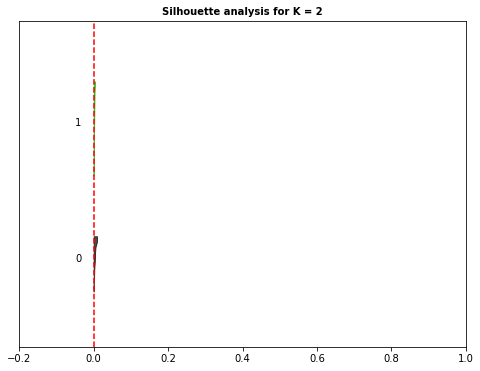

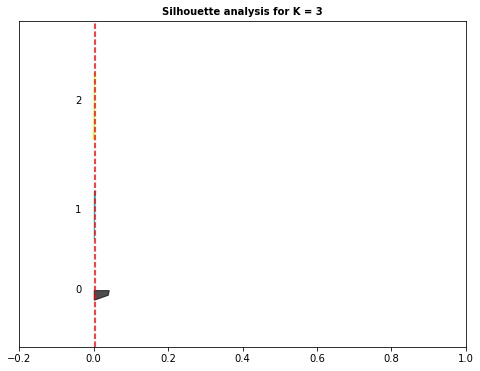

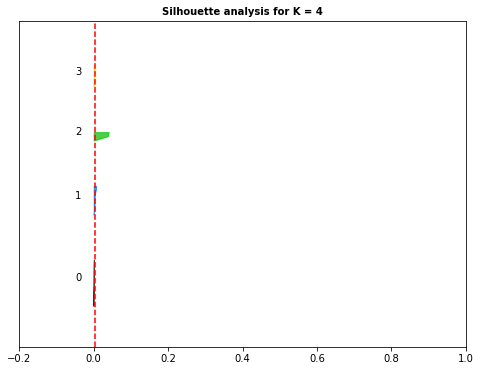

In [222]:
silhouette(kmeans_results, final_df, plot=True)

In [223]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

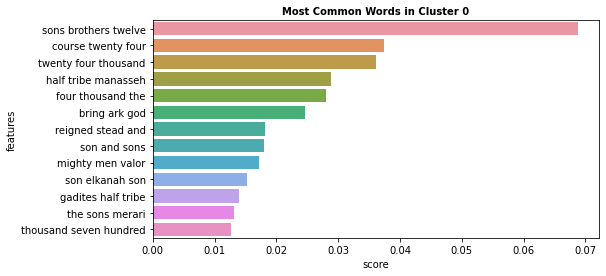

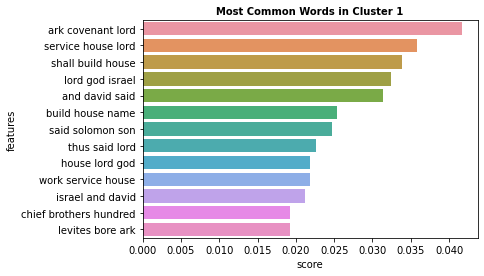

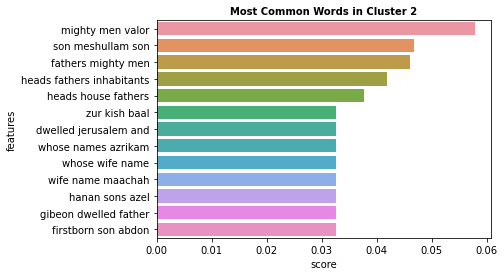

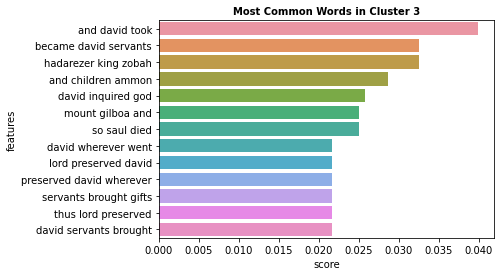

In [224]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [225]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

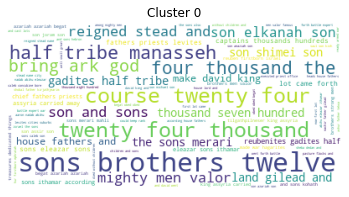

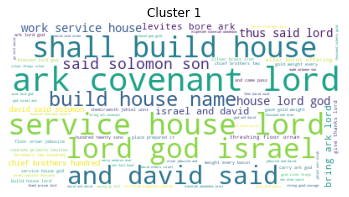

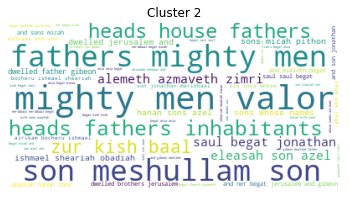

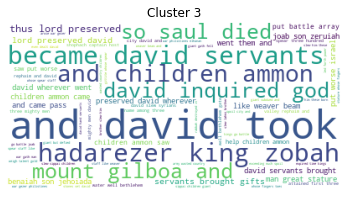

In [226]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [227]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,I_Cronicas_1,"'adam', ',', 'sheth', ',', 'enosh', ',', 'kena...",0
101,I_Cronicas_2,"'sons', 'israel', ';', 'reuben', ',', 'simeon'...",0
102,I_Cronicas_3,"'sons', 'david', ',', 'born', 'hebron', ';', '...",0
103,I_Cronicas_4,"'sons', 'judah', ';', 'pharez', ',', 'hezron',...",0
104,I_Cronicas_5,"'sons', 'reuben', 'firstborn', 'israel', ',', ...",0


In [228]:
print(df)

             Autor                                              Livro  label
100   I_Cronicas_1  'adam', ',', 'sheth', ',', 'enosh', ',', 'kena...      0
101   I_Cronicas_2  'sons', 'israel', ';', 'reuben', ',', 'simeon'...      0
102   I_Cronicas_3  'sons', 'david', ',', 'born', 'hebron', ';', '...      0
103   I_Cronicas_4  'sons', 'judah', ';', 'pharez', ',', 'hezron',...      0
104   I_Cronicas_5  'sons', 'reuben', 'firstborn', 'israel', ',', ...      0
105   I_Cronicas_6  'sons', 'levi', ';', 'gershon', ',', 'kohath',...      0
106   I_Cronicas_7  'sons', 'issachar', ',', 'tola', ',', 'puah', ...      2
107   I_Cronicas_8  'benjamin', 'begat', 'bela', 'firstborn', ',',...      2
108   I_Cronicas_9  'israel', 'reckoned', 'genealogies', ';', ',',...      2
109  I_Cronicas_10  'philistines', 'fought', 'israel', ';', 'men',...      3
110  I_Cronicas_11  'israel', 'gathered', 'david', 'hebron', ',', ...      3
111  I_Cronicas_12  'came', 'david', 'ziklag', ',', 'yet', 'kept',...      0